In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as f
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from sklearn import preprocessing
from tqdm import tqdm
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import h2o
from h2o.automl import H2OAutoML
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.neural_network import MLPRegressor
from scipy.stats import norm
import copy
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor, Pool, metrics, cv
import xgboost as xgb
from scipy.stats import gmean
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [4]:
train_df = pd.read_csv('./new_train.csv', parse_dates=["startdate"])
test_df = pd.read_csv('./new_test.csv', parse_dates=["startdate"])

In [5]:
target="contest-tmp2m-14d__tmp2m"

In [7]:
drop_cols = ['index', 'startdate', 'lat', 'lon', target]
features = [col for col in train_df.columns if col not in drop_cols]

In [11]:
X, y, X_test = train_df[features].copy(), train_df[target], test_df[features]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
print(f'Train_shape: {X_train.shape}    |   Val_shape: {X_val.shape}    |   Test_shape: {X_test.shape}')

Train_shape: (251741, 246)    |   Val_shape: (123993, 246)    |   Test_shape: (31354, 246)


In [12]:
import lightgbm as lgb

def run_adversial_validation(train_X_ml, test_X_ml):
    
    lgb_params = {'n_estimators':100,
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'verbose': 0
                    }
    # combine train & test features, create label to identify test vs train
    ad_y = np.array([1]*train_X_ml.shape[0] + [0]*test_X_ml.shape[0])
    ad_X = pd.concat([train_X_ml, test_X_ml])

    # evaluate model performance using cross-validation
    lgb_data = lgb.Dataset(ad_X, ad_y)
    cv_lgb = lgb.cv(lgb_params, lgb_data)

    print("Adversarial Validation AUC Score: {}".format(cv_lgb['auc-mean'][-1]))
    
    # train model & get feature importance
    ad_val_mod = lgb.train(lgb_params, lgb_data)
    
    print(pd.DataFrame(
        {'feat':ad_X.columns, 
         'imp':ad_val_mod.feature_importance()}).sort_values('imp', ascending = False))
    
    return ad_val_mod
ad_val_mod = run_adversial_validation(X_train, X_test)

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/lightgbm/engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.256711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.373790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.270844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.407879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.310274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.420265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [ ]:
diff_cols = ['contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30', 'year']

In [16]:
def rmse(actual, predicted):
    return mean_squared_error(actual, predicted, squared=False)

In [17]:
X1, Y1 = X.copy(), y.copy()

from catboost import Pool, cv, CatBoostRegressor
from bayes_opt import BayesianOptimization
from bayes_opt import BayesianOptimization as BO
import warnings
from sklearn.model_selection import * 
from sklearn.metrics import *

Use_BO = True

if Use_BO:
    def CB_opt(depth, learning_rate, subsample, l2_leaf_reg, model_size_reg): 

        scores = []
        trainx, valx, trainy, valy = train_test_split(X1, Y1, test_size=0.33, random_state=42)

        reg = CatBoostRegressor(   
                                        verbose = 0,
                                        learning_rate = learning_rate,
                                        subsample = subsample, 
                                        l2_leaf_reg = l2_leaf_reg,
                                        max_depth = int(depth),
                                        random_state = 1212,
                                        use_best_model = True, 
                                        loss_function='RMSE',
                                        model_size_reg = model_size_reg
                                    )

        reg.fit(trainx, trainy, eval_set = (valx, valy))
        y_pred = reg.predict(valx)
        scores.append(rmse(valy, y_pred))

        return 1/np.mean(scores)

    #"n_estimators": (150,1200),
    # "num_leaves": (100,150),
    # "max_bin":(150,300),
    pbounds = {
               "depth": (6, 7),
               "learning_rate": (0.09, 0.0980689972639084),
               "subsample":(0.7, 0.800000011920929),
               "l2_leaf_reg":(2,4),
               "model_size_reg": (0.48, 0.5)
    }

    optimizer = BayesianOptimization(f = CB_opt, pbounds = pbounds,  verbose = 2, random_state = 1212)

    optimizer.maximize(init_points = 7, n_iter = 30, acq = 'ucb', alpha = 1e-6)

    print(optimizer.max)

    max_bo_params = optimizer.max['params']

    max_bo_params

|   iter    |  target   |   depth   | l2_lea... | learni... | model_... | subsample |
-------------------------------------------------------------------------------------


/data/hieunm/anaconda3/envs/action-env/lib/python3.7/site-packages/ipykernel_launcher.py:58: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument



| 1         | 1.695     | 6.245     | 3.609     | 0.09141   | 0.4994    | 0.7225    |
| 2         | 1.721     | 6.869     | 2.563     | 0.09585   | 0.495     | 0.7247    |
| 3         | 1.73      | 6.772     | 2.171     | 0.09719   | 0.4844    | 0.7934    |
| 4         | 1.699     | 6.091     | 3.615     | 0.09314   | 0.4989    | 0.7017    |
| 5         | 1.722     | 6.542     | 2.583     | 0.09693   | 0.4901    | 0.7719    |
| 6         | 1.692     | 6.311     | 2.531     | 0.09148   | 0.4864    | 0.7726    |
| 7         | 1.694     | 6.908     | 2.939     | 0.0909    | 0.4853    | 0.7682    |
| 8         | 1.722     | 6.126     | 3.025     | 0.09703   | 0.485     | 0.7274    |
| 9         | 1.701     | 6.923     | 2.652     | 0.09218   | 0.4885    | 0.7175    |
| 10        | 1.689     | 6.134     | 2.054     | 0.09069   | 0.4977    | 0.7568    |
| 11        | 1.696     | 6.973     | 2.221     | 0.09147   | 0.487     | 0.7588    |
| 12        | 1.707     | 6.488     | 3.006     | 0.09

In [28]:
Use_BO_result = False

if Use_BO_result:
    opt_params = {
              'iterations':2000,
              'verbose':0,
              'learning_rate' : max_bo_params['learning_rate'],
              'subsample' : max_bo_params['subsample'], 
              'l2_leaf_reg' : max_bo_params['l2_leaf_reg'],
              'max_depth' : int(max_bo_params['depth']), 
              'use_best_model' : True, 
              'loss_function' : 'RMSE',
              'model_size_reg' : max_bo_params['model_size_reg']
             }
else:
    opt_params = {
          'iterations':2000,
          'verbose':0,
          'learning_rate' : 0.0980689972639084,
          'subsample' : 0.7443133148363695, 
          'l2_leaf_reg' : 2.3722386345448316,
          'max_depth' : int(6.599144674342465),
          'use_best_model' : True, 
          'loss_function' : 'RMSE',
          'model_size_reg' : 0.4833187897595954
         }

In [29]:
train_pool = Pool(data=X1,label = Y1)

X_train, X_test2, y_train, y_test = train_test_split(X1, Y1, test_size=0.33, random_state=42)

bst = CatBoostRegressor(**opt_params)
bst.fit(train_pool, eval_set=(X_test2, y_test), plot=True,silent=True)
print(bst.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'RMSE': 0.4168368949406053}, 'validation': {'RMSE': 0.414618743581387}}


Text(0.5, 1.0, 'Feature Importance')

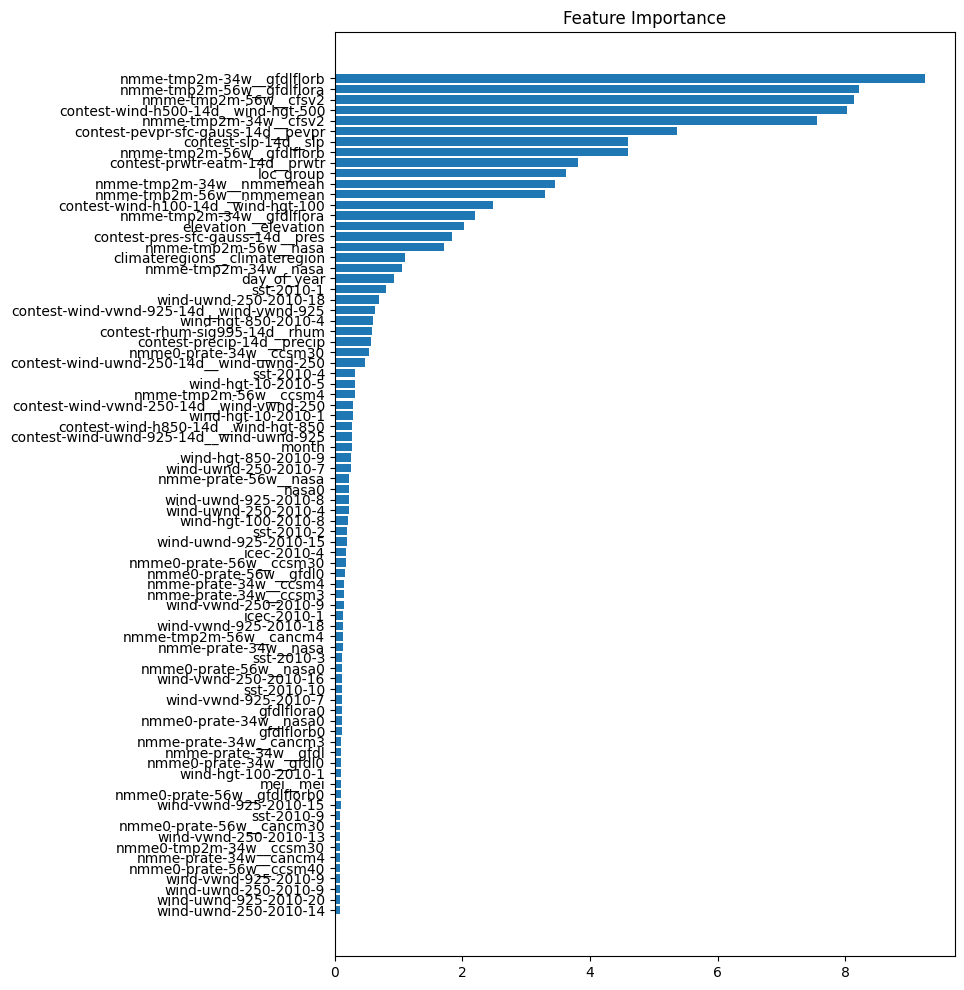

In [33]:
import matplotlib.pyplot as plt
feature_importance = bst.feature_importances_
max_features = 80
sorted_idx = np.argsort(feature_importance)[-max_features:]
fig = plt.figure(figsize=(8, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

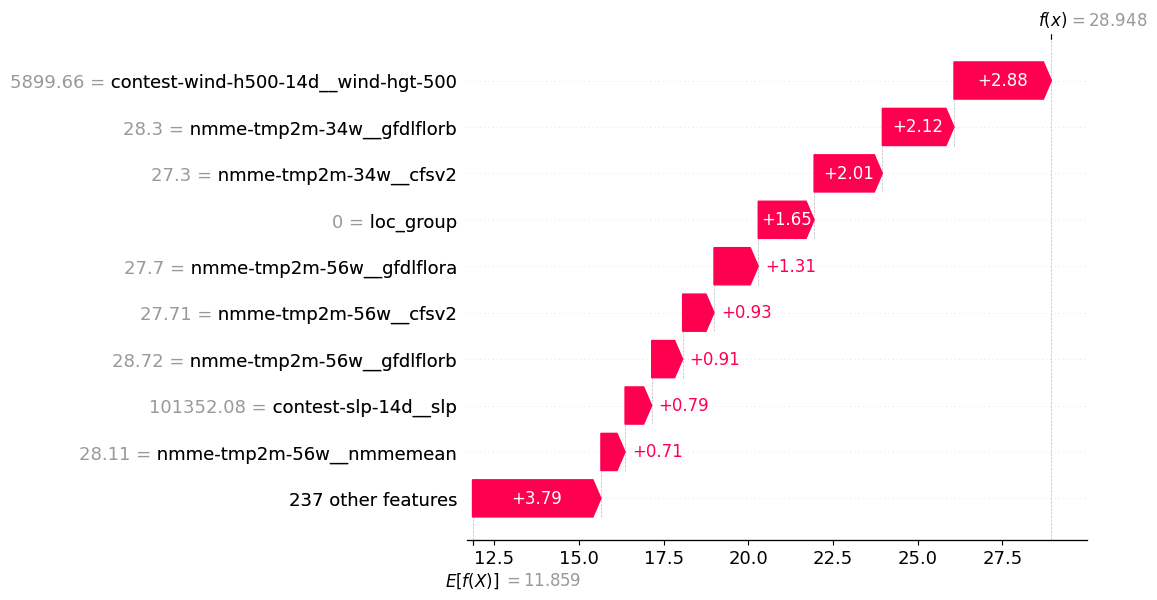

In [23]:
import shap

explainer = shap.Explainer(bst)
shap_values = explainer(X1)

shap.plots.waterfall(shap_values[0])

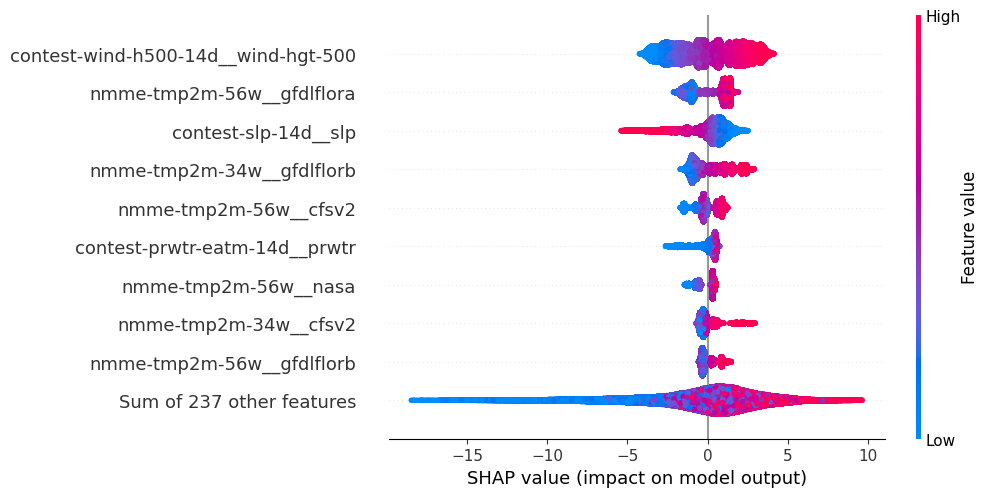

In [25]:
shap.plots.beeswarm(shap_values)

In [30]:
df = pd.read_csv('./sample_solution.csv')
s = bst.predict(X_test)
df['contest-tmp2m-14d__tmp2m'] = s
df.to_csv('submission_BO.csv', index=False)

best_df = pd.read_csv('best_sub.csv')
y_best = best_df[target].values

from numpy import dot
from numpy.linalg import norm

cos_sim = dot(y_best, s)/(norm(y_best)*norm(s))
print("cos_sim with best submission:", cos_sim)

cos_sim with best submission: 0.9989272668950616


In [35]:
selected_cols = np.array(X_val.columns)[sorted_idx]
selected_cols

array(['wind-uwnd-250-2010-14', 'wind-uwnd-925-2010-20',
       'wind-uwnd-250-2010-9', 'wind-vwnd-925-2010-9',
       'nmme0-prate-56w__ccsm40', 'nmme-prate-34w__cancm4',
       'nmme0-tmp2m-34w__ccsm30', 'wind-vwnd-250-2010-13',
       'nmme0-prate-56w__cancm30', 'sst-2010-9', 'wind-vwnd-925-2010-15',
       'nmme0-prate-56w__gfdlflorb0', 'mei__mei', 'wind-hgt-100-2010-1',
       'nmme0-prate-34w__gfdl0', 'nmme-prate-34w__gfdl',
       'nmme-prate-34w__cancm3', 'gfdlflorb0', 'nmme0-prate-34w__nasa0',
       'gfdlflora0', 'wind-vwnd-925-2010-7', 'sst-2010-10',
       'wind-vwnd-250-2010-16', 'nmme0-prate-56w__nasa0', 'sst-2010-3',
       'nmme-prate-34w__nasa', 'nmme-tmp2m-56w__cancm4',
       'wind-vwnd-925-2010-18', 'icec-2010-1', 'wind-vwnd-250-2010-9',
       'nmme-prate-34w__ccsm3', 'nmme-prate-34w__ccsm4',
       'nmme0-prate-56w__gfdl0', 'nmme0-prate-56w__ccsm30', 'icec-2010-4',
       'wind-uwnd-925-2010-15', 'sst-2010-2', 'wind-hgt-100-2010-8',
       'wind-uwnd-250-2010-4', 

In [38]:
X = train_df[selected_cols].values
y = train_df[target].values

skf = KFold(n_splits=5, random_state=2048, shuffle=True)
skf.get_n_splits(X, y)

train_index_list = []
test_index_list = []
train_x_list = []
val_x_list = []
train_y_list = []
val_y_list = []

for i, (train_index, test_index) in tqdm(enumerate(skf.split(X, y))):
    train_index_list.append(train_index)
    test_index_list.append(test_index)

    train_x_list.append(X[train_index, :])
    val_x_list.append(X[test_index, :])
    train_y_list.append(y[train_index])
    val_y_list.append(y[test_index])    
def train_catboost(x, y):
    print(x.shape, y.shape)
    
    cat_models = []
    for i in tqdm(range(5)):
        train_x, val_x = train_x_list[i], val_x_list[i]
        train_y, val_y = train_y_list[i], val_y_list[i]
        clf = CatBoostRegressor(iterations=5000, verbose=200, task_type="GPU",
                           devices='0:1')
        clf.fit(train_x, train_y, eval_set=[(val_x, val_y)], verbose=True, early_stopping_rounds=100)
        cat_models.append(clf)
    
    return cat_models
cat_models = train_catboost(X, y)

5it [00:18,  3.66s/it]


(375734, 80) (375734,)


  0%|                                                                                                | 0/5 [00:00<?, ?it/s]Warning: less than 75% gpu memory available for training. Free: 8952.5625 Total: 24268.3125


Learning rate set to 0.072699
0:	learn: 9.2381995	test: 9.2172337	best: 9.2172337 (0)	total: 5.83ms	remaining: 29.1s
1:	learn: 8.6516627	test: 8.6313101	best: 8.6313101 (1)	total: 9.92ms	remaining: 24.8s
2:	learn: 8.1090174	test: 8.0911033	best: 8.0911033 (2)	total: 14ms	remaining: 23.4s
3:	learn: 7.6097612	test: 7.5929345	best: 7.5929345 (3)	total: 18.1ms	remaining: 22.6s
4:	learn: 7.1493135	test: 7.1335988	best: 7.1335988 (4)	total: 22.2ms	remaining: 22.2s
5:	learn: 6.7179155	test: 6.7026991	best: 6.7026991 (5)	total: 26.3ms	remaining: 21.9s
6:	learn: 6.3211845	test: 6.3073596	best: 6.3073596 (6)	total: 30.4ms	remaining: 21.7s
7:	learn: 5.9548140	test: 5.9417887	best: 5.9417887 (7)	total: 34.6ms	remaining: 21.6s
8:	learn: 5.6152404	test: 5.6033538	best: 5.6033538 (8)	total: 38.6ms	remaining: 21.4s
9:	learn: 5.3023098	test: 5.2911675	best: 5.2911675 (9)	total: 42.5ms	remaining: 21.2s
10:	learn: 5.0090879	test: 4.9986618	best: 4.9986618 (10)	total: 46.8ms	remaining: 21.2s
11:	learn: 4.

128:	learn: 1.2784686	test: 1.2788540	best: 1.2788540 (128)	total: 650ms	remaining: 24.5s
129:	learn: 1.2753825	test: 1.2758658	best: 1.2758658 (129)	total: 653ms	remaining: 24.5s
130:	learn: 1.2730751	test: 1.2735678	best: 1.2735678 (130)	total: 657ms	remaining: 24.4s
131:	learn: 1.2702695	test: 1.2707636	best: 1.2707636 (131)	total: 661ms	remaining: 24.4s
132:	learn: 1.2675583	test: 1.2682433	best: 1.2682433 (132)	total: 665ms	remaining: 24.3s
133:	learn: 1.2653479	test: 1.2660669	best: 1.2660669 (133)	total: 669ms	remaining: 24.3s
134:	learn: 1.2628116	test: 1.2634478	best: 1.2634478 (134)	total: 673ms	remaining: 24.2s
135:	learn: 1.2595321	test: 1.2602078	best: 1.2602078 (135)	total: 676ms	remaining: 24.2s
136:	learn: 1.2568226	test: 1.2575103	best: 1.2575103 (136)	total: 680ms	remaining: 24.1s
137:	learn: 1.2541311	test: 1.2549474	best: 1.2549474 (137)	total: 684ms	remaining: 24.1s
138:	learn: 1.2513014	test: 1.2521965	best: 1.2521965 (138)	total: 688ms	remaining: 24.1s
139:	learn

254:	learn: 1.0338698	test: 1.0382177	best: 1.0382177 (254)	total: 1.25s	remaining: 23.3s
255:	learn: 1.0322779	test: 1.0366407	best: 1.0366407 (255)	total: 1.26s	remaining: 23.3s
256:	learn: 1.0310710	test: 1.0354225	best: 1.0354225 (256)	total: 1.26s	remaining: 23.3s
257:	learn: 1.0298148	test: 1.0342027	best: 1.0342027 (257)	total: 1.27s	remaining: 23.3s
258:	learn: 1.0288319	test: 1.0332565	best: 1.0332565 (258)	total: 1.27s	remaining: 23.3s
259:	learn: 1.0276580	test: 1.0321145	best: 1.0321145 (259)	total: 1.27s	remaining: 23.2s
260:	learn: 1.0264513	test: 1.0309093	best: 1.0309093 (260)	total: 1.28s	remaining: 23.2s
261:	learn: 1.0246079	test: 1.0291317	best: 1.0291317 (261)	total: 1.28s	remaining: 23.2s
262:	learn: 1.0230567	test: 1.0276055	best: 1.0276055 (262)	total: 1.29s	remaining: 23.2s
263:	learn: 1.0217638	test: 1.0263219	best: 1.0263219 (263)	total: 1.29s	remaining: 23.1s
264:	learn: 1.0200259	test: 1.0246361	best: 1.0246361 (264)	total: 1.29s	remaining: 23.1s
265:	learn

382:	learn: 0.9006045	test: 0.9082530	best: 0.9082530 (382)	total: 1.85s	remaining: 22.4s
383:	learn: 0.8998775	test: 0.9075344	best: 0.9075344 (383)	total: 1.86s	remaining: 22.3s
384:	learn: 0.8989782	test: 0.9066824	best: 0.9066824 (384)	total: 1.86s	remaining: 22.3s
385:	learn: 0.8982456	test: 0.9059981	best: 0.9059981 (385)	total: 1.87s	remaining: 22.4s
386:	learn: 0.8975464	test: 0.9053239	best: 0.9053239 (386)	total: 1.88s	remaining: 22.4s
387:	learn: 0.8967767	test: 0.9045756	best: 0.9045756 (387)	total: 1.88s	remaining: 22.4s
388:	learn: 0.8959854	test: 0.9038679	best: 0.9038679 (388)	total: 1.89s	remaining: 22.4s
389:	learn: 0.8952349	test: 0.9031732	best: 0.9031732 (389)	total: 1.89s	remaining: 22.3s
390:	learn: 0.8942962	test: 0.9022337	best: 0.9022337 (390)	total: 1.89s	remaining: 22.3s
391:	learn: 0.8931298	test: 0.9010594	best: 0.9010594 (391)	total: 1.9s	remaining: 22.3s
392:	learn: 0.8922151	test: 0.9001797	best: 0.9001797 (392)	total: 1.9s	remaining: 22.3s
393:	learn: 

496:	learn: 0.8234216	test: 0.8330697	best: 0.8330697 (496)	total: 2.45s	remaining: 22.2s
497:	learn: 0.8227034	test: 0.8323849	best: 0.8323849 (497)	total: 2.46s	remaining: 22.2s
498:	learn: 0.8221278	test: 0.8318589	best: 0.8318589 (498)	total: 2.46s	remaining: 22.2s
499:	learn: 0.8217042	test: 0.8314743	best: 0.8314743 (499)	total: 2.46s	remaining: 22.2s
500:	learn: 0.8209804	test: 0.8307551	best: 0.8307551 (500)	total: 2.47s	remaining: 22.2s
501:	learn: 0.8204007	test: 0.8301932	best: 0.8301932 (501)	total: 2.47s	remaining: 22.2s
502:	learn: 0.8200287	test: 0.8298181	best: 0.8298181 (502)	total: 2.48s	remaining: 22.1s
503:	learn: 0.8183015	test: 0.8281366	best: 0.8281366 (503)	total: 2.48s	remaining: 22.1s
504:	learn: 0.8179261	test: 0.8277593	best: 0.8277593 (504)	total: 2.48s	remaining: 22.1s
505:	learn: 0.8175128	test: 0.8273231	best: 0.8273231 (505)	total: 2.49s	remaining: 22.1s
506:	learn: 0.8170520	test: 0.8268521	best: 0.8268521 (506)	total: 2.49s	remaining: 22.1s
507:	learn

617:	learn: 0.7543979	test: 0.7657369	best: 0.7657369 (617)	total: 3.06s	remaining: 21.7s
618:	learn: 0.7539186	test: 0.7652547	best: 0.7652547 (618)	total: 3.06s	remaining: 21.7s
619:	learn: 0.7535850	test: 0.7649318	best: 0.7649318 (619)	total: 3.07s	remaining: 21.7s
620:	learn: 0.7532698	test: 0.7646506	best: 0.7646506 (620)	total: 3.07s	remaining: 21.7s
621:	learn: 0.7528366	test: 0.7642332	best: 0.7642332 (621)	total: 3.08s	remaining: 21.7s
622:	learn: 0.7523188	test: 0.7637083	best: 0.7637083 (622)	total: 3.08s	remaining: 21.6s
623:	learn: 0.7519451	test: 0.7633423	best: 0.7633423 (623)	total: 3.08s	remaining: 21.6s
624:	learn: 0.7514954	test: 0.7629068	best: 0.7629068 (624)	total: 3.09s	remaining: 21.6s
625:	learn: 0.7511900	test: 0.7626363	best: 0.7626363 (625)	total: 3.09s	remaining: 21.6s
626:	learn: 0.7507620	test: 0.7622312	best: 0.7622312 (626)	total: 3.1s	remaining: 21.6s
627:	learn: 0.7503768	test: 0.7618611	best: 0.7618611 (627)	total: 3.1s	remaining: 21.6s
628:	learn: 

750:	learn: 0.7033261	test: 0.7164487	best: 0.7164487 (750)	total: 3.66s	remaining: 20.7s
751:	learn: 0.7029824	test: 0.7161193	best: 0.7161193 (751)	total: 3.67s	remaining: 20.7s
752:	learn: 0.7026020	test: 0.7157673	best: 0.7157673 (752)	total: 3.67s	remaining: 20.7s
753:	learn: 0.7023507	test: 0.7155231	best: 0.7155231 (753)	total: 3.67s	remaining: 20.7s
754:	learn: 0.7019750	test: 0.7151658	best: 0.7151658 (754)	total: 3.68s	remaining: 20.7s
755:	learn: 0.7016642	test: 0.7148757	best: 0.7148757 (755)	total: 3.68s	remaining: 20.7s
756:	learn: 0.7013655	test: 0.7146308	best: 0.7146308 (756)	total: 3.68s	remaining: 20.7s
757:	learn: 0.7007487	test: 0.7139736	best: 0.7139736 (757)	total: 3.69s	remaining: 20.6s
758:	learn: 0.7003841	test: 0.7136017	best: 0.7136017 (758)	total: 3.7s	remaining: 20.7s
759:	learn: 0.7001220	test: 0.7133401	best: 0.7133401 (759)	total: 3.7s	remaining: 20.7s
760:	learn: 0.6997026	test: 0.7129167	best: 0.7129167 (760)	total: 3.71s	remaining: 20.7s
761:	learn: 

883:	learn: 0.6623043	test: 0.6766649	best: 0.6766649 (883)	total: 4.26s	remaining: 19.9s
884:	learn: 0.6620812	test: 0.6764516	best: 0.6764516 (884)	total: 4.27s	remaining: 19.8s
885:	learn: 0.6618934	test: 0.6762723	best: 0.6762723 (885)	total: 4.27s	remaining: 19.8s
886:	learn: 0.6613941	test: 0.6757951	best: 0.6757951 (886)	total: 4.28s	remaining: 19.8s
887:	learn: 0.6609967	test: 0.6754266	best: 0.6754266 (887)	total: 4.28s	remaining: 19.8s
888:	learn: 0.6604232	test: 0.6748585	best: 0.6748585 (888)	total: 4.28s	remaining: 19.8s
889:	learn: 0.6601266	test: 0.6745799	best: 0.6745799 (889)	total: 4.29s	remaining: 19.8s
890:	learn: 0.6599395	test: 0.6743772	best: 0.6743772 (890)	total: 4.29s	remaining: 19.8s
891:	learn: 0.6597102	test: 0.6741731	best: 0.6741731 (891)	total: 4.29s	remaining: 19.8s
892:	learn: 0.6594044	test: 0.6738957	best: 0.6738957 (892)	total: 4.3s	remaining: 19.8s
893:	learn: 0.6591620	test: 0.6736680	best: 0.6736680 (893)	total: 4.3s	remaining: 19.8s
894:	learn: 

1014:	learn: 0.6288237	test: 0.6443344	best: 0.6443344 (1014)	total: 4.87s	remaining: 19.1s
1015:	learn: 0.6285177	test: 0.6440716	best: 0.6440716 (1015)	total: 4.87s	remaining: 19.1s
1016:	learn: 0.6283117	test: 0.6438933	best: 0.6438933 (1016)	total: 4.87s	remaining: 19.1s
1017:	learn: 0.6280806	test: 0.6436792	best: 0.6436792 (1017)	total: 4.88s	remaining: 19.1s
1018:	learn: 0.6278697	test: 0.6434719	best: 0.6434719 (1018)	total: 4.88s	remaining: 19.1s
1019:	learn: 0.6277081	test: 0.6433252	best: 0.6433252 (1019)	total: 4.89s	remaining: 19.1s
1020:	learn: 0.6275649	test: 0.6431856	best: 0.6431856 (1020)	total: 4.9s	remaining: 19.1s
1021:	learn: 0.6273002	test: 0.6429212	best: 0.6429212 (1021)	total: 4.9s	remaining: 19.1s
1022:	learn: 0.6270479	test: 0.6426754	best: 0.6426754 (1022)	total: 4.91s	remaining: 19.1s
1023:	learn: 0.6268568	test: 0.6425348	best: 0.6425348 (1023)	total: 4.91s	remaining: 19.1s
1024:	learn: 0.6266814	test: 0.6423590	best: 0.6423590 (1024)	total: 4.91s	remaini

1145:	learn: 0.6005010	test: 0.6169457	best: 0.6169457 (1145)	total: 5.47s	remaining: 18.4s
1146:	learn: 0.6003351	test: 0.6167788	best: 0.6167788 (1146)	total: 5.48s	remaining: 18.4s
1147:	learn: 0.6001443	test: 0.6166076	best: 0.6166076 (1147)	total: 5.49s	remaining: 18.4s
1148:	learn: 0.5999580	test: 0.6164394	best: 0.6164394 (1148)	total: 5.5s	remaining: 18.4s
1149:	learn: 0.5997801	test: 0.6162354	best: 0.6162354 (1149)	total: 5.5s	remaining: 18.4s
1150:	learn: 0.5994249	test: 0.6158803	best: 0.6158803 (1150)	total: 5.5s	remaining: 18.4s
1151:	learn: 0.5992191	test: 0.6156760	best: 0.6156760 (1151)	total: 5.51s	remaining: 18.4s
1152:	learn: 0.5990528	test: 0.6155371	best: 0.6155371 (1152)	total: 5.51s	remaining: 18.4s
1153:	learn: 0.5989017	test: 0.6153990	best: 0.6153990 (1153)	total: 5.51s	remaining: 18.4s
1154:	learn: 0.5987104	test: 0.6152028	best: 0.6152028 (1154)	total: 5.52s	remaining: 18.4s
1155:	learn: 0.5983415	test: 0.6148280	best: 0.6148280 (1155)	total: 5.52s	remainin

1278:	learn: 0.5752407	test: 0.5925696	best: 0.5925696 (1278)	total: 6.08s	remaining: 17.7s
1279:	learn: 0.5751131	test: 0.5924479	best: 0.5924479 (1279)	total: 6.09s	remaining: 17.7s
1280:	learn: 0.5749227	test: 0.5922604	best: 0.5922604 (1280)	total: 6.09s	remaining: 17.7s
1281:	learn: 0.5747887	test: 0.5921409	best: 0.5921409 (1281)	total: 6.09s	remaining: 17.7s
1282:	learn: 0.5746388	test: 0.5920013	best: 0.5920013 (1282)	total: 6.1s	remaining: 17.7s
1283:	learn: 0.5744363	test: 0.5918347	best: 0.5918347 (1283)	total: 6.1s	remaining: 17.7s
1284:	learn: 0.5742914	test: 0.5917113	best: 0.5917113 (1284)	total: 6.11s	remaining: 17.7s
1285:	learn: 0.5740731	test: 0.5915128	best: 0.5915128 (1285)	total: 6.11s	remaining: 17.6s
1286:	learn: 0.5739372	test: 0.5913833	best: 0.5913833 (1286)	total: 6.11s	remaining: 17.6s
1287:	learn: 0.5737845	test: 0.5912467	best: 0.5912467 (1287)	total: 6.12s	remaining: 17.6s
1288:	learn: 0.5736381	test: 0.5910933	best: 0.5910933 (1288)	total: 6.12s	remaini

1369:	learn: 0.5600058	test: 0.5780737	best: 0.5780737 (1369)	total: 6.48s	remaining: 17.2s
1370:	learn: 0.5598542	test: 0.5779404	best: 0.5779404 (1370)	total: 6.49s	remaining: 17.2s
1371:	learn: 0.5597111	test: 0.5777999	best: 0.5777999 (1371)	total: 6.49s	remaining: 17.2s
1372:	learn: 0.5595988	test: 0.5777035	best: 0.5777035 (1372)	total: 6.5s	remaining: 17.2s
1373:	learn: 0.5594529	test: 0.5775544	best: 0.5775544 (1373)	total: 6.5s	remaining: 17.2s
1374:	learn: 0.5590239	test: 0.5771337	best: 0.5771337 (1374)	total: 6.51s	remaining: 17.2s
1375:	learn: 0.5588951	test: 0.5770155	best: 0.5770155 (1375)	total: 6.51s	remaining: 17.2s
1376:	learn: 0.5587794	test: 0.5769156	best: 0.5769156 (1376)	total: 6.52s	remaining: 17.1s
1377:	learn: 0.5586637	test: 0.5767987	best: 0.5767987 (1377)	total: 6.52s	remaining: 17.1s
1378:	learn: 0.5585019	test: 0.5766442	best: 0.5766442 (1378)	total: 6.52s	remaining: 17.1s
1379:	learn: 0.5583113	test: 0.5764431	best: 0.5764431 (1379)	total: 6.53s	remaini

1496:	learn: 0.5415387	test: 0.5603482	best: 0.5603482 (1496)	total: 7.09s	remaining: 16.6s
1497:	learn: 0.5413814	test: 0.5601940	best: 0.5601940 (1497)	total: 7.1s	remaining: 16.6s
1498:	learn: 0.5412711	test: 0.5600954	best: 0.5600954 (1498)	total: 7.1s	remaining: 16.6s
1499:	learn: 0.5411468	test: 0.5599810	best: 0.5599810 (1499)	total: 7.11s	remaining: 16.6s
1500:	learn: 0.5410237	test: 0.5598660	best: 0.5598660 (1500)	total: 7.11s	remaining: 16.6s
1501:	learn: 0.5408316	test: 0.5596800	best: 0.5596800 (1501)	total: 7.12s	remaining: 16.6s
1502:	learn: 0.5407366	test: 0.5595887	best: 0.5595887 (1502)	total: 7.12s	remaining: 16.6s
1503:	learn: 0.5406412	test: 0.5594934	best: 0.5594934 (1503)	total: 7.12s	remaining: 16.6s
1504:	learn: 0.5404761	test: 0.5593445	best: 0.5593445 (1504)	total: 7.13s	remaining: 16.6s
1505:	learn: 0.5403862	test: 0.5592635	best: 0.5592635 (1505)	total: 7.13s	remaining: 16.5s
1506:	learn: 0.5402724	test: 0.5591564	best: 0.5591564 (1506)	total: 7.13s	remaini

1613:	learn: 0.5259942	test: 0.5453836	best: 0.5453836 (1613)	total: 7.69s	remaining: 16.1s
1614:	learn: 0.5257476	test: 0.5451400	best: 0.5451400 (1614)	total: 7.7s	remaining: 16.1s
1615:	learn: 0.5256255	test: 0.5450267	best: 0.5450267 (1615)	total: 7.7s	remaining: 16.1s
1616:	learn: 0.5255502	test: 0.5449392	best: 0.5449392 (1616)	total: 7.71s	remaining: 16.1s
1617:	learn: 0.5253897	test: 0.5448045	best: 0.5448045 (1617)	total: 7.71s	remaining: 16.1s
1618:	learn: 0.5252673	test: 0.5446754	best: 0.5446754 (1618)	total: 7.71s	remaining: 16.1s
1619:	learn: 0.5250579	test: 0.5444714	best: 0.5444714 (1619)	total: 7.72s	remaining: 16.1s
1620:	learn: 0.5249617	test: 0.5443722	best: 0.5443722 (1620)	total: 7.72s	remaining: 16.1s
1621:	learn: 0.5248116	test: 0.5442301	best: 0.5442301 (1621)	total: 7.72s	remaining: 16.1s
1622:	learn: 0.5246955	test: 0.5441179	best: 0.5441179 (1622)	total: 7.73s	remaining: 16.1s
1623:	learn: 0.5245392	test: 0.5439606	best: 0.5439606 (1623)	total: 7.73s	remaini

1706:	learn: 0.5145217	test: 0.5342496	best: 0.5342496 (1706)	total: 9.38s	remaining: 18.1s
1707:	learn: 0.5144248	test: 0.5341530	best: 0.5341530 (1707)	total: 9.4s	remaining: 18.1s
1708:	learn: 0.5143368	test: 0.5340645	best: 0.5340645 (1708)	total: 9.41s	remaining: 18.1s
1709:	learn: 0.5142307	test: 0.5339730	best: 0.5339730 (1709)	total: 9.41s	remaining: 18.1s
1710:	learn: 0.5141056	test: 0.5338533	best: 0.5338533 (1710)	total: 9.43s	remaining: 18.1s
1711:	learn: 0.5140232	test: 0.5337572	best: 0.5337572 (1711)	total: 9.46s	remaining: 18.2s
1712:	learn: 0.5139164	test: 0.5336368	best: 0.5336368 (1712)	total: 9.48s	remaining: 18.2s
1713:	learn: 0.5138318	test: 0.5335373	best: 0.5335373 (1713)	total: 9.51s	remaining: 18.2s
1714:	learn: 0.5137390	test: 0.5334446	best: 0.5334446 (1714)	total: 9.54s	remaining: 18.3s
1715:	learn: 0.5135650	test: 0.5332719	best: 0.5332719 (1715)	total: 9.56s	remaining: 18.3s
1716:	learn: 0.5134408	test: 0.5331357	best: 0.5331357 (1716)	total: 9.6s	remaini

1801:	learn: 0.5042409	test: 0.5243438	best: 0.5243438 (1801)	total: 11.7s	remaining: 20.8s
1802:	learn: 0.5041711	test: 0.5242688	best: 0.5242688 (1802)	total: 11.8s	remaining: 20.9s
1803:	learn: 0.5040963	test: 0.5242040	best: 0.5242040 (1803)	total: 11.8s	remaining: 20.9s
1804:	learn: 0.5040018	test: 0.5241011	best: 0.5241011 (1804)	total: 11.8s	remaining: 20.9s
1805:	learn: 0.5037739	test: 0.5238708	best: 0.5238708 (1805)	total: 11.8s	remaining: 20.9s
1806:	learn: 0.5036788	test: 0.5237786	best: 0.5237786 (1806)	total: 11.9s	remaining: 21s
1807:	learn: 0.5035782	test: 0.5236774	best: 0.5236774 (1807)	total: 11.9s	remaining: 21s
1808:	learn: 0.5034802	test: 0.5235671	best: 0.5235671 (1808)	total: 11.9s	remaining: 21s
1809:	learn: 0.5033474	test: 0.5234406	best: 0.5234406 (1809)	total: 11.9s	remaining: 21s
1810:	learn: 0.5032692	test: 0.5233667	best: 0.5233667 (1810)	total: 11.9s	remaining: 21s
1811:	learn: 0.5031183	test: 0.5232350	best: 0.5232350 (1811)	total: 12s	remaining: 21s
18

1895:	learn: 0.4941371	test: 0.5146686	best: 0.5146686 (1895)	total: 14.1s	remaining: 23.1s
1896:	learn: 0.4940152	test: 0.5145484	best: 0.5145484 (1896)	total: 14.2s	remaining: 23.2s
1897:	learn: 0.4938996	test: 0.5144347	best: 0.5144347 (1897)	total: 14.2s	remaining: 23.2s
1898:	learn: 0.4938000	test: 0.5143364	best: 0.5143364 (1898)	total: 14.2s	remaining: 23.2s
1899:	learn: 0.4936906	test: 0.5142300	best: 0.5142300 (1899)	total: 14.3s	remaining: 23.3s
1900:	learn: 0.4935658	test: 0.5141008	best: 0.5141008 (1900)	total: 14.3s	remaining: 23.3s
1901:	learn: 0.4934720	test: 0.5140166	best: 0.5140166 (1901)	total: 14.3s	remaining: 23.3s
1902:	learn: 0.4933524	test: 0.5139077	best: 0.5139077 (1902)	total: 14.3s	remaining: 23.3s
1903:	learn: 0.4932753	test: 0.5138315	best: 0.5138315 (1903)	total: 14.3s	remaining: 23.3s
1904:	learn: 0.4931816	test: 0.5137356	best: 0.5137356 (1904)	total: 14.4s	remaining: 23.3s
1905:	learn: 0.4931044	test: 0.5136655	best: 0.5136655 (1905)	total: 14.4s	remai

1990:	learn: 0.4842837	test: 0.5052674	best: 0.5052674 (1990)	total: 16.6s	remaining: 25s
1991:	learn: 0.4842361	test: 0.5052234	best: 0.5052234 (1991)	total: 16.6s	remaining: 25s
1992:	learn: 0.4840647	test: 0.5050404	best: 0.5050404 (1992)	total: 16.6s	remaining: 25.1s
1993:	learn: 0.4839786	test: 0.5049488	best: 0.5049488 (1993)	total: 16.6s	remaining: 25.1s
1994:	learn: 0.4838860	test: 0.5048440	best: 0.5048440 (1994)	total: 16.7s	remaining: 25.1s
1995:	learn: 0.4838108	test: 0.5047665	best: 0.5047665 (1995)	total: 16.7s	remaining: 25.1s
1996:	learn: 0.4837202	test: 0.5046874	best: 0.5046874 (1996)	total: 16.7s	remaining: 25.1s
1997:	learn: 0.4836142	test: 0.5045915	best: 0.5045915 (1997)	total: 16.7s	remaining: 25.1s
1998:	learn: 0.4835385	test: 0.5045373	best: 0.5045373 (1998)	total: 16.8s	remaining: 25.2s
1999:	learn: 0.4834272	test: 0.5044337	best: 0.5044337 (1999)	total: 16.8s	remaining: 25.2s
2000:	learn: 0.4833428	test: 0.5043532	best: 0.5043532 (2000)	total: 16.8s	remaining

2085:	learn: 0.4749485	test: 0.4963764	best: 0.4963764 (2085)	total: 18.9s	remaining: 26.5s
2086:	learn: 0.4748542	test: 0.4962850	best: 0.4962850 (2086)	total: 19s	remaining: 26.5s
2087:	learn: 0.4747480	test: 0.4961792	best: 0.4961792 (2087)	total: 19s	remaining: 26.5s
2088:	learn: 0.4746683	test: 0.4961127	best: 0.4961127 (2088)	total: 19s	remaining: 26.5s
2089:	learn: 0.4745782	test: 0.4960289	best: 0.4960289 (2089)	total: 19s	remaining: 26.5s
2090:	learn: 0.4744696	test: 0.4959369	best: 0.4959369 (2090)	total: 19s	remaining: 26.5s
2091:	learn: 0.4743997	test: 0.4958785	best: 0.4958785 (2091)	total: 19.1s	remaining: 26.5s
2092:	learn: 0.4742755	test: 0.4957538	best: 0.4957538 (2092)	total: 19.1s	remaining: 26.5s
2093:	learn: 0.4741517	test: 0.4956462	best: 0.4956462 (2093)	total: 19.1s	remaining: 26.5s
2094:	learn: 0.4740721	test: 0.4955613	best: 0.4955613 (2094)	total: 19.1s	remaining: 26.5s
2095:	learn: 0.4740074	test: 0.4954991	best: 0.4954991 (2095)	total: 19.2s	remaining: 26.6

2179:	learn: 0.4666256	test: 0.4884399	best: 0.4884399 (2179)	total: 21s	remaining: 27.2s
2180:	learn: 0.4664847	test: 0.4883105	best: 0.4883105 (2180)	total: 21.1s	remaining: 27.2s
2181:	learn: 0.4664371	test: 0.4882572	best: 0.4882572 (2181)	total: 21.1s	remaining: 27.3s
2182:	learn: 0.4663047	test: 0.4881224	best: 0.4881224 (2182)	total: 21.1s	remaining: 27.3s
2183:	learn: 0.4661486	test: 0.4879497	best: 0.4879497 (2183)	total: 21.2s	remaining: 27.3s
2184:	learn: 0.4660501	test: 0.4878390	best: 0.4878390 (2184)	total: 21.2s	remaining: 27.3s
2185:	learn: 0.4659648	test: 0.4877505	best: 0.4877505 (2185)	total: 21.2s	remaining: 27.3s
2186:	learn: 0.4658903	test: 0.4876675	best: 0.4876675 (2186)	total: 21.3s	remaining: 27.3s
2187:	learn: 0.4658203	test: 0.4876053	best: 0.4876053 (2187)	total: 21.3s	remaining: 27.4s
2188:	learn: 0.4657459	test: 0.4875345	best: 0.4875345 (2188)	total: 21.3s	remaining: 27.4s
2189:	learn: 0.4656170	test: 0.4874015	best: 0.4874015 (2189)	total: 21.3s	remaini

2273:	learn: 0.4585070	test: 0.4806865	best: 0.4806865 (2273)	total: 23.4s	remaining: 28.1s
2274:	learn: 0.4584462	test: 0.4806342	best: 0.4806342 (2274)	total: 23.5s	remaining: 28.1s
2275:	learn: 0.4583738	test: 0.4805534	best: 0.4805534 (2275)	total: 23.5s	remaining: 28.1s
2276:	learn: 0.4583133	test: 0.4804994	best: 0.4804994 (2276)	total: 23.5s	remaining: 28.1s
2277:	learn: 0.4582181	test: 0.4804105	best: 0.4804105 (2277)	total: 23.5s	remaining: 28.1s
2278:	learn: 0.4581569	test: 0.4803495	best: 0.4803495 (2278)	total: 23.6s	remaining: 28.2s
2279:	learn: 0.4580732	test: 0.4802707	best: 0.4802707 (2279)	total: 23.6s	remaining: 28.2s
2280:	learn: 0.4579961	test: 0.4801951	best: 0.4801951 (2280)	total: 23.6s	remaining: 28.2s
2281:	learn: 0.4579470	test: 0.4801597	best: 0.4801597 (2281)	total: 23.7s	remaining: 28.2s
2282:	learn: 0.4578677	test: 0.4800969	best: 0.4800969 (2282)	total: 23.7s	remaining: 28.2s
2283:	learn: 0.4577771	test: 0.4800219	best: 0.4800219 (2283)	total: 23.7s	remai

2365:	learn: 0.4511627	test: 0.4739139	best: 0.4739139 (2365)	total: 25.8s	remaining: 28.7s
2366:	learn: 0.4510692	test: 0.4738186	best: 0.4738186 (2366)	total: 25.8s	remaining: 28.7s
2367:	learn: 0.4509425	test: 0.4737035	best: 0.4737035 (2367)	total: 25.9s	remaining: 28.7s
2368:	learn: 0.4508796	test: 0.4736401	best: 0.4736401 (2368)	total: 25.9s	remaining: 28.8s
2369:	learn: 0.4508112	test: 0.4735801	best: 0.4735801 (2369)	total: 25.9s	remaining: 28.8s
2370:	learn: 0.4507313	test: 0.4735035	best: 0.4735035 (2370)	total: 25.9s	remaining: 28.8s
2371:	learn: 0.4506578	test: 0.4734341	best: 0.4734341 (2371)	total: 26s	remaining: 28.8s
2372:	learn: 0.4505523	test: 0.4733249	best: 0.4733249 (2372)	total: 26s	remaining: 28.8s
2373:	learn: 0.4504302	test: 0.4731925	best: 0.4731925 (2373)	total: 26s	remaining: 28.8s
2374:	learn: 0.4503611	test: 0.4731252	best: 0.4731252 (2374)	total: 26s	remaining: 28.8s
2375:	learn: 0.4502318	test: 0.4729959	best: 0.4729959 (2375)	total: 26.1s	remaining: 28

2458:	learn: 0.4436916	test: 0.4667266	best: 0.4667266 (2458)	total: 28.2s	remaining: 29.1s
2459:	learn: 0.4435920	test: 0.4666327	best: 0.4666327 (2459)	total: 28.2s	remaining: 29.1s
2460:	learn: 0.4434959	test: 0.4665352	best: 0.4665352 (2460)	total: 28.2s	remaining: 29.1s
2461:	learn: 0.4434276	test: 0.4664684	best: 0.4664684 (2461)	total: 28.3s	remaining: 29.1s
2462:	learn: 0.4433031	test: 0.4663473	best: 0.4663473 (2462)	total: 28.3s	remaining: 29.2s
2463:	learn: 0.4432086	test: 0.4662504	best: 0.4662504 (2463)	total: 28.3s	remaining: 29.2s
2464:	learn: 0.4431537	test: 0.4661938	best: 0.4661938 (2464)	total: 28.4s	remaining: 29.2s
2465:	learn: 0.4430814	test: 0.4661402	best: 0.4661402 (2465)	total: 28.4s	remaining: 29.2s
2466:	learn: 0.4430376	test: 0.4660930	best: 0.4660930 (2466)	total: 28.4s	remaining: 29.2s
2467:	learn: 0.4429715	test: 0.4660335	best: 0.4660335 (2467)	total: 28.4s	remaining: 29.2s
2468:	learn: 0.4429129	test: 0.4659766	best: 0.4659766 (2468)	total: 28.5s	remai

2550:	learn: 0.4368830	test: 0.4602351	best: 0.4602351 (2550)	total: 30.7s	remaining: 29.5s
2551:	learn: 0.4368083	test: 0.4601733	best: 0.4601733 (2551)	total: 30.7s	remaining: 29.5s
2552:	learn: 0.4367069	test: 0.4600784	best: 0.4600784 (2552)	total: 30.8s	remaining: 29.5s
2553:	learn: 0.4366403	test: 0.4600264	best: 0.4600264 (2553)	total: 30.8s	remaining: 29.5s
2554:	learn: 0.4365450	test: 0.4599173	best: 0.4599173 (2554)	total: 30.8s	remaining: 29.5s
2555:	learn: 0.4364987	test: 0.4598780	best: 0.4598780 (2555)	total: 30.8s	remaining: 29.5s
2556:	learn: 0.4364382	test: 0.4598364	best: 0.4598364 (2556)	total: 30.9s	remaining: 29.5s
2557:	learn: 0.4363409	test: 0.4597545	best: 0.4597545 (2557)	total: 30.9s	remaining: 29.5s
2558:	learn: 0.4362543	test: 0.4596827	best: 0.4596827 (2558)	total: 30.9s	remaining: 29.5s
2559:	learn: 0.4361858	test: 0.4596187	best: 0.4596187 (2559)	total: 30.9s	remaining: 29.5s
2560:	learn: 0.4360972	test: 0.4595416	best: 0.4595416 (2560)	total: 31s	remaini

2645:	learn: 0.4301707	test: 0.4540144	best: 0.4540144 (2645)	total: 32.9s	remaining: 29.3s
2646:	learn: 0.4300984	test: 0.4539493	best: 0.4539493 (2646)	total: 32.9s	remaining: 29.2s
2647:	learn: 0.4300328	test: 0.4538831	best: 0.4538831 (2647)	total: 32.9s	remaining: 29.2s
2648:	learn: 0.4299682	test: 0.4538271	best: 0.4538271 (2648)	total: 33s	remaining: 29.2s
2649:	learn: 0.4299130	test: 0.4537690	best: 0.4537690 (2649)	total: 33s	remaining: 29.2s
2650:	learn: 0.4298498	test: 0.4537156	best: 0.4537156 (2650)	total: 33s	remaining: 29.2s
2651:	learn: 0.4297860	test: 0.4536573	best: 0.4536573 (2651)	total: 33s	remaining: 29.2s
2652:	learn: 0.4297107	test: 0.4535894	best: 0.4535894 (2652)	total: 33.1s	remaining: 29.2s
2653:	learn: 0.4296707	test: 0.4535490	best: 0.4535490 (2653)	total: 33.1s	remaining: 29.2s
2654:	learn: 0.4295976	test: 0.4534769	best: 0.4534769 (2654)	total: 33.1s	remaining: 29.3s
2655:	learn: 0.4295500	test: 0.4534414	best: 0.4534414 (2655)	total: 33.1s	remaining: 29

2739:	learn: 0.4240588	test: 0.4482709	best: 0.4482709 (2739)	total: 35.2s	remaining: 29s
2740:	learn: 0.4239822	test: 0.4481982	best: 0.4481982 (2740)	total: 35.2s	remaining: 29s
2741:	learn: 0.4238932	test: 0.4481070	best: 0.4481070 (2741)	total: 35.2s	remaining: 29s
2742:	learn: 0.4238474	test: 0.4480693	best: 0.4480693 (2742)	total: 35.3s	remaining: 29s
2743:	learn: 0.4237943	test: 0.4480172	best: 0.4480172 (2743)	total: 35.3s	remaining: 29s
2744:	learn: 0.4237469	test: 0.4479720	best: 0.4479720 (2744)	total: 35.3s	remaining: 29s
2745:	learn: 0.4236676	test: 0.4479014	best: 0.4479014 (2745)	total: 35.3s	remaining: 29s
2746:	learn: 0.4235821	test: 0.4478210	best: 0.4478210 (2746)	total: 35.3s	remaining: 29s
2747:	learn: 0.4234881	test: 0.4477385	best: 0.4477385 (2747)	total: 35.4s	remaining: 29s
2748:	learn: 0.4234344	test: 0.4476820	best: 0.4476820 (2748)	total: 35.4s	remaining: 29s
2749:	learn: 0.4233681	test: 0.4476251	best: 0.4476251 (2749)	total: 35.4s	remaining: 29s
2750:	lear

2830:	learn: 0.4183602	test: 0.4429109	best: 0.4429109 (2830)	total: 37.6s	remaining: 28.8s
2831:	learn: 0.4183091	test: 0.4428647	best: 0.4428647 (2831)	total: 37.6s	remaining: 28.8s
2832:	learn: 0.4182548	test: 0.4428143	best: 0.4428143 (2832)	total: 37.6s	remaining: 28.7s
2833:	learn: 0.4181874	test: 0.4427513	best: 0.4427513 (2833)	total: 37.6s	remaining: 28.7s
2834:	learn: 0.4181386	test: 0.4427052	best: 0.4427052 (2834)	total: 37.6s	remaining: 28.7s
2835:	learn: 0.4180939	test: 0.4426648	best: 0.4426648 (2835)	total: 37.6s	remaining: 28.7s
2836:	learn: 0.4180422	test: 0.4426168	best: 0.4426168 (2836)	total: 37.7s	remaining: 28.7s
2837:	learn: 0.4180002	test: 0.4425755	best: 0.4425755 (2837)	total: 37.7s	remaining: 28.7s
2838:	learn: 0.4179375	test: 0.4425135	best: 0.4425135 (2838)	total: 37.7s	remaining: 28.7s
2839:	learn: 0.4178445	test: 0.4424214	best: 0.4424214 (2839)	total: 37.7s	remaining: 28.7s
2840:	learn: 0.4178039	test: 0.4423757	best: 0.4423757 (2840)	total: 37.8s	remai

2927:	learn: 0.4125611	test: 0.4375590	best: 0.4375590 (2927)	total: 39.9s	remaining: 28.3s
2928:	learn: 0.4125109	test: 0.4375131	best: 0.4375131 (2928)	total: 40s	remaining: 28.3s
2929:	learn: 0.4124629	test: 0.4374729	best: 0.4374729 (2929)	total: 40s	remaining: 28.3s
2930:	learn: 0.4124104	test: 0.4374269	best: 0.4374269 (2930)	total: 40s	remaining: 28.2s
2931:	learn: 0.4123833	test: 0.4374066	best: 0.4374066 (2931)	total: 40s	remaining: 28.2s
2932:	learn: 0.4123357	test: 0.4373664	best: 0.4373664 (2932)	total: 40.1s	remaining: 28.2s
2933:	learn: 0.4122810	test: 0.4373203	best: 0.4373203 (2933)	total: 40.1s	remaining: 28.2s
2934:	learn: 0.4122226	test: 0.4372597	best: 0.4372597 (2934)	total: 40.1s	remaining: 28.2s
2935:	learn: 0.4121550	test: 0.4371907	best: 0.4371907 (2935)	total: 40.2s	remaining: 28.2s
2936:	learn: 0.4121026	test: 0.4371444	best: 0.4371444 (2936)	total: 40.2s	remaining: 28.2s
2937:	learn: 0.4120552	test: 0.4370998	best: 0.4370998 (2937)	total: 40.2s	remaining: 28

3020:	learn: 0.4072819	test: 0.4325696	best: 0.4325696 (3020)	total: 42.3s	remaining: 27.7s
3021:	learn: 0.4072291	test: 0.4325155	best: 0.4325155 (3021)	total: 42.3s	remaining: 27.7s
3022:	learn: 0.4071630	test: 0.4324417	best: 0.4324417 (3022)	total: 42.4s	remaining: 27.7s
3023:	learn: 0.4071185	test: 0.4323973	best: 0.4323973 (3023)	total: 42.4s	remaining: 27.7s
3024:	learn: 0.4069629	test: 0.4322425	best: 0.4322425 (3024)	total: 42.4s	remaining: 27.7s
3025:	learn: 0.4069085	test: 0.4322013	best: 0.4322013 (3025)	total: 42.4s	remaining: 27.7s
3026:	learn: 0.4068660	test: 0.4321726	best: 0.4321726 (3026)	total: 42.5s	remaining: 27.7s
3027:	learn: 0.4068087	test: 0.4321176	best: 0.4321176 (3027)	total: 42.5s	remaining: 27.7s
3028:	learn: 0.4067695	test: 0.4320750	best: 0.4320750 (3028)	total: 42.5s	remaining: 27.7s
3029:	learn: 0.4067196	test: 0.4320316	best: 0.4320316 (3029)	total: 42.5s	remaining: 27.7s
3030:	learn: 0.4066768	test: 0.4320007	best: 0.4320007 (3030)	total: 42.6s	remai

3110:	learn: 0.4024953	test: 0.4281553	best: 0.4281553 (3110)	total: 44.6s	remaining: 27.1s
3111:	learn: 0.4024254	test: 0.4280847	best: 0.4280847 (3111)	total: 44.7s	remaining: 27.1s
3112:	learn: 0.4023727	test: 0.4280312	best: 0.4280312 (3112)	total: 44.7s	remaining: 27.1s
3113:	learn: 0.4023170	test: 0.4279775	best: 0.4279775 (3113)	total: 44.7s	remaining: 27.1s
3114:	learn: 0.4022459	test: 0.4279056	best: 0.4279056 (3114)	total: 44.8s	remaining: 27.1s
3115:	learn: 0.4021892	test: 0.4278425	best: 0.4278425 (3115)	total: 44.8s	remaining: 27.1s
3116:	learn: 0.4021506	test: 0.4278088	best: 0.4278088 (3116)	total: 44.8s	remaining: 27.1s
3117:	learn: 0.4021047	test: 0.4277673	best: 0.4277673 (3117)	total: 44.8s	remaining: 27.1s
3118:	learn: 0.4020577	test: 0.4277256	best: 0.4277256 (3118)	total: 44.9s	remaining: 27.1s
3119:	learn: 0.4020173	test: 0.4276907	best: 0.4276907 (3119)	total: 44.9s	remaining: 27s
3120:	learn: 0.4019695	test: 0.4276478	best: 0.4276478 (3120)	total: 44.9s	remaini

3206:	learn: 0.3973723	test: 0.4233365	best: 0.4233365 (3206)	total: 47s	remaining: 26.3s
3207:	learn: 0.3972781	test: 0.4232372	best: 0.4232372 (3207)	total: 47s	remaining: 26.3s
3208:	learn: 0.3971915	test: 0.4231524	best: 0.4231524 (3208)	total: 47s	remaining: 26.3s
3209:	learn: 0.3971566	test: 0.4231192	best: 0.4231192 (3209)	total: 47.1s	remaining: 26.2s
3210:	learn: 0.3970939	test: 0.4230661	best: 0.4230661 (3210)	total: 47.1s	remaining: 26.2s
3211:	learn: 0.3970535	test: 0.4230336	best: 0.4230336 (3211)	total: 47.1s	remaining: 26.2s
3212:	learn: 0.3970250	test: 0.4230038	best: 0.4230038 (3212)	total: 47.1s	remaining: 26.2s
3213:	learn: 0.3969781	test: 0.4229719	best: 0.4229719 (3213)	total: 47.1s	remaining: 26.2s
3214:	learn: 0.3969407	test: 0.4229306	best: 0.4229306 (3214)	total: 47.2s	remaining: 26.2s
3215:	learn: 0.3968916	test: 0.4228851	best: 0.4228851 (3215)	total: 47.2s	remaining: 26.2s
3216:	learn: 0.3968346	test: 0.4228300	best: 0.4228300 (3216)	total: 47.2s	remaining: 

3305:	learn: 0.3924244	test: 0.4186993	best: 0.4186993 (3305)	total: 49.4s	remaining: 25.3s
3306:	learn: 0.3923676	test: 0.4186517	best: 0.4186517 (3306)	total: 49.4s	remaining: 25.3s
3307:	learn: 0.3923062	test: 0.4185983	best: 0.4185983 (3307)	total: 49.4s	remaining: 25.3s
3308:	learn: 0.3922526	test: 0.4185504	best: 0.4185504 (3308)	total: 49.4s	remaining: 25.3s
3309:	learn: 0.3921691	test: 0.4184717	best: 0.4184717 (3309)	total: 49.5s	remaining: 25.3s
3310:	learn: 0.3921202	test: 0.4184289	best: 0.4184289 (3310)	total: 49.5s	remaining: 25.3s
3311:	learn: 0.3920787	test: 0.4183940	best: 0.4183940 (3311)	total: 49.5s	remaining: 25.2s
3312:	learn: 0.3920410	test: 0.4183652	best: 0.4183652 (3312)	total: 49.6s	remaining: 25.2s
3313:	learn: 0.3919573	test: 0.4182806	best: 0.4182806 (3313)	total: 49.6s	remaining: 25.2s
3314:	learn: 0.3919081	test: 0.4182335	best: 0.4182335 (3314)	total: 49.6s	remaining: 25.2s
3315:	learn: 0.3918713	test: 0.4181907	best: 0.4181907 (3315)	total: 49.6s	remai

3399:	learn: 0.3874415	test: 0.4140463	best: 0.4140463 (3399)	total: 51.6s	remaining: 24.3s
3400:	learn: 0.3873821	test: 0.4139801	best: 0.4139801 (3400)	total: 51.7s	remaining: 24.3s
3401:	learn: 0.3873367	test: 0.4139430	best: 0.4139430 (3401)	total: 51.7s	remaining: 24.3s
3402:	learn: 0.3872912	test: 0.4138987	best: 0.4138987 (3402)	total: 51.7s	remaining: 24.3s
3403:	learn: 0.3872534	test: 0.4138602	best: 0.4138602 (3403)	total: 51.7s	remaining: 24.3s
3404:	learn: 0.3871989	test: 0.4138013	best: 0.4138013 (3404)	total: 51.8s	remaining: 24.2s
3405:	learn: 0.3871556	test: 0.4137622	best: 0.4137622 (3405)	total: 51.8s	remaining: 24.2s
3406:	learn: 0.3871227	test: 0.4137291	best: 0.4137291 (3406)	total: 51.8s	remaining: 24.2s
3407:	learn: 0.3870707	test: 0.4136806	best: 0.4136806 (3407)	total: 51.9s	remaining: 24.2s
3408:	learn: 0.3870333	test: 0.4136439	best: 0.4136439 (3408)	total: 51.9s	remaining: 24.2s
3409:	learn: 0.3869889	test: 0.4136051	best: 0.4136051 (3409)	total: 51.9s	remai

3495:	learn: 0.3829373	test: 0.4099015	best: 0.4099015 (3495)	total: 54s	remaining: 23.2s
3496:	learn: 0.3829010	test: 0.4098762	best: 0.4098762 (3496)	total: 54s	remaining: 23.2s
3497:	learn: 0.3828456	test: 0.4098230	best: 0.4098230 (3497)	total: 54.1s	remaining: 23.2s
3498:	learn: 0.3827821	test: 0.4097684	best: 0.4097684 (3498)	total: 54.1s	remaining: 23.2s
3499:	learn: 0.3827342	test: 0.4097202	best: 0.4097202 (3499)	total: 54.1s	remaining: 23.2s
3500:	learn: 0.3826772	test: 0.4096722	best: 0.4096722 (3500)	total: 54.1s	remaining: 23.2s
3501:	learn: 0.3826225	test: 0.4096219	best: 0.4096219 (3501)	total: 54.2s	remaining: 23.2s
3502:	learn: 0.3825587	test: 0.4095543	best: 0.4095543 (3502)	total: 54.2s	remaining: 23.2s
3503:	learn: 0.3824987	test: 0.4095044	best: 0.4095044 (3503)	total: 54.2s	remaining: 23.1s
3504:	learn: 0.3824667	test: 0.4094789	best: 0.4094789 (3504)	total: 54.2s	remaining: 23.1s
3505:	learn: 0.3824274	test: 0.4094431	best: 0.4094431 (3505)	total: 54.2s	remaining

3588:	learn: 0.3783670	test: 0.4055394	best: 0.4055394 (3588)	total: 56.4s	remaining: 22.2s
3589:	learn: 0.3783224	test: 0.4054944	best: 0.4054944 (3589)	total: 56.4s	remaining: 22.1s
3590:	learn: 0.3782882	test: 0.4054645	best: 0.4054645 (3590)	total: 56.4s	remaining: 22.1s
3591:	learn: 0.3782364	test: 0.4054214	best: 0.4054214 (3591)	total: 56.4s	remaining: 22.1s
3592:	learn: 0.3782098	test: 0.4053942	best: 0.4053942 (3592)	total: 56.4s	remaining: 22.1s
3593:	learn: 0.3781588	test: 0.4053367	best: 0.4053367 (3593)	total: 56.4s	remaining: 22.1s
3594:	learn: 0.3781158	test: 0.4052949	best: 0.4052949 (3594)	total: 56.4s	remaining: 22.1s
3595:	learn: 0.3780348	test: 0.4052078	best: 0.4052078 (3595)	total: 56.5s	remaining: 22s
3596:	learn: 0.3779883	test: 0.4051691	best: 0.4051691 (3596)	total: 56.5s	remaining: 22s
3597:	learn: 0.3779483	test: 0.4051311	best: 0.4051311 (3597)	total: 56.5s	remaining: 22s
3598:	learn: 0.3778813	test: 0.4050659	best: 0.4050659 (3598)	total: 56.5s	remaining: 

3685:	learn: 0.3740019	test: 0.4013487	best: 0.4013487 (3685)	total: 58.7s	remaining: 20.9s
3686:	learn: 0.3739747	test: 0.4013280	best: 0.4013280 (3686)	total: 58.7s	remaining: 20.9s
3687:	learn: 0.3739281	test: 0.4012924	best: 0.4012924 (3687)	total: 58.7s	remaining: 20.9s
3688:	learn: 0.3738896	test: 0.4012617	best: 0.4012617 (3688)	total: 58.8s	remaining: 20.9s
3689:	learn: 0.3738511	test: 0.4012275	best: 0.4012275 (3689)	total: 58.8s	remaining: 20.9s
3690:	learn: 0.3738169	test: 0.4012029	best: 0.4012029 (3690)	total: 58.8s	remaining: 20.9s
3691:	learn: 0.3737745	test: 0.4011584	best: 0.4011584 (3691)	total: 58.8s	remaining: 20.8s
3692:	learn: 0.3737478	test: 0.4011358	best: 0.4011358 (3692)	total: 58.9s	remaining: 20.8s
3693:	learn: 0.3736656	test: 0.4010626	best: 0.4010626 (3693)	total: 58.9s	remaining: 20.8s
3694:	learn: 0.3736007	test: 0.4009928	best: 0.4009928 (3694)	total: 58.9s	remaining: 20.8s
3695:	learn: 0.3735529	test: 0.4009541	best: 0.4009541 (3695)	total: 58.9s	remai

3778:	learn: 0.3698603	test: 0.3975759	best: 0.3975759 (3778)	total: 1m	remaining: 19.6s
3779:	learn: 0.3698093	test: 0.3975252	best: 0.3975252 (3779)	total: 1m	remaining: 19.6s
3780:	learn: 0.3697799	test: 0.3975013	best: 0.3975013 (3780)	total: 1m	remaining: 19.6s
3781:	learn: 0.3697492	test: 0.3974773	best: 0.3974773 (3781)	total: 1m	remaining: 19.6s
3782:	learn: 0.3696994	test: 0.3974281	best: 0.3974281 (3782)	total: 1m	remaining: 19.6s
3783:	learn: 0.3696528	test: 0.3973948	best: 0.3973948 (3783)	total: 1m	remaining: 19.6s
3784:	learn: 0.3696160	test: 0.3973586	best: 0.3973586 (3784)	total: 1m	remaining: 19.6s
3785:	learn: 0.3695683	test: 0.3973182	best: 0.3973182 (3785)	total: 1m	remaining: 19.5s
3786:	learn: 0.3695361	test: 0.3972814	best: 0.3972814 (3786)	total: 1m	remaining: 19.5s
3787:	learn: 0.3694982	test: 0.3972457	best: 0.3972457 (3787)	total: 1m	remaining: 19.5s
3788:	learn: 0.3694713	test: 0.3972239	best: 0.3972239 (3788)	total: 1m 1s	remaining: 19.5s
3789:	learn: 0.369

3873:	learn: 0.3657404	test: 0.3937550	best: 0.3937550 (3873)	total: 1m 3s	remaining: 18.4s
3874:	learn: 0.3657117	test: 0.3937298	best: 0.3937298 (3874)	total: 1m 3s	remaining: 18.4s
3875:	learn: 0.3656636	test: 0.3936898	best: 0.3936898 (3875)	total: 1m 3s	remaining: 18.4s
3876:	learn: 0.3655879	test: 0.3936121	best: 0.3936121 (3876)	total: 1m 3s	remaining: 18.3s
3877:	learn: 0.3655504	test: 0.3935766	best: 0.3935766 (3877)	total: 1m 3s	remaining: 18.3s
3878:	learn: 0.3654893	test: 0.3935247	best: 0.3935247 (3878)	total: 1m 3s	remaining: 18.3s
3879:	learn: 0.3654516	test: 0.3934900	best: 0.3934900 (3879)	total: 1m 3s	remaining: 18.3s
3880:	learn: 0.3654190	test: 0.3934619	best: 0.3934619 (3880)	total: 1m 3s	remaining: 18.3s
3881:	learn: 0.3653774	test: 0.3934210	best: 0.3934210 (3881)	total: 1m 3s	remaining: 18.3s
3882:	learn: 0.3653423	test: 0.3933932	best: 0.3933932 (3882)	total: 1m 3s	remaining: 18.3s
3883:	learn: 0.3653044	test: 0.3933532	best: 0.3933532 (3883)	total: 1m 3s	remai

3970:	learn: 0.3616974	test: 0.3900049	best: 0.3900049 (3970)	total: 1m 5s	remaining: 17s
3971:	learn: 0.3616609	test: 0.3899682	best: 0.3899682 (3971)	total: 1m 5s	remaining: 17s
3972:	learn: 0.3616227	test: 0.3899344	best: 0.3899344 (3972)	total: 1m 5s	remaining: 17s
3973:	learn: 0.3615802	test: 0.3899003	best: 0.3899003 (3973)	total: 1m 5s	remaining: 17s
3974:	learn: 0.3615514	test: 0.3898780	best: 0.3898780 (3974)	total: 1m 5s	remaining: 17s
3975:	learn: 0.3615159	test: 0.3898486	best: 0.3898486 (3975)	total: 1m 5s	remaining: 17s
3976:	learn: 0.3614801	test: 0.3898171	best: 0.3898171 (3976)	total: 1m 5s	remaining: 17s
3977:	learn: 0.3614384	test: 0.3897725	best: 0.3897725 (3977)	total: 1m 5s	remaining: 16.9s
3978:	learn: 0.3613984	test: 0.3897302	best: 0.3897302 (3978)	total: 1m 5s	remaining: 16.9s
3979:	learn: 0.3613675	test: 0.3896981	best: 0.3896981 (3979)	total: 1m 5s	remaining: 16.9s
3980:	learn: 0.3613287	test: 0.3896634	best: 0.3896634 (3980)	total: 1m 6s	remaining: 16.9s
39

4062:	learn: 0.3580091	test: 0.3865500	best: 0.3865500 (4062)	total: 1m 8s	remaining: 15.7s
4063:	learn: 0.3579736	test: 0.3865145	best: 0.3865145 (4063)	total: 1m 8s	remaining: 15.7s
4064:	learn: 0.3579419	test: 0.3864810	best: 0.3864810 (4064)	total: 1m 8s	remaining: 15.7s
4065:	learn: 0.3579158	test: 0.3864571	best: 0.3864571 (4065)	total: 1m 8s	remaining: 15.7s
4066:	learn: 0.3578694	test: 0.3864162	best: 0.3864162 (4066)	total: 1m 8s	remaining: 15.7s
4067:	learn: 0.3578443	test: 0.3863896	best: 0.3863896 (4067)	total: 1m 8s	remaining: 15.6s
4068:	learn: 0.3578027	test: 0.3863549	best: 0.3863549 (4068)	total: 1m 8s	remaining: 15.6s
4069:	learn: 0.3577741	test: 0.3863295	best: 0.3863295 (4069)	total: 1m 8s	remaining: 15.6s
4070:	learn: 0.3577298	test: 0.3862951	best: 0.3862951 (4070)	total: 1m 8s	remaining: 15.6s
4071:	learn: 0.3576936	test: 0.3862651	best: 0.3862651 (4071)	total: 1m 8s	remaining: 15.6s
4072:	learn: 0.3576667	test: 0.3862347	best: 0.3862347 (4072)	total: 1m 8s	remai

4153:	learn: 0.3543435	test: 0.3831042	best: 0.3831042 (4153)	total: 1m 10s	remaining: 14.4s
4154:	learn: 0.3542956	test: 0.3830572	best: 0.3830572 (4154)	total: 1m 10s	remaining: 14.4s
4155:	learn: 0.3542666	test: 0.3830259	best: 0.3830259 (4155)	total: 1m 10s	remaining: 14.3s
4156:	learn: 0.3542364	test: 0.3829978	best: 0.3829978 (4156)	total: 1m 10s	remaining: 14.3s
4157:	learn: 0.3541897	test: 0.3829579	best: 0.3829579 (4157)	total: 1m 10s	remaining: 14.3s
4158:	learn: 0.3541631	test: 0.3829383	best: 0.3829383 (4158)	total: 1m 10s	remaining: 14.3s
4159:	learn: 0.3540851	test: 0.3828544	best: 0.3828544 (4159)	total: 1m 10s	remaining: 14.3s
4160:	learn: 0.3540540	test: 0.3828321	best: 0.3828321 (4160)	total: 1m 10s	remaining: 14.3s
4161:	learn: 0.3540224	test: 0.3828092	best: 0.3828092 (4161)	total: 1m 10s	remaining: 14.3s
4162:	learn: 0.3539900	test: 0.3827715	best: 0.3827715 (4162)	total: 1m 10s	remaining: 14.2s
4163:	learn: 0.3539648	test: 0.3827546	best: 0.3827546 (4163)	total: 1

4247:	learn: 0.3507075	test: 0.3797108	best: 0.3797108 (4247)	total: 1m 12s	remaining: 12.9s
4248:	learn: 0.3506733	test: 0.3796815	best: 0.3796815 (4248)	total: 1m 12s	remaining: 12.9s
4249:	learn: 0.3506263	test: 0.3796249	best: 0.3796249 (4249)	total: 1m 13s	remaining: 12.9s
4250:	learn: 0.3505921	test: 0.3796005	best: 0.3796005 (4250)	total: 1m 13s	remaining: 12.9s
4251:	learn: 0.3505445	test: 0.3795525	best: 0.3795525 (4251)	total: 1m 13s	remaining: 12.9s
4252:	learn: 0.3505117	test: 0.3795206	best: 0.3795206 (4252)	total: 1m 13s	remaining: 12.8s
4253:	learn: 0.3504697	test: 0.3794823	best: 0.3794823 (4253)	total: 1m 13s	remaining: 12.8s
4254:	learn: 0.3504331	test: 0.3794556	best: 0.3794556 (4254)	total: 1m 13s	remaining: 12.8s
4255:	learn: 0.3504093	test: 0.3794356	best: 0.3794356 (4255)	total: 1m 13s	remaining: 12.8s
4256:	learn: 0.3503767	test: 0.3794042	best: 0.3794042 (4256)	total: 1m 13s	remaining: 12.8s
4257:	learn: 0.3503374	test: 0.3793621	best: 0.3793621 (4257)	total: 1

4337:	learn: 0.3472217	test: 0.3764358	best: 0.3764358 (4337)	total: 1m 15s	remaining: 11.5s
4338:	learn: 0.3471911	test: 0.3764025	best: 0.3764025 (4338)	total: 1m 15s	remaining: 11.4s
4339:	learn: 0.3471701	test: 0.3763844	best: 0.3763844 (4339)	total: 1m 15s	remaining: 11.4s
4340:	learn: 0.3471117	test: 0.3763300	best: 0.3763300 (4340)	total: 1m 15s	remaining: 11.4s
4341:	learn: 0.3470835	test: 0.3763074	best: 0.3763074 (4341)	total: 1m 15s	remaining: 11.4s
4342:	learn: 0.3470396	test: 0.3762745	best: 0.3762745 (4342)	total: 1m 15s	remaining: 11.4s
4343:	learn: 0.3470182	test: 0.3762524	best: 0.3762524 (4343)	total: 1m 15s	remaining: 11.4s
4344:	learn: 0.3469892	test: 0.3762259	best: 0.3762259 (4344)	total: 1m 15s	remaining: 11.3s
4345:	learn: 0.3469481	test: 0.3761866	best: 0.3761866 (4345)	total: 1m 15s	remaining: 11.3s
4346:	learn: 0.3469181	test: 0.3761642	best: 0.3761642 (4346)	total: 1m 15s	remaining: 11.3s
4347:	learn: 0.3468727	test: 0.3761272	best: 0.3761272 (4347)	total: 1

4431:	learn: 0.3436592	test: 0.3730769	best: 0.3730769 (4431)	total: 1m 17s	remaining: 9.92s
4432:	learn: 0.3436128	test: 0.3730259	best: 0.3730259 (4432)	total: 1m 17s	remaining: 9.91s
4433:	learn: 0.3435831	test: 0.3729982	best: 0.3729982 (4433)	total: 1m 17s	remaining: 9.89s
4434:	learn: 0.3435569	test: 0.3729742	best: 0.3729742 (4434)	total: 1m 17s	remaining: 9.87s
4435:	learn: 0.3435230	test: 0.3729346	best: 0.3729346 (4435)	total: 1m 17s	remaining: 9.86s
4436:	learn: 0.3434911	test: 0.3729080	best: 0.3729080 (4436)	total: 1m 17s	remaining: 9.84s
4437:	learn: 0.3434639	test: 0.3728790	best: 0.3728790 (4437)	total: 1m 17s	remaining: 9.82s
4438:	learn: 0.3434296	test: 0.3728522	best: 0.3728522 (4438)	total: 1m 17s	remaining: 9.8s
4439:	learn: 0.3433945	test: 0.3728157	best: 0.3728157 (4439)	total: 1m 17s	remaining: 9.79s
4440:	learn: 0.3433703	test: 0.3727942	best: 0.3727942 (4440)	total: 1m 17s	remaining: 9.77s
4441:	learn: 0.3432806	test: 0.3727090	best: 0.3727090 (4441)	total: 1m

4528:	learn: 0.3403848	test: 0.3700467	best: 0.3700467 (4528)	total: 1m 19s	remaining: 8.29s
4529:	learn: 0.3403559	test: 0.3700141	best: 0.3700141 (4529)	total: 1m 19s	remaining: 8.28s
4530:	learn: 0.3403224	test: 0.3699784	best: 0.3699784 (4530)	total: 1m 19s	remaining: 8.26s
4531:	learn: 0.3402994	test: 0.3699628	best: 0.3699628 (4531)	total: 1m 19s	remaining: 8.24s
4532:	learn: 0.3402622	test: 0.3699333	best: 0.3699333 (4532)	total: 1m 19s	remaining: 8.23s
4533:	learn: 0.3402311	test: 0.3698967	best: 0.3698967 (4533)	total: 1m 19s	remaining: 8.21s
4534:	learn: 0.3401969	test: 0.3698658	best: 0.3698658 (4534)	total: 1m 19s	remaining: 8.19s
4535:	learn: 0.3401707	test: 0.3698406	best: 0.3698406 (4535)	total: 1m 19s	remaining: 8.18s
4536:	learn: 0.3401175	test: 0.3697836	best: 0.3697836 (4536)	total: 1m 19s	remaining: 8.16s
4537:	learn: 0.3400787	test: 0.3697477	best: 0.3697477 (4537)	total: 1m 19s	remaining: 8.14s
4538:	learn: 0.3400532	test: 0.3697260	best: 0.3697260 (4538)	total: 1

4617:	learn: 0.3374951	test: 0.3674148	best: 0.3674148 (4617)	total: 1m 21s	remaining: 6.78s
4618:	learn: 0.3374710	test: 0.3673999	best: 0.3673999 (4618)	total: 1m 21s	remaining: 6.76s
4619:	learn: 0.3374400	test: 0.3673737	best: 0.3673737 (4619)	total: 1m 21s	remaining: 6.74s
4620:	learn: 0.3374035	test: 0.3673436	best: 0.3673436 (4620)	total: 1m 21s	remaining: 6.72s
4621:	learn: 0.3373432	test: 0.3672839	best: 0.3672839 (4621)	total: 1m 22s	remaining: 6.71s
4622:	learn: 0.3373027	test: 0.3672427	best: 0.3672427 (4622)	total: 1m 22s	remaining: 6.69s
4623:	learn: 0.3372642	test: 0.3671969	best: 0.3671969 (4623)	total: 1m 22s	remaining: 6.67s
4624:	learn: 0.3372321	test: 0.3671680	best: 0.3671680 (4624)	total: 1m 22s	remaining: 6.65s
4625:	learn: 0.3371772	test: 0.3671040	best: 0.3671040 (4625)	total: 1m 22s	remaining: 6.64s
4626:	learn: 0.3371457	test: 0.3670769	best: 0.3670769 (4626)	total: 1m 22s	remaining: 6.62s
4627:	learn: 0.3371149	test: 0.3670503	best: 0.3670503 (4627)	total: 1

4706:	learn: 0.3344360	test: 0.3645747	best: 0.3645747 (4706)	total: 1m 24s	remaining: 5.25s
4707:	learn: 0.3344152	test: 0.3645596	best: 0.3645596 (4707)	total: 1m 24s	remaining: 5.23s
4708:	learn: 0.3343740	test: 0.3645224	best: 0.3645224 (4708)	total: 1m 24s	remaining: 5.21s
4709:	learn: 0.3343447	test: 0.3644980	best: 0.3644980 (4709)	total: 1m 24s	remaining: 5.19s
4710:	learn: 0.3343168	test: 0.3644775	best: 0.3644775 (4710)	total: 1m 24s	remaining: 5.18s
4711:	learn: 0.3342950	test: 0.3644553	best: 0.3644553 (4711)	total: 1m 24s	remaining: 5.16s
4712:	learn: 0.3342695	test: 0.3644302	best: 0.3644302 (4712)	total: 1m 24s	remaining: 5.14s
4713:	learn: 0.3342370	test: 0.3644014	best: 0.3644014 (4713)	total: 1m 24s	remaining: 5.12s
4714:	learn: 0.3341938	test: 0.3643632	best: 0.3643632 (4714)	total: 1m 24s	remaining: 5.11s
4715:	learn: 0.3341719	test: 0.3643473	best: 0.3643473 (4715)	total: 1m 24s	remaining: 5.09s
4716:	learn: 0.3341461	test: 0.3643264	best: 0.3643264 (4716)	total: 1

4802:	learn: 0.3314803	test: 0.3618180	best: 0.3618180 (4802)	total: 1m 26s	remaining: 3.55s
4803:	learn: 0.3314534	test: 0.3617885	best: 0.3617885 (4803)	total: 1m 26s	remaining: 3.54s
4804:	learn: 0.3314166	test: 0.3617572	best: 0.3617572 (4804)	total: 1m 26s	remaining: 3.52s
4805:	learn: 0.3313972	test: 0.3617454	best: 0.3617454 (4805)	total: 1m 26s	remaining: 3.5s
4806:	learn: 0.3313494	test: 0.3617038	best: 0.3617038 (4806)	total: 1m 26s	remaining: 3.48s
4807:	learn: 0.3313308	test: 0.3616927	best: 0.3616927 (4807)	total: 1m 26s	remaining: 3.46s
4808:	learn: 0.3313107	test: 0.3616752	best: 0.3616752 (4808)	total: 1m 26s	remaining: 3.45s
4809:	learn: 0.3312741	test: 0.3616402	best: 0.3616402 (4809)	total: 1m 26s	remaining: 3.43s
4810:	learn: 0.3312578	test: 0.3616245	best: 0.3616245 (4810)	total: 1m 26s	remaining: 3.41s
4811:	learn: 0.3312303	test: 0.3615967	best: 0.3615967 (4811)	total: 1m 26s	remaining: 3.4s
4812:	learn: 0.3312028	test: 0.3615731	best: 0.3615731 (4812)	total: 1m 

4896:	learn: 0.3284238	test: 0.3590726	best: 0.3590726 (4896)	total: 1m 29s	remaining: 1.87s
4897:	learn: 0.3283915	test: 0.3590483	best: 0.3590483 (4897)	total: 1m 29s	remaining: 1.85s
4898:	learn: 0.3283619	test: 0.3590211	best: 0.3590211 (4898)	total: 1m 29s	remaining: 1.84s
4899:	learn: 0.3283431	test: 0.3590033	best: 0.3590033 (4899)	total: 1m 29s	remaining: 1.82s
4900:	learn: 0.3283165	test: 0.3589829	best: 0.3589829 (4900)	total: 1m 29s	remaining: 1.8s
4901:	learn: 0.3282855	test: 0.3589502	best: 0.3589502 (4901)	total: 1m 29s	remaining: 1.78s
4902:	learn: 0.3282542	test: 0.3589158	best: 0.3589158 (4902)	total: 1m 29s	remaining: 1.76s
4903:	learn: 0.3282141	test: 0.3588735	best: 0.3588735 (4903)	total: 1m 29s	remaining: 1.75s
4904:	learn: 0.3281830	test: 0.3588480	best: 0.3588480 (4904)	total: 1m 29s	remaining: 1.73s
4905:	learn: 0.3281585	test: 0.3588243	best: 0.3588243 (4905)	total: 1m 29s	remaining: 1.71s
4906:	learn: 0.3281286	test: 0.3587982	best: 0.3587982 (4906)	total: 1m

4985:	learn: 0.3257386	test: 0.3566105	best: 0.3566105 (4985)	total: 1m 31s	remaining: 256ms
4986:	learn: 0.3257106	test: 0.3565835	best: 0.3565835 (4986)	total: 1m 31s	remaining: 238ms
4987:	learn: 0.3256811	test: 0.3565555	best: 0.3565555 (4987)	total: 1m 31s	remaining: 220ms
4988:	learn: 0.3256528	test: 0.3565283	best: 0.3565283 (4988)	total: 1m 31s	remaining: 201ms
4989:	learn: 0.3256305	test: 0.3565167	best: 0.3565167 (4989)	total: 1m 31s	remaining: 183ms
4990:	learn: 0.3256111	test: 0.3564976	best: 0.3564976 (4990)	total: 1m 31s	remaining: 165ms
4991:	learn: 0.3255765	test: 0.3564584	best: 0.3564584 (4991)	total: 1m 31s	remaining: 146ms
4992:	learn: 0.3255386	test: 0.3564168	best: 0.3564168 (4992)	total: 1m 31s	remaining: 128ms
4993:	learn: 0.3255145	test: 0.3563951	best: 0.3563951 (4993)	total: 1m 31s	remaining: 110ms
4994:	learn: 0.3254772	test: 0.3563666	best: 0.3563666 (4994)	total: 1m 31s	remaining: 91.5ms
4995:	learn: 0.3254490	test: 0.3563383	best: 0.3563383 (4995)	total: 

 20%|█████████████████▍                                                                     | 1/5 [01:40<06:43, 100.88s/it]Warning: less than 75% gpu memory available for training. Free: 8526.5625 Total: 24268.3125


Learning rate set to 0.072699
0:	learn: 9.2315558	test: 9.2488136	best: 9.2488136 (0)	total: 42.1ms	remaining: 3m 30s
1:	learn: 8.6481889	test: 8.6642674	best: 8.6642674 (1)	total: 67.7ms	remaining: 2m 49s
2:	learn: 8.1067935	test: 8.1216023	best: 8.1216023 (2)	total: 90.8ms	remaining: 2m 31s
3:	learn: 7.6076205	test: 7.6221639	best: 7.6221639 (3)	total: 128ms	remaining: 2m 40s
4:	learn: 7.1476178	test: 7.1609508	best: 7.1609508 (4)	total: 152ms	remaining: 2m 32s
5:	learn: 6.7187647	test: 6.7312052	best: 6.7312052 (5)	total: 179ms	remaining: 2m 28s
6:	learn: 6.3204339	test: 6.3314902	best: 6.3314902 (6)	total: 195ms	remaining: 2m 19s
7:	learn: 5.9537206	test: 5.9635472	best: 5.9635472 (7)	total: 233ms	remaining: 2m 25s
8:	learn: 5.6115961	test: 5.6210197	best: 5.6210197 (8)	total: 258ms	remaining: 2m 23s
9:	learn: 5.2942384	test: 5.3025375	best: 5.3025375 (9)	total: 280ms	remaining: 2m 19s
10:	learn: 5.0025434	test: 5.0105935	best: 5.0105935 (10)	total: 297ms	remaining: 2m 14s
11:	lear

97:	learn: 1.3992365	test: 1.4024757	best: 1.4024757 (97)	total: 2.61s	remaining: 2m 10s
98:	learn: 1.3944538	test: 1.3977467	best: 1.3977467 (98)	total: 2.64s	remaining: 2m 10s
99:	learn: 1.3908282	test: 1.3941423	best: 1.3941423 (99)	total: 2.66s	remaining: 2m 10s
100:	learn: 1.3874076	test: 1.3907387	best: 1.3907387 (100)	total: 2.68s	remaining: 2m 9s
101:	learn: 1.3837541	test: 1.3870753	best: 1.3870753 (101)	total: 2.71s	remaining: 2m 10s
102:	learn: 1.3800474	test: 1.3832846	best: 1.3832846 (102)	total: 2.74s	remaining: 2m 10s
103:	learn: 1.3757385	test: 1.3788900	best: 1.3788900 (103)	total: 2.78s	remaining: 2m 10s
104:	learn: 1.3711048	test: 1.3742994	best: 1.3742994 (104)	total: 2.8s	remaining: 2m 10s
105:	learn: 1.3679515	test: 1.3711491	best: 1.3711491 (105)	total: 2.82s	remaining: 2m 10s
106:	learn: 1.3639083	test: 1.3672281	best: 1.3672281 (106)	total: 2.86s	remaining: 2m 10s
107:	learn: 1.3595015	test: 1.3630048	best: 1.3630048 (107)	total: 2.89s	remaining: 2m 10s
108:	le

192:	learn: 1.1312271	test: 1.1354099	best: 1.1354099 (192)	total: 4.99s	remaining: 2m 4s
193:	learn: 1.1300082	test: 1.1341903	best: 1.1341903 (193)	total: 5.03s	remaining: 2m 4s
194:	learn: 1.1278157	test: 1.1319789	best: 1.1319789 (194)	total: 5.05s	remaining: 2m 4s
195:	learn: 1.1263896	test: 1.1305727	best: 1.1305727 (195)	total: 5.08s	remaining: 2m 4s
196:	learn: 1.1245587	test: 1.1287140	best: 1.1287140 (196)	total: 5.11s	remaining: 2m 4s
197:	learn: 1.1226285	test: 1.1268687	best: 1.1268687 (197)	total: 5.14s	remaining: 2m 4s
198:	learn: 1.1200792	test: 1.1242846	best: 1.1242846 (198)	total: 5.17s	remaining: 2m 4s
199:	learn: 1.1179542	test: 1.1220460	best: 1.1220460 (199)	total: 5.2s	remaining: 2m 4s
200:	learn: 1.1165606	test: 1.1205753	best: 1.1205753 (200)	total: 5.22s	remaining: 2m 4s
201:	learn: 1.1147842	test: 1.1187733	best: 1.1187733 (201)	total: 5.24s	remaining: 2m 4s
202:	learn: 1.1126028	test: 1.1166820	best: 1.1166820 (202)	total: 5.25s	remaining: 2m 4s
203:	learn:

291:	learn: 0.9887658	test: 0.9934760	best: 0.9934760 (291)	total: 7.54s	remaining: 2m 1s
292:	learn: 0.9879487	test: 0.9926788	best: 0.9926788 (292)	total: 7.58s	remaining: 2m 1s
293:	learn: 0.9866909	test: 0.9913939	best: 0.9913939 (293)	total: 7.6s	remaining: 2m 1s
294:	learn: 0.9855123	test: 0.9902274	best: 0.9902274 (294)	total: 7.63s	remaining: 2m 1s
295:	learn: 0.9842613	test: 0.9889771	best: 0.9889771 (295)	total: 7.67s	remaining: 2m 1s
296:	learn: 0.9831798	test: 0.9878464	best: 0.9878464 (296)	total: 7.7s	remaining: 2m 1s
297:	learn: 0.9824168	test: 0.9871237	best: 0.9871237 (297)	total: 7.73s	remaining: 2m 1s
298:	learn: 0.9814858	test: 0.9861933	best: 0.9861933 (298)	total: 7.76s	remaining: 2m 2s
299:	learn: 0.9803812	test: 0.9850493	best: 0.9850493 (299)	total: 7.8s	remaining: 2m 2s
300:	learn: 0.9790812	test: 0.9837763	best: 0.9837763 (300)	total: 7.82s	remaining: 2m 2s
301:	learn: 0.9780667	test: 0.9828026	best: 0.9828026 (301)	total: 7.87s	remaining: 2m 2s
302:	learn: 0

391:	learn: 0.8927621	test: 0.8984348	best: 0.8984348 (391)	total: 10.3s	remaining: 2m 1s
392:	learn: 0.8921751	test: 0.8978325	best: 0.8978325 (392)	total: 10.4s	remaining: 2m 1s
393:	learn: 0.8915215	test: 0.8972353	best: 0.8972353 (393)	total: 10.4s	remaining: 2m 1s
394:	learn: 0.8906819	test: 0.8963467	best: 0.8963467 (394)	total: 10.4s	remaining: 2m 1s
395:	learn: 0.8897736	test: 0.8954869	best: 0.8954869 (395)	total: 10.4s	remaining: 2m 1s
396:	learn: 0.8889818	test: 0.8946989	best: 0.8946989 (396)	total: 10.5s	remaining: 2m 1s
397:	learn: 0.8881582	test: 0.8938949	best: 0.8938949 (397)	total: 10.5s	remaining: 2m 1s
398:	learn: 0.8873255	test: 0.8931425	best: 0.8931425 (398)	total: 10.5s	remaining: 2m 1s
399:	learn: 0.8867422	test: 0.8926191	best: 0.8926191 (399)	total: 10.5s	remaining: 2m
400:	learn: 0.8858971	test: 0.8918078	best: 0.8918078 (400)	total: 10.5s	remaining: 2m
401:	learn: 0.8851731	test: 0.8910703	best: 0.8910703 (401)	total: 10.6s	remaining: 2m
402:	learn: 0.88462

491:	learn: 0.8232323	test: 0.8301563	best: 0.8301563 (491)	total: 12.9s	remaining: 1m 58s
492:	learn: 0.8225482	test: 0.8294726	best: 0.8294726 (492)	total: 13s	remaining: 1m 58s
493:	learn: 0.8219911	test: 0.8289479	best: 0.8289479 (493)	total: 13s	remaining: 1m 58s
494:	learn: 0.8213580	test: 0.8283141	best: 0.8283141 (494)	total: 13s	remaining: 1m 58s
495:	learn: 0.8207914	test: 0.8278028	best: 0.8278028 (495)	total: 13s	remaining: 1m 58s
496:	learn: 0.8200621	test: 0.8270571	best: 0.8270571 (496)	total: 13s	remaining: 1m 58s
497:	learn: 0.8191936	test: 0.8261887	best: 0.8261887 (497)	total: 13.1s	remaining: 1m 58s
498:	learn: 0.8185993	test: 0.8256059	best: 0.8256059 (498)	total: 13.1s	remaining: 1m 58s
499:	learn: 0.8179971	test: 0.8250483	best: 0.8250483 (499)	total: 13.1s	remaining: 1m 58s
500:	learn: 0.8174496	test: 0.8244617	best: 0.8244617 (500)	total: 13.2s	remaining: 1m 58s
501:	learn: 0.8168811	test: 0.8238820	best: 0.8238820 (501)	total: 13.2s	remaining: 1m 57s
502:	lear

583:	learn: 0.7735084	test: 0.7815068	best: 0.7815068 (583)	total: 14.6s	remaining: 1m 50s
584:	learn: 0.7730583	test: 0.7810703	best: 0.7810703 (584)	total: 14.6s	remaining: 1m 50s
585:	learn: 0.7726311	test: 0.7806557	best: 0.7806557 (585)	total: 14.6s	remaining: 1m 50s
586:	learn: 0.7723047	test: 0.7803369	best: 0.7803369 (586)	total: 14.6s	remaining: 1m 50s
587:	learn: 0.7719310	test: 0.7799714	best: 0.7799714 (587)	total: 14.7s	remaining: 1m 49s
588:	learn: 0.7714004	test: 0.7794803	best: 0.7794803 (588)	total: 14.7s	remaining: 1m 49s
589:	learn: 0.7709178	test: 0.7789668	best: 0.7789668 (589)	total: 14.7s	remaining: 1m 49s
590:	learn: 0.7705144	test: 0.7785732	best: 0.7785732 (590)	total: 14.7s	remaining: 1m 49s
591:	learn: 0.7698461	test: 0.7779215	best: 0.7779215 (591)	total: 14.7s	remaining: 1m 49s
592:	learn: 0.7695274	test: 0.7776253	best: 0.7776253 (592)	total: 14.7s	remaining: 1m 49s
593:	learn: 0.7690987	test: 0.7772579	best: 0.7772579 (593)	total: 14.7s	remaining: 1m 48s

711:	learn: 0.7213006	test: 0.7304044	best: 0.7304044 (711)	total: 15.2s	remaining: 1m 31s
712:	learn: 0.7208003	test: 0.7299130	best: 0.7299130 (712)	total: 15.2s	remaining: 1m 31s
713:	learn: 0.7204897	test: 0.7296299	best: 0.7296299 (713)	total: 15.2s	remaining: 1m 31s
714:	learn: 0.7201570	test: 0.7293145	best: 0.7293145 (714)	total: 15.3s	remaining: 1m 31s
715:	learn: 0.7197894	test: 0.7289924	best: 0.7289924 (715)	total: 15.3s	remaining: 1m 31s
716:	learn: 0.7193908	test: 0.7285855	best: 0.7285855 (716)	total: 15.3s	remaining: 1m 31s
717:	learn: 0.7189166	test: 0.7281069	best: 0.7281069 (717)	total: 15.3s	remaining: 1m 31s
718:	learn: 0.7186514	test: 0.7278234	best: 0.7278234 (718)	total: 15.3s	remaining: 1m 30s
719:	learn: 0.7182794	test: 0.7274957	best: 0.7274957 (719)	total: 15.3s	remaining: 1m 30s
720:	learn: 0.7178859	test: 0.7271190	best: 0.7271190 (720)	total: 15.3s	remaining: 1m 30s
721:	learn: 0.7175750	test: 0.7268013	best: 0.7268013 (721)	total: 15.3s	remaining: 1m 30s

834:	learn: 0.6791171	test: 0.6892663	best: 0.6892663 (834)	total: 15.8s	remaining: 1m 19s
835:	learn: 0.6788620	test: 0.6890161	best: 0.6890161 (835)	total: 15.8s	remaining: 1m 18s
836:	learn: 0.6785441	test: 0.6886891	best: 0.6886891 (836)	total: 15.8s	remaining: 1m 18s
837:	learn: 0.6782580	test: 0.6883856	best: 0.6883856 (837)	total: 15.9s	remaining: 1m 18s
838:	learn: 0.6779807	test: 0.6881128	best: 0.6881128 (838)	total: 15.9s	remaining: 1m 18s
839:	learn: 0.6776780	test: 0.6878396	best: 0.6878396 (839)	total: 15.9s	remaining: 1m 18s
840:	learn: 0.6774709	test: 0.6876360	best: 0.6876360 (840)	total: 15.9s	remaining: 1m 18s
841:	learn: 0.6768591	test: 0.6870002	best: 0.6870002 (841)	total: 15.9s	remaining: 1m 18s
842:	learn: 0.6765990	test: 0.6867204	best: 0.6867204 (842)	total: 15.9s	remaining: 1m 18s
843:	learn: 0.6762735	test: 0.6863903	best: 0.6863903 (843)	total: 15.9s	remaining: 1m 18s
844:	learn: 0.6760212	test: 0.6861514	best: 0.6861514 (844)	total: 15.9s	remaining: 1m 18s

962:	learn: 0.6437799	test: 0.6549767	best: 0.6549767 (962)	total: 16.4s	remaining: 1m 8s
963:	learn: 0.6435043	test: 0.6546863	best: 0.6546863 (963)	total: 16.5s	remaining: 1m 8s
964:	learn: 0.6433429	test: 0.6545301	best: 0.6545301 (964)	total: 16.5s	remaining: 1m 8s
965:	learn: 0.6431059	test: 0.6543200	best: 0.6543200 (965)	total: 16.5s	remaining: 1m 8s
966:	learn: 0.6428803	test: 0.6541137	best: 0.6541137 (966)	total: 16.5s	remaining: 1m 8s
967:	learn: 0.6425772	test: 0.6538478	best: 0.6538478 (967)	total: 16.5s	remaining: 1m 8s
968:	learn: 0.6422912	test: 0.6535856	best: 0.6535856 (968)	total: 16.5s	remaining: 1m 8s
969:	learn: 0.6419188	test: 0.6532188	best: 0.6532188 (969)	total: 16.5s	remaining: 1m 8s
970:	learn: 0.6416994	test: 0.6530096	best: 0.6530096 (970)	total: 16.5s	remaining: 1m 8s
971:	learn: 0.6414585	test: 0.6527687	best: 0.6527687 (971)	total: 16.5s	remaining: 1m 8s
972:	learn: 0.6410451	test: 0.6523906	best: 0.6523906 (972)	total: 16.5s	remaining: 1m 8s
973:	learn

1088:	learn: 0.6150642	test: 0.6274220	best: 0.6274220 (1088)	total: 17s	remaining: 1m 1s
1089:	learn: 0.6147161	test: 0.6271032	best: 0.6271032 (1089)	total: 17.1s	remaining: 1m 1s
1090:	learn: 0.6145356	test: 0.6269236	best: 0.6269236 (1090)	total: 17.1s	remaining: 1m 1s
1091:	learn: 0.6144316	test: 0.6268137	best: 0.6268137 (1091)	total: 17.1s	remaining: 1m 1s
1092:	learn: 0.6141854	test: 0.6265932	best: 0.6265932 (1092)	total: 17.1s	remaining: 1m 1s
1093:	learn: 0.6139725	test: 0.6263876	best: 0.6263876 (1093)	total: 17.1s	remaining: 1m
1094:	learn: 0.6137734	test: 0.6261948	best: 0.6261948 (1094)	total: 17.1s	remaining: 1m
1095:	learn: 0.6133544	test: 0.6257586	best: 0.6257586 (1095)	total: 17.1s	remaining: 1m
1096:	learn: 0.6130901	test: 0.6255326	best: 0.6255326 (1096)	total: 17.1s	remaining: 1m
1097:	learn: 0.6128896	test: 0.6253281	best: 0.6253281 (1097)	total: 17.1s	remaining: 1m
1098:	learn: 0.6126821	test: 0.6250954	best: 0.6250954 (1098)	total: 17.1s	remaining: 1m
1099:	le

1215:	learn: 0.5896858	test: 0.6031070	best: 0.6031070 (1215)	total: 17.6s	remaining: 54.9s
1216:	learn: 0.5895223	test: 0.6029496	best: 0.6029496 (1216)	total: 17.7s	remaining: 54.9s
1217:	learn: 0.5893289	test: 0.6027718	best: 0.6027718 (1217)	total: 17.7s	remaining: 54.9s
1218:	learn: 0.5891845	test: 0.6026279	best: 0.6026279 (1218)	total: 17.7s	remaining: 54.8s
1219:	learn: 0.5890160	test: 0.6024684	best: 0.6024684 (1219)	total: 17.7s	remaining: 54.8s
1220:	learn: 0.5888389	test: 0.6022993	best: 0.6022993 (1220)	total: 17.7s	remaining: 54.7s
1221:	learn: 0.5886585	test: 0.6021596	best: 0.6021596 (1221)	total: 17.7s	remaining: 54.7s
1222:	learn: 0.5885211	test: 0.6020354	best: 0.6020354 (1222)	total: 17.7s	remaining: 54.6s
1223:	learn: 0.5883189	test: 0.6018545	best: 0.6018545 (1223)	total: 17.7s	remaining: 54.6s
1224:	learn: 0.5881232	test: 0.6016626	best: 0.6016626 (1224)	total: 17.7s	remaining: 54.5s
1225:	learn: 0.5879407	test: 0.6014811	best: 0.6014811 (1225)	total: 17.7s	remai

1334:	learn: 0.5694619	test: 0.5838375	best: 0.5838375 (1334)	total: 18.2s	remaining: 50.1s
1335:	learn: 0.5693111	test: 0.5836945	best: 0.5836945 (1335)	total: 18.3s	remaining: 50.1s
1336:	learn: 0.5691408	test: 0.5835247	best: 0.5835247 (1336)	total: 18.3s	remaining: 50s
1337:	learn: 0.5689518	test: 0.5833359	best: 0.5833359 (1337)	total: 18.3s	remaining: 50s
1338:	learn: 0.5688018	test: 0.5832030	best: 0.5832030 (1338)	total: 18.3s	remaining: 50s
1339:	learn: 0.5686610	test: 0.5830603	best: 0.5830603 (1339)	total: 18.3s	remaining: 49.9s
1340:	learn: 0.5685097	test: 0.5828997	best: 0.5828997 (1340)	total: 18.3s	remaining: 49.9s
1341:	learn: 0.5683714	test: 0.5827713	best: 0.5827713 (1341)	total: 18.3s	remaining: 49.8s
1342:	learn: 0.5682568	test: 0.5826501	best: 0.5826501 (1342)	total: 18.3s	remaining: 49.8s
1343:	learn: 0.5680867	test: 0.5824598	best: 0.5824598 (1343)	total: 18.3s	remaining: 49.8s
1344:	learn: 0.5679370	test: 0.5823360	best: 0.5823360 (1344)	total: 18.3s	remaining: 

1463:	learn: 0.5491051	test: 0.5643884	best: 0.5643884 (1463)	total: 18.9s	remaining: 45.5s
1464:	learn: 0.5489705	test: 0.5642654	best: 0.5642654 (1464)	total: 18.9s	remaining: 45.5s
1465:	learn: 0.5488393	test: 0.5641325	best: 0.5641325 (1465)	total: 18.9s	remaining: 45.5s
1466:	learn: 0.5486924	test: 0.5640003	best: 0.5640003 (1466)	total: 18.9s	remaining: 45.4s
1467:	learn: 0.5485304	test: 0.5638523	best: 0.5638523 (1467)	total: 18.9s	remaining: 45.4s
1468:	learn: 0.5483946	test: 0.5637222	best: 0.5637222 (1468)	total: 18.9s	remaining: 45.4s
1469:	learn: 0.5482881	test: 0.5636331	best: 0.5636331 (1469)	total: 18.9s	remaining: 45.3s
1470:	learn: 0.5481882	test: 0.5635491	best: 0.5635491 (1470)	total: 18.9s	remaining: 45.3s
1471:	learn: 0.5480258	test: 0.5633841	best: 0.5633841 (1471)	total: 18.9s	remaining: 45.3s
1472:	learn: 0.5479037	test: 0.5632636	best: 0.5632636 (1472)	total: 18.9s	remaining: 45.2s
1473:	learn: 0.5477053	test: 0.5630644	best: 0.5630644 (1473)	total: 18.9s	remai

1554:	learn: 0.5364012	test: 0.5524487	best: 0.5524487 (1554)	total: 19.3s	remaining: 42.7s
1555:	learn: 0.5362789	test: 0.5523350	best: 0.5523350 (1555)	total: 19.3s	remaining: 42.6s
1556:	learn: 0.5361512	test: 0.5521940	best: 0.5521940 (1556)	total: 19.3s	remaining: 42.6s
1557:	learn: 0.5358438	test: 0.5519089	best: 0.5519089 (1557)	total: 19.3s	remaining: 42.6s
1558:	learn: 0.5356848	test: 0.5517181	best: 0.5517181 (1558)	total: 19.3s	remaining: 42.5s
1559:	learn: 0.5355494	test: 0.5515965	best: 0.5515965 (1559)	total: 19.3s	remaining: 42.5s
1560:	learn: 0.5354239	test: 0.5514800	best: 0.5514800 (1560)	total: 19.3s	remaining: 42.5s
1561:	learn: 0.5352669	test: 0.5513392	best: 0.5513392 (1561)	total: 19.3s	remaining: 42.5s
1562:	learn: 0.5351049	test: 0.5511800	best: 0.5511800 (1562)	total: 19.3s	remaining: 42.4s
1563:	learn: 0.5348286	test: 0.5509255	best: 0.5509255 (1563)	total: 19.3s	remaining: 42.4s
1564:	learn: 0.5347019	test: 0.5508089	best: 0.5508089 (1564)	total: 19.3s	remai

1681:	learn: 0.5199808	test: 0.5368678	best: 0.5368678 (1681)	total: 19.9s	remaining: 39.2s
1682:	learn: 0.5198224	test: 0.5367329	best: 0.5367329 (1682)	total: 19.9s	remaining: 39.2s
1683:	learn: 0.5197178	test: 0.5366428	best: 0.5366428 (1683)	total: 19.9s	remaining: 39.2s
1684:	learn: 0.5196326	test: 0.5365658	best: 0.5365658 (1684)	total: 19.9s	remaining: 39.2s
1685:	learn: 0.5194993	test: 0.5364398	best: 0.5364398 (1685)	total: 19.9s	remaining: 39.1s
1686:	learn: 0.5193367	test: 0.5362737	best: 0.5362737 (1686)	total: 19.9s	remaining: 39.1s
1687:	learn: 0.5192508	test: 0.5361851	best: 0.5361851 (1687)	total: 19.9s	remaining: 39.1s
1688:	learn: 0.5191186	test: 0.5360485	best: 0.5360485 (1688)	total: 19.9s	remaining: 39.1s
1689:	learn: 0.5190020	test: 0.5359411	best: 0.5359411 (1689)	total: 19.9s	remaining: 39.1s
1690:	learn: 0.5188983	test: 0.5358375	best: 0.5358375 (1690)	total: 20s	remaining: 39.1s
1691:	learn: 0.5187931	test: 0.5357384	best: 0.5357384 (1691)	total: 20s	remaining

1796:	learn: 0.5070853	test: 0.5248198	best: 0.5248198 (1796)	total: 20.5s	remaining: 36.5s
1797:	learn: 0.5069185	test: 0.5246620	best: 0.5246620 (1797)	total: 20.5s	remaining: 36.5s
1798:	learn: 0.5068211	test: 0.5245653	best: 0.5245653 (1798)	total: 20.5s	remaining: 36.5s
1799:	learn: 0.5067099	test: 0.5244634	best: 0.5244634 (1799)	total: 20.5s	remaining: 36.4s
1800:	learn: 0.5066081	test: 0.5243764	best: 0.5243764 (1800)	total: 20.5s	remaining: 36.4s
1801:	learn: 0.5064950	test: 0.5242893	best: 0.5242893 (1801)	total: 20.5s	remaining: 36.4s
1802:	learn: 0.5063108	test: 0.5241194	best: 0.5241194 (1802)	total: 20.5s	remaining: 36.4s
1803:	learn: 0.5061916	test: 0.5239942	best: 0.5239942 (1803)	total: 20.5s	remaining: 36.3s
1804:	learn: 0.5060946	test: 0.5239048	best: 0.5239048 (1804)	total: 20.5s	remaining: 36.3s
1805:	learn: 0.5059157	test: 0.5237345	best: 0.5237345 (1805)	total: 20.5s	remaining: 36.3s
1806:	learn: 0.5058189	test: 0.5236241	best: 0.5236241 (1806)	total: 20.5s	remai

1922:	learn: 0.4928700	test: 0.5114872	best: 0.5114872 (1922)	total: 21.1s	remaining: 33.8s
1923:	learn: 0.4927876	test: 0.5114094	best: 0.5114094 (1923)	total: 21.1s	remaining: 33.7s
1924:	learn: 0.4926292	test: 0.5112594	best: 0.5112594 (1924)	total: 21.1s	remaining: 33.7s
1925:	learn: 0.4925263	test: 0.5111558	best: 0.5111558 (1925)	total: 21.1s	remaining: 33.7s
1926:	learn: 0.4923868	test: 0.5110538	best: 0.5110538 (1926)	total: 21.1s	remaining: 33.7s
1927:	learn: 0.4922914	test: 0.5109606	best: 0.5109606 (1927)	total: 21.1s	remaining: 33.7s
1928:	learn: 0.4922096	test: 0.5108839	best: 0.5108839 (1928)	total: 21.1s	remaining: 33.6s
1929:	learn: 0.4921126	test: 0.5107766	best: 0.5107766 (1929)	total: 21.1s	remaining: 33.6s
1930:	learn: 0.4920266	test: 0.5106929	best: 0.5106929 (1930)	total: 21.1s	remaining: 33.6s
1931:	learn: 0.4919015	test: 0.5105956	best: 0.5105956 (1931)	total: 21.1s	remaining: 33.6s
1932:	learn: 0.4918144	test: 0.5105133	best: 0.5105133 (1932)	total: 21.1s	remai

2044:	learn: 0.4807152	test: 0.5001466	best: 0.5001466 (2044)	total: 21.7s	remaining: 31.4s
2045:	learn: 0.4806319	test: 0.5000652	best: 0.5000652 (2045)	total: 21.7s	remaining: 31.3s
2046:	learn: 0.4805070	test: 0.4999510	best: 0.4999510 (2046)	total: 21.7s	remaining: 31.3s
2047:	learn: 0.4804055	test: 0.4998596	best: 0.4998596 (2047)	total: 21.7s	remaining: 31.3s
2048:	learn: 0.4802997	test: 0.4997551	best: 0.4997551 (2048)	total: 21.7s	remaining: 31.3s
2049:	learn: 0.4802312	test: 0.4996886	best: 0.4996886 (2049)	total: 21.7s	remaining: 31.3s
2050:	learn: 0.4801059	test: 0.4995751	best: 0.4995751 (2050)	total: 21.7s	remaining: 31.3s
2051:	learn: 0.4799712	test: 0.4994733	best: 0.4994733 (2051)	total: 21.7s	remaining: 31.2s
2052:	learn: 0.4798761	test: 0.4993800	best: 0.4993800 (2052)	total: 21.7s	remaining: 31.2s
2053:	learn: 0.4797796	test: 0.4992919	best: 0.4992919 (2053)	total: 21.8s	remaining: 31.2s
2054:	learn: 0.4795657	test: 0.4990787	best: 0.4990787 (2054)	total: 21.8s	remai

2159:	learn: 0.4692778	test: 0.4893636	best: 0.4893636 (2159)	total: 22.3s	remaining: 29.3s
2160:	learn: 0.4692256	test: 0.4893200	best: 0.4893200 (2160)	total: 22.3s	remaining: 29.3s
2161:	learn: 0.4690653	test: 0.4891598	best: 0.4891598 (2161)	total: 22.3s	remaining: 29.3s
2162:	learn: 0.4690197	test: 0.4891235	best: 0.4891235 (2162)	total: 22.3s	remaining: 29.3s
2163:	learn: 0.4689098	test: 0.4890186	best: 0.4890186 (2163)	total: 22.3s	remaining: 29.3s
2164:	learn: 0.4688343	test: 0.4889596	best: 0.4889596 (2164)	total: 22.3s	remaining: 29.2s
2165:	learn: 0.4687648	test: 0.4889029	best: 0.4889029 (2165)	total: 22.3s	remaining: 29.2s
2166:	learn: 0.4687100	test: 0.4888441	best: 0.4888441 (2166)	total: 22.3s	remaining: 29.2s
2167:	learn: 0.4685966	test: 0.4887556	best: 0.4887556 (2167)	total: 22.3s	remaining: 29.2s
2168:	learn: 0.4685028	test: 0.4886643	best: 0.4886643 (2168)	total: 22.3s	remaining: 29.2s
2169:	learn: 0.4684168	test: 0.4885804	best: 0.4885804 (2169)	total: 22.3s	remai

2288:	learn: 0.4583834	test: 0.4790714	best: 0.4790714 (2288)	total: 22.9s	remaining: 27.1s
2289:	learn: 0.4583177	test: 0.4790151	best: 0.4790151 (2289)	total: 22.9s	remaining: 27.1s
2290:	learn: 0.4582071	test: 0.4789222	best: 0.4789222 (2290)	total: 22.9s	remaining: 27.1s
2291:	learn: 0.4581295	test: 0.4788396	best: 0.4788396 (2291)	total: 22.9s	remaining: 27.1s
2292:	learn: 0.4580337	test: 0.4787561	best: 0.4787561 (2292)	total: 22.9s	remaining: 27.1s
2293:	learn: 0.4579744	test: 0.4786891	best: 0.4786891 (2293)	total: 22.9s	remaining: 27.1s
2294:	learn: 0.4579350	test: 0.4786451	best: 0.4786451 (2294)	total: 23s	remaining: 27.1s
2295:	learn: 0.4578689	test: 0.4785876	best: 0.4785876 (2295)	total: 23s	remaining: 27s
2296:	learn: 0.4577876	test: 0.4784988	best: 0.4784988 (2296)	total: 23s	remaining: 27s
2297:	learn: 0.4576387	test: 0.4783652	best: 0.4783652 (2297)	total: 23s	remaining: 27s
2298:	learn: 0.4575586	test: 0.4782878	best: 0.4782878 (2298)	total: 23s	remaining: 27s
2299:	

2424:	learn: 0.4480101	test: 0.4693408	best: 0.4693408 (2424)	total: 23.5s	remaining: 25s
2425:	learn: 0.4479294	test: 0.4692688	best: 0.4692688 (2425)	total: 23.5s	remaining: 25s
2426:	learn: 0.4478392	test: 0.4691895	best: 0.4691895 (2426)	total: 23.5s	remaining: 24.9s
2427:	learn: 0.4477563	test: 0.4691226	best: 0.4691226 (2427)	total: 23.5s	remaining: 24.9s
2428:	learn: 0.4476761	test: 0.4690513	best: 0.4690513 (2428)	total: 23.5s	remaining: 24.9s
2429:	learn: 0.4475991	test: 0.4689780	best: 0.4689780 (2429)	total: 23.5s	remaining: 24.9s
2430:	learn: 0.4475206	test: 0.4689059	best: 0.4689059 (2430)	total: 23.5s	remaining: 24.9s
2431:	learn: 0.4474470	test: 0.4688431	best: 0.4688431 (2431)	total: 23.5s	remaining: 24.9s
2432:	learn: 0.4473912	test: 0.4688035	best: 0.4688035 (2432)	total: 23.6s	remaining: 24.9s
2433:	learn: 0.4473220	test: 0.4687197	best: 0.4687197 (2433)	total: 23.6s	remaining: 24.8s
2434:	learn: 0.4472303	test: 0.4686236	best: 0.4686236 (2434)	total: 23.6s	remaining

2551:	learn: 0.4385280	test: 0.4604962	best: 0.4604962 (2551)	total: 24.1s	remaining: 23.1s
2552:	learn: 0.4384505	test: 0.4604257	best: 0.4604257 (2552)	total: 24.1s	remaining: 23.1s
2553:	learn: 0.4383907	test: 0.4603780	best: 0.4603780 (2553)	total: 24.1s	remaining: 23.1s
2554:	learn: 0.4382921	test: 0.4602860	best: 0.4602860 (2554)	total: 24.1s	remaining: 23.1s
2555:	learn: 0.4382204	test: 0.4602113	best: 0.4602113 (2555)	total: 24.1s	remaining: 23.1s
2556:	learn: 0.4381500	test: 0.4601349	best: 0.4601349 (2556)	total: 24.1s	remaining: 23.1s
2557:	learn: 0.4380787	test: 0.4600610	best: 0.4600610 (2557)	total: 24.2s	remaining: 23.1s
2558:	learn: 0.4380080	test: 0.4599944	best: 0.4599944 (2558)	total: 24.2s	remaining: 23.1s
2559:	learn: 0.4379188	test: 0.4599073	best: 0.4599073 (2559)	total: 24.2s	remaining: 23s
2560:	learn: 0.4378365	test: 0.4598199	best: 0.4598199 (2560)	total: 24.2s	remaining: 23s
2561:	learn: 0.4377622	test: 0.4597411	best: 0.4597411 (2561)	total: 24.2s	remaining

2678:	learn: 0.4294371	test: 0.4521081	best: 0.4521081 (2678)	total: 24.7s	remaining: 21.4s
2679:	learn: 0.4293863	test: 0.4520510	best: 0.4520510 (2679)	total: 24.7s	remaining: 21.4s
2680:	learn: 0.4293149	test: 0.4519809	best: 0.4519809 (2680)	total: 24.7s	remaining: 21.4s
2681:	learn: 0.4292601	test: 0.4519339	best: 0.4519339 (2681)	total: 24.7s	remaining: 21.4s
2682:	learn: 0.4292078	test: 0.4518847	best: 0.4518847 (2682)	total: 24.7s	remaining: 21.4s
2683:	learn: 0.4291440	test: 0.4518318	best: 0.4518318 (2683)	total: 24.7s	remaining: 21.3s
2684:	learn: 0.4290719	test: 0.4517699	best: 0.4517699 (2684)	total: 24.7s	remaining: 21.3s
2685:	learn: 0.4289948	test: 0.4517053	best: 0.4517053 (2685)	total: 24.7s	remaining: 21.3s
2686:	learn: 0.4289322	test: 0.4516472	best: 0.4516472 (2686)	total: 24.7s	remaining: 21.3s
2687:	learn: 0.4288908	test: 0.4516040	best: 0.4516040 (2687)	total: 24.7s	remaining: 21.3s
2688:	learn: 0.4288202	test: 0.4515496	best: 0.4515496 (2688)	total: 24.8s	remai

2810:	learn: 0.4211086	test: 0.4443746	best: 0.4443746 (2810)	total: 25.3s	remaining: 19.7s
2811:	learn: 0.4210243	test: 0.4443029	best: 0.4443029 (2811)	total: 25.3s	remaining: 19.7s
2812:	learn: 0.4209636	test: 0.4442476	best: 0.4442476 (2812)	total: 25.3s	remaining: 19.7s
2813:	learn: 0.4209016	test: 0.4441841	best: 0.4441841 (2813)	total: 25.3s	remaining: 19.7s
2814:	learn: 0.4208467	test: 0.4441374	best: 0.4441374 (2814)	total: 25.3s	remaining: 19.7s
2815:	learn: 0.4207795	test: 0.4440699	best: 0.4440699 (2815)	total: 25.3s	remaining: 19.7s
2816:	learn: 0.4207275	test: 0.4440217	best: 0.4440217 (2816)	total: 25.3s	remaining: 19.6s
2817:	learn: 0.4206749	test: 0.4439734	best: 0.4439734 (2817)	total: 25.3s	remaining: 19.6s
2818:	learn: 0.4206396	test: 0.4439371	best: 0.4439371 (2818)	total: 25.4s	remaining: 19.6s
2819:	learn: 0.4205841	test: 0.4438727	best: 0.4438727 (2819)	total: 25.4s	remaining: 19.6s
2820:	learn: 0.4205186	test: 0.4438116	best: 0.4438116 (2820)	total: 25.4s	remai

2942:	learn: 0.4128118	test: 0.4367274	best: 0.4367274 (2942)	total: 25.9s	remaining: 18.1s
2943:	learn: 0.4127557	test: 0.4366739	best: 0.4366739 (2943)	total: 25.9s	remaining: 18.1s
2944:	learn: 0.4126997	test: 0.4366171	best: 0.4366171 (2944)	total: 25.9s	remaining: 18.1s
2945:	learn: 0.4125882	test: 0.4365134	best: 0.4365134 (2945)	total: 25.9s	remaining: 18.1s
2946:	learn: 0.4125173	test: 0.4364578	best: 0.4364578 (2946)	total: 25.9s	remaining: 18.1s
2947:	learn: 0.4124764	test: 0.4364148	best: 0.4364148 (2947)	total: 25.9s	remaining: 18.1s
2948:	learn: 0.4124226	test: 0.4363563	best: 0.4363563 (2948)	total: 25.9s	remaining: 18s
2949:	learn: 0.4123934	test: 0.4363304	best: 0.4363304 (2949)	total: 25.9s	remaining: 18s
2950:	learn: 0.4123387	test: 0.4362883	best: 0.4362883 (2950)	total: 25.9s	remaining: 18s
2951:	learn: 0.4122980	test: 0.4362519	best: 0.4362519 (2951)	total: 26s	remaining: 18s
2952:	learn: 0.4122569	test: 0.4362129	best: 0.4362129 (2952)	total: 26s	remaining: 18s
29

3066:	learn: 0.4054960	test: 0.4298785	best: 0.4298785 (3066)	total: 26.5s	remaining: 16.7s
3067:	learn: 0.4054605	test: 0.4298496	best: 0.4298496 (3067)	total: 26.5s	remaining: 16.7s
3068:	learn: 0.4053943	test: 0.4297928	best: 0.4297928 (3068)	total: 26.5s	remaining: 16.7s
3069:	learn: 0.4053411	test: 0.4297513	best: 0.4297513 (3069)	total: 26.5s	remaining: 16.7s
3070:	learn: 0.4052635	test: 0.4296777	best: 0.4296777 (3070)	total: 26.5s	remaining: 16.7s
3071:	learn: 0.4052356	test: 0.4296475	best: 0.4296475 (3071)	total: 26.5s	remaining: 16.7s
3072:	learn: 0.4051403	test: 0.4295419	best: 0.4295419 (3072)	total: 26.6s	remaining: 16.6s
3073:	learn: 0.4050801	test: 0.4294904	best: 0.4294904 (3073)	total: 26.6s	remaining: 16.6s
3074:	learn: 0.4050365	test: 0.4294464	best: 0.4294464 (3074)	total: 26.6s	remaining: 16.6s
3075:	learn: 0.4049893	test: 0.4293909	best: 0.4293909 (3075)	total: 26.6s	remaining: 16.6s
3076:	learn: 0.4049430	test: 0.4293556	best: 0.4293556 (3076)	total: 26.6s	remai

3159:	learn: 0.4004970	test: 0.4252442	best: 0.4252442 (3159)	total: 26.9s	remaining: 15.7s
3160:	learn: 0.4004515	test: 0.4251982	best: 0.4251982 (3160)	total: 26.9s	remaining: 15.7s
3161:	learn: 0.4004004	test: 0.4251553	best: 0.4251553 (3161)	total: 26.9s	remaining: 15.7s
3162:	learn: 0.4003430	test: 0.4251023	best: 0.4251023 (3162)	total: 26.9s	remaining: 15.6s
3163:	learn: 0.4002976	test: 0.4250743	best: 0.4250743 (3163)	total: 26.9s	remaining: 15.6s
3164:	learn: 0.4002598	test: 0.4250337	best: 0.4250337 (3164)	total: 27s	remaining: 15.6s
3165:	learn: 0.4002051	test: 0.4249860	best: 0.4249860 (3165)	total: 27s	remaining: 15.6s
3166:	learn: 0.4001683	test: 0.4249538	best: 0.4249538 (3166)	total: 27s	remaining: 15.6s
3167:	learn: 0.4001303	test: 0.4249268	best: 0.4249268 (3167)	total: 27s	remaining: 15.6s
3168:	learn: 0.4000585	test: 0.4248588	best: 0.4248588 (3168)	total: 27s	remaining: 15.6s
3169:	learn: 0.4000139	test: 0.4248176	best: 0.4248176 (3169)	total: 27s	remaining: 15.6s


3290:	learn: 0.3938986	test: 0.4191320	best: 0.4191320 (3290)	total: 27.5s	remaining: 14.3s
3291:	learn: 0.3938469	test: 0.4190831	best: 0.4190831 (3291)	total: 27.5s	remaining: 14.3s
3292:	learn: 0.3937757	test: 0.4190122	best: 0.4190122 (3292)	total: 27.5s	remaining: 14.3s
3293:	learn: 0.3937199	test: 0.4189548	best: 0.4189548 (3293)	total: 27.5s	remaining: 14.3s
3294:	learn: 0.3936561	test: 0.4188933	best: 0.4188933 (3294)	total: 27.5s	remaining: 14.3s
3295:	learn: 0.3935990	test: 0.4188366	best: 0.4188366 (3295)	total: 27.6s	remaining: 14.2s
3296:	learn: 0.3935279	test: 0.4187712	best: 0.4187712 (3296)	total: 27.6s	remaining: 14.2s
3297:	learn: 0.3934806	test: 0.4187310	best: 0.4187310 (3297)	total: 27.6s	remaining: 14.2s
3298:	learn: 0.3934321	test: 0.4186808	best: 0.4186808 (3298)	total: 27.6s	remaining: 14.2s
3299:	learn: 0.3933796	test: 0.4186307	best: 0.4186307 (3299)	total: 27.6s	remaining: 14.2s
3300:	learn: 0.3933118	test: 0.4185708	best: 0.4185708 (3300)	total: 27.6s	remai

3385:	learn: 0.3889825	test: 0.4146116	best: 0.4146116 (3385)	total: 27.9s	remaining: 13.3s
3386:	learn: 0.3889472	test: 0.4145801	best: 0.4145801 (3386)	total: 27.9s	remaining: 13.3s
3387:	learn: 0.3889032	test: 0.4145472	best: 0.4145472 (3387)	total: 27.9s	remaining: 13.3s
3388:	learn: 0.3888319	test: 0.4144793	best: 0.4144793 (3388)	total: 27.9s	remaining: 13.3s
3389:	learn: 0.3887752	test: 0.4144279	best: 0.4144279 (3389)	total: 28s	remaining: 13.3s
3390:	learn: 0.3887207	test: 0.4143746	best: 0.4143746 (3390)	total: 28s	remaining: 13.3s
3391:	learn: 0.3886846	test: 0.4143361	best: 0.4143361 (3391)	total: 28s	remaining: 13.3s
3392:	learn: 0.3886569	test: 0.4143114	best: 0.4143114 (3392)	total: 28s	remaining: 13.2s
3393:	learn: 0.3885907	test: 0.4142405	best: 0.4142405 (3393)	total: 28s	remaining: 13.2s
3394:	learn: 0.3885328	test: 0.4141850	best: 0.4141850 (3394)	total: 28s	remaining: 13.2s
3395:	learn: 0.3884999	test: 0.4141521	best: 0.4141521 (3395)	total: 28s	remaining: 13.2s
33

3508:	learn: 0.3827267	test: 0.4089372	best: 0.4089372 (3508)	total: 28.5s	remaining: 12.1s
3509:	learn: 0.3826829	test: 0.4089045	best: 0.4089045 (3509)	total: 28.5s	remaining: 12.1s
3510:	learn: 0.3826468	test: 0.4088707	best: 0.4088707 (3510)	total: 28.5s	remaining: 12.1s
3511:	learn: 0.3826193	test: 0.4088373	best: 0.4088373 (3511)	total: 28.5s	remaining: 12.1s
3512:	learn: 0.3825558	test: 0.4087713	best: 0.4087713 (3512)	total: 28.6s	remaining: 12.1s
3513:	learn: 0.3825180	test: 0.4087350	best: 0.4087350 (3513)	total: 28.6s	remaining: 12.1s
3514:	learn: 0.3824766	test: 0.4086945	best: 0.4086945 (3514)	total: 28.6s	remaining: 12.1s
3515:	learn: 0.3824294	test: 0.4086505	best: 0.4086505 (3515)	total: 28.6s	remaining: 12.1s
3516:	learn: 0.3823466	test: 0.4085683	best: 0.4085683 (3516)	total: 28.6s	remaining: 12s
3517:	learn: 0.3822873	test: 0.4085033	best: 0.4085033 (3517)	total: 28.6s	remaining: 12s
3518:	learn: 0.3822546	test: 0.4084689	best: 0.4084689 (3518)	total: 28.6s	remaining

3601:	learn: 0.3781412	test: 0.4046733	best: 0.4046733 (3601)	total: 28.9s	remaining: 11.2s
3602:	learn: 0.3780936	test: 0.4046316	best: 0.4046316 (3602)	total: 28.9s	remaining: 11.2s
3603:	learn: 0.3780413	test: 0.4045825	best: 0.4045825 (3603)	total: 28.9s	remaining: 11.2s
3604:	learn: 0.3779859	test: 0.4045343	best: 0.4045343 (3604)	total: 28.9s	remaining: 11.2s
3605:	learn: 0.3779465	test: 0.4044893	best: 0.4044893 (3605)	total: 29s	remaining: 11.2s
3606:	learn: 0.3778960	test: 0.4044514	best: 0.4044514 (3606)	total: 29s	remaining: 11.2s
3607:	learn: 0.3778512	test: 0.4043994	best: 0.4043994 (3607)	total: 29s	remaining: 11.2s
3608:	learn: 0.3778116	test: 0.4043707	best: 0.4043707 (3608)	total: 29s	remaining: 11.2s
3609:	learn: 0.3777673	test: 0.4043351	best: 0.4043351 (3609)	total: 29s	remaining: 11.2s
3610:	learn: 0.3777322	test: 0.4042980	best: 0.4042980 (3610)	total: 29s	remaining: 11.1s
3611:	learn: 0.3776947	test: 0.4042655	best: 0.4042655 (3611)	total: 29s	remaining: 11.1s
36

3725:	learn: 0.3723231	test: 0.3992087	best: 0.3992087 (3725)	total: 29.5s	remaining: 10.1s
3726:	learn: 0.3722799	test: 0.3991705	best: 0.3991705 (3726)	total: 29.5s	remaining: 10.1s
3727:	learn: 0.3722384	test: 0.3991275	best: 0.3991275 (3727)	total: 29.5s	remaining: 10.1s
3728:	learn: 0.3721859	test: 0.3990736	best: 0.3990736 (3728)	total: 29.6s	remaining: 10.1s
3729:	learn: 0.3721458	test: 0.3990413	best: 0.3990413 (3729)	total: 29.6s	remaining: 10.1s
3730:	learn: 0.3720743	test: 0.3989821	best: 0.3989821 (3730)	total: 29.6s	remaining: 10.1s
3731:	learn: 0.3720026	test: 0.3989217	best: 0.3989217 (3731)	total: 29.6s	remaining: 10s
3732:	learn: 0.3719727	test: 0.3988983	best: 0.3988983 (3732)	total: 29.6s	remaining: 10s
3733:	learn: 0.3719013	test: 0.3988358	best: 0.3988358 (3733)	total: 29.6s	remaining: 10s
3734:	learn: 0.3718673	test: 0.3988064	best: 0.3988064 (3734)	total: 29.6s	remaining: 10s
3735:	learn: 0.3718247	test: 0.3987684	best: 0.3987684 (3735)	total: 29.6s	remaining: 10

3817:	learn: 0.3680278	test: 0.3951729	best: 0.3951729 (3817)	total: 29.9s	remaining: 9.27s
3818:	learn: 0.3679916	test: 0.3951440	best: 0.3951440 (3818)	total: 29.9s	remaining: 9.26s
3819:	learn: 0.3679441	test: 0.3951013	best: 0.3951013 (3819)	total: 29.9s	remaining: 9.25s
3820:	learn: 0.3679114	test: 0.3950682	best: 0.3950682 (3820)	total: 29.9s	remaining: 9.24s
3821:	learn: 0.3678542	test: 0.3950102	best: 0.3950102 (3821)	total: 29.9s	remaining: 9.23s
3822:	learn: 0.3678327	test: 0.3949914	best: 0.3949914 (3822)	total: 30s	remaining: 9.22s
3823:	learn: 0.3677908	test: 0.3949496	best: 0.3949496 (3823)	total: 30s	remaining: 9.21s
3824:	learn: 0.3677533	test: 0.3949029	best: 0.3949029 (3824)	total: 30s	remaining: 9.2s
3825:	learn: 0.3676981	test: 0.3948536	best: 0.3948536 (3825)	total: 30s	remaining: 9.2s
3826:	learn: 0.3676568	test: 0.3948131	best: 0.3948131 (3826)	total: 30s	remaining: 9.19s
3827:	learn: 0.3676238	test: 0.3947839	best: 0.3947839 (3827)	total: 30s	remaining: 9.18s
38

3935:	learn: 0.3630591	test: 0.3905304	best: 0.3905304 (3935)	total: 30.5s	remaining: 8.25s
3936:	learn: 0.3630213	test: 0.3904934	best: 0.3904934 (3936)	total: 30.5s	remaining: 8.25s
3937:	learn: 0.3629866	test: 0.3904654	best: 0.3904654 (3937)	total: 30.5s	remaining: 8.24s
3938:	learn: 0.3629528	test: 0.3904290	best: 0.3904290 (3938)	total: 30.6s	remaining: 8.23s
3939:	learn: 0.3629111	test: 0.3903883	best: 0.3903883 (3939)	total: 30.6s	remaining: 8.22s
3940:	learn: 0.3628788	test: 0.3903668	best: 0.3903668 (3940)	total: 30.6s	remaining: 8.21s
3941:	learn: 0.3628437	test: 0.3903313	best: 0.3903313 (3941)	total: 30.6s	remaining: 8.2s
3942:	learn: 0.3627881	test: 0.3902795	best: 0.3902795 (3942)	total: 30.6s	remaining: 8.19s
3943:	learn: 0.3627556	test: 0.3902668	best: 0.3902668 (3943)	total: 30.6s	remaining: 8.19s
3944:	learn: 0.3627116	test: 0.3902259	best: 0.3902259 (3944)	total: 30.6s	remaining: 8.18s
3945:	learn: 0.3626767	test: 0.3901945	best: 0.3901945 (3945)	total: 30.6s	remain

4027:	learn: 0.3593915	test: 0.3870594	best: 0.3870594 (4027)	total: 30.9s	remaining: 7.46s
4028:	learn: 0.3593519	test: 0.3870244	best: 0.3870244 (4028)	total: 30.9s	remaining: 7.46s
4029:	learn: 0.3593143	test: 0.3869940	best: 0.3869940 (4029)	total: 30.9s	remaining: 7.45s
4030:	learn: 0.3592557	test: 0.3869347	best: 0.3869347 (4030)	total: 31s	remaining: 7.44s
4031:	learn: 0.3592141	test: 0.3868943	best: 0.3868943 (4031)	total: 31s	remaining: 7.43s
4032:	learn: 0.3591883	test: 0.3868630	best: 0.3868630 (4032)	total: 31s	remaining: 7.42s
4033:	learn: 0.3591450	test: 0.3868204	best: 0.3868204 (4033)	total: 31s	remaining: 7.41s
4034:	learn: 0.3590988	test: 0.3867755	best: 0.3867755 (4034)	total: 31s	remaining: 7.41s
4035:	learn: 0.3590647	test: 0.3867487	best: 0.3867487 (4035)	total: 31s	remaining: 7.4s
4036:	learn: 0.3590304	test: 0.3867181	best: 0.3867181 (4036)	total: 31s	remaining: 7.39s
4037:	learn: 0.3589861	test: 0.3866756	best: 0.3866756 (4037)	total: 31s	remaining: 7.38s
4038:

4133:	learn: 0.3550388	test: 0.3830587	best: 0.3830587 (4133)	total: 31.6s	remaining: 6.61s
4134:	learn: 0.3550058	test: 0.3830302	best: 0.3830302 (4134)	total: 31.6s	remaining: 6.6s
4135:	learn: 0.3549668	test: 0.3829963	best: 0.3829963 (4135)	total: 31.6s	remaining: 6.6s
4136:	learn: 0.3549397	test: 0.3829733	best: 0.3829733 (4136)	total: 31.6s	remaining: 6.59s
4137:	learn: 0.3548992	test: 0.3829348	best: 0.3829348 (4137)	total: 31.6s	remaining: 6.58s
4138:	learn: 0.3548575	test: 0.3828973	best: 0.3828973 (4138)	total: 31.6s	remaining: 6.57s
4139:	learn: 0.3548227	test: 0.3828642	best: 0.3828642 (4139)	total: 31.6s	remaining: 6.57s
4140:	learn: 0.3547904	test: 0.3828327	best: 0.3828327 (4140)	total: 31.6s	remaining: 6.56s
4141:	learn: 0.3547564	test: 0.3827998	best: 0.3827998 (4141)	total: 31.6s	remaining: 6.55s
4142:	learn: 0.3547181	test: 0.3827637	best: 0.3827637 (4142)	total: 31.6s	remaining: 6.54s
4143:	learn: 0.3546782	test: 0.3827270	best: 0.3827270 (4143)	total: 31.6s	remaini

4224:	learn: 0.3515001	test: 0.3797685	best: 0.3797685 (4224)	total: 33s	remaining: 6.06s
4225:	learn: 0.3514573	test: 0.3797279	best: 0.3797279 (4225)	total: 33.1s	remaining: 6.06s
4226:	learn: 0.3514236	test: 0.3796900	best: 0.3796900 (4226)	total: 33.1s	remaining: 6.05s
4227:	learn: 0.3513845	test: 0.3796454	best: 0.3796454 (4227)	total: 33.1s	remaining: 6.05s
4228:	learn: 0.3513230	test: 0.3795917	best: 0.3795917 (4228)	total: 33.2s	remaining: 6.04s
4229:	learn: 0.3512875	test: 0.3795600	best: 0.3795600 (4229)	total: 33.2s	remaining: 6.04s
4230:	learn: 0.3512445	test: 0.3795180	best: 0.3795180 (4230)	total: 33.2s	remaining: 6.03s
4231:	learn: 0.3512089	test: 0.3794816	best: 0.3794816 (4231)	total: 33.2s	remaining: 6.03s
4232:	learn: 0.3511715	test: 0.3794536	best: 0.3794536 (4232)	total: 33.2s	remaining: 6.02s
4233:	learn: 0.3511317	test: 0.3794221	best: 0.3794221 (4233)	total: 33.3s	remaining: 6.02s
4234:	learn: 0.3510894	test: 0.3793837	best: 0.3793837 (4234)	total: 33.3s	remaini

4319:	learn: 0.3478921	test: 0.3764518	best: 0.3764518 (4319)	total: 35.5s	remaining: 5.59s
4320:	learn: 0.3478616	test: 0.3764200	best: 0.3764200 (4320)	total: 35.5s	remaining: 5.58s
4321:	learn: 0.3478307	test: 0.3763917	best: 0.3763917 (4321)	total: 35.6s	remaining: 5.58s
4322:	learn: 0.3477989	test: 0.3763677	best: 0.3763677 (4322)	total: 35.6s	remaining: 5.58s
4323:	learn: 0.3477578	test: 0.3763332	best: 0.3763332 (4323)	total: 35.6s	remaining: 5.57s
4324:	learn: 0.3477332	test: 0.3763098	best: 0.3763098 (4324)	total: 35.7s	remaining: 5.57s
4325:	learn: 0.3476951	test: 0.3762740	best: 0.3762740 (4325)	total: 35.7s	remaining: 5.56s
4326:	learn: 0.3476497	test: 0.3762356	best: 0.3762356 (4326)	total: 35.7s	remaining: 5.55s
4327:	learn: 0.3475980	test: 0.3761845	best: 0.3761845 (4327)	total: 35.7s	remaining: 5.55s
4328:	learn: 0.3475654	test: 0.3761556	best: 0.3761556 (4328)	total: 35.8s	remaining: 5.54s
4329:	learn: 0.3475318	test: 0.3761267	best: 0.3761267 (4329)	total: 35.8s	remai

4410:	learn: 0.3445620	test: 0.3734305	best: 0.3734305 (4410)	total: 37.8s	remaining: 5.05s
4411:	learn: 0.3445264	test: 0.3733990	best: 0.3733990 (4411)	total: 37.9s	remaining: 5.04s
4412:	learn: 0.3445049	test: 0.3733753	best: 0.3733753 (4412)	total: 37.9s	remaining: 5.04s
4413:	learn: 0.3444601	test: 0.3733368	best: 0.3733368 (4413)	total: 37.9s	remaining: 5.04s
4414:	learn: 0.3444305	test: 0.3733081	best: 0.3733081 (4414)	total: 38s	remaining: 5.03s
4415:	learn: 0.3443995	test: 0.3732802	best: 0.3732802 (4415)	total: 38s	remaining: 5.02s
4416:	learn: 0.3443636	test: 0.3732511	best: 0.3732511 (4416)	total: 38s	remaining: 5.01s
4417:	learn: 0.3443164	test: 0.3732001	best: 0.3732001 (4417)	total: 38s	remaining: 5.01s
4418:	learn: 0.3442748	test: 0.3731608	best: 0.3731608 (4418)	total: 38s	remaining: 5s
4419:	learn: 0.3442546	test: 0.3731452	best: 0.3731452 (4419)	total: 38.1s	remaining: 5s
4420:	learn: 0.3442310	test: 0.3731199	best: 0.3731199 (4420)	total: 38.1s	remaining: 4.99s
4421

4502:	learn: 0.3413292	test: 0.3705457	best: 0.3705457 (4502)	total: 40.1s	remaining: 4.43s
4503:	learn: 0.3412583	test: 0.3704767	best: 0.3704767 (4503)	total: 40.1s	remaining: 4.42s
4504:	learn: 0.3412150	test: 0.3704225	best: 0.3704225 (4504)	total: 40.2s	remaining: 4.41s
4505:	learn: 0.3411798	test: 0.3703894	best: 0.3703894 (4505)	total: 40.2s	remaining: 4.41s
4506:	learn: 0.3411437	test: 0.3703568	best: 0.3703568 (4506)	total: 40.2s	remaining: 4.4s
4507:	learn: 0.3410958	test: 0.3703006	best: 0.3703006 (4507)	total: 40.2s	remaining: 4.39s
4508:	learn: 0.3410713	test: 0.3702743	best: 0.3702743 (4508)	total: 40.3s	remaining: 4.39s
4509:	learn: 0.3410443	test: 0.3702503	best: 0.3702503 (4509)	total: 40.3s	remaining: 4.38s
4510:	learn: 0.3410161	test: 0.3702199	best: 0.3702199 (4510)	total: 40.3s	remaining: 4.37s
4511:	learn: 0.3409911	test: 0.3701955	best: 0.3701955 (4511)	total: 40.4s	remaining: 4.37s
4512:	learn: 0.3409634	test: 0.3701692	best: 0.3701692 (4512)	total: 40.4s	remain

4592:	learn: 0.3381362	test: 0.3675589	best: 0.3675589 (4592)	total: 42.5s	remaining: 3.77s
4593:	learn: 0.3381164	test: 0.3675364	best: 0.3675364 (4593)	total: 42.5s	remaining: 3.76s
4594:	learn: 0.3380898	test: 0.3675170	best: 0.3675170 (4594)	total: 42.6s	remaining: 3.75s
4595:	learn: 0.3380552	test: 0.3674897	best: 0.3674897 (4595)	total: 42.6s	remaining: 3.74s
4596:	learn: 0.3380285	test: 0.3674695	best: 0.3674695 (4596)	total: 42.6s	remaining: 3.74s
4597:	learn: 0.3380016	test: 0.3674498	best: 0.3674498 (4597)	total: 42.6s	remaining: 3.73s
4598:	learn: 0.3379553	test: 0.3673999	best: 0.3673999 (4598)	total: 42.6s	remaining: 3.72s
4599:	learn: 0.3379146	test: 0.3673666	best: 0.3673666 (4599)	total: 42.7s	remaining: 3.71s
4600:	learn: 0.3378824	test: 0.3673341	best: 0.3673341 (4600)	total: 42.7s	remaining: 3.7s
4601:	learn: 0.3378543	test: 0.3673071	best: 0.3673071 (4601)	total: 42.7s	remaining: 3.69s
4602:	learn: 0.3378288	test: 0.3672724	best: 0.3672724 (4602)	total: 42.7s	remain

4684:	learn: 0.3350635	test: 0.3647270	best: 0.3647270 (4684)	total: 44.9s	remaining: 3.02s
4685:	learn: 0.3350312	test: 0.3646946	best: 0.3646946 (4685)	total: 44.9s	remaining: 3.01s
4686:	learn: 0.3349968	test: 0.3646657	best: 0.3646657 (4686)	total: 44.9s	remaining: 3s
4687:	learn: 0.3349738	test: 0.3646469	best: 0.3646469 (4687)	total: 44.9s	remaining: 2.99s
4688:	learn: 0.3349472	test: 0.3646150	best: 0.3646150 (4688)	total: 45s	remaining: 2.98s
4689:	learn: 0.3349195	test: 0.3645828	best: 0.3645828 (4689)	total: 45s	remaining: 2.97s
4690:	learn: 0.3348735	test: 0.3645412	best: 0.3645412 (4690)	total: 45s	remaining: 2.97s
4691:	learn: 0.3348322	test: 0.3645118	best: 0.3645118 (4691)	total: 45.1s	remaining: 2.96s
4692:	learn: 0.3348002	test: 0.3644780	best: 0.3644780 (4692)	total: 45.1s	remaining: 2.95s
4693:	learn: 0.3347742	test: 0.3644535	best: 0.3644535 (4693)	total: 45.1s	remaining: 2.94s
4694:	learn: 0.3347510	test: 0.3644335	best: 0.3644335 (4694)	total: 45.1s	remaining: 2.9

4774:	learn: 0.3320162	test: 0.3618591	best: 0.3618591 (4774)	total: 47s	remaining: 2.22s
4775:	learn: 0.3319882	test: 0.3618318	best: 0.3618318 (4775)	total: 47.1s	remaining: 2.21s
4776:	learn: 0.3319625	test: 0.3618087	best: 0.3618087 (4776)	total: 47.1s	remaining: 2.2s
4777:	learn: 0.3319346	test: 0.3617842	best: 0.3617842 (4777)	total: 47.1s	remaining: 2.19s
4778:	learn: 0.3319019	test: 0.3617569	best: 0.3617569 (4778)	total: 47.2s	remaining: 2.18s
4779:	learn: 0.3318634	test: 0.3617210	best: 0.3617210 (4779)	total: 47.2s	remaining: 2.17s
4780:	learn: 0.3318281	test: 0.3616917	best: 0.3616917 (4780)	total: 47.2s	remaining: 2.16s
4781:	learn: 0.3317991	test: 0.3616670	best: 0.3616670 (4781)	total: 47.2s	remaining: 2.15s
4782:	learn: 0.3317728	test: 0.3616413	best: 0.3616413 (4782)	total: 47.3s	remaining: 2.14s
4783:	learn: 0.3317366	test: 0.3616058	best: 0.3616058 (4783)	total: 47.3s	remaining: 2.13s
4784:	learn: 0.3316904	test: 0.3615606	best: 0.3615606 (4784)	total: 47.3s	remainin

4865:	learn: 0.3290043	test: 0.3591060	best: 0.3591060 (4865)	total: 49.4s	remaining: 1.36s
4866:	learn: 0.3289681	test: 0.3590749	best: 0.3590749 (4866)	total: 49.4s	remaining: 1.35s
4867:	learn: 0.3289431	test: 0.3590546	best: 0.3590546 (4867)	total: 49.5s	remaining: 1.34s
4868:	learn: 0.3288962	test: 0.3590173	best: 0.3590173 (4868)	total: 49.5s	remaining: 1.33s
4869:	learn: 0.3288736	test: 0.3589973	best: 0.3589973 (4869)	total: 49.5s	remaining: 1.32s
4870:	learn: 0.3288410	test: 0.3589686	best: 0.3589686 (4870)	total: 49.5s	remaining: 1.31s
4871:	learn: 0.3288138	test: 0.3589419	best: 0.3589419 (4871)	total: 49.6s	remaining: 1.3s
4872:	learn: 0.3287937	test: 0.3589180	best: 0.3589180 (4872)	total: 49.6s	remaining: 1.29s
4873:	learn: 0.3287594	test: 0.3588816	best: 0.3588816 (4873)	total: 49.6s	remaining: 1.28s
4874:	learn: 0.3287291	test: 0.3588612	best: 0.3588612 (4874)	total: 49.6s	remaining: 1.27s
4875:	learn: 0.3286972	test: 0.3588340	best: 0.3588340 (4875)	total: 49.7s	remain

4955:	learn: 0.3262484	test: 0.3565795	best: 0.3565795 (4955)	total: 51.8s	remaining: 460ms
4956:	learn: 0.3261921	test: 0.3565130	best: 0.3565130 (4956)	total: 51.8s	remaining: 449ms
4957:	learn: 0.3261619	test: 0.3564826	best: 0.3564826 (4957)	total: 51.8s	remaining: 439ms
4958:	learn: 0.3261337	test: 0.3564513	best: 0.3564513 (4958)	total: 51.8s	remaining: 428ms
4959:	learn: 0.3261074	test: 0.3564316	best: 0.3564316 (4959)	total: 51.8s	remaining: 418ms
4960:	learn: 0.3260770	test: 0.3564091	best: 0.3564091 (4960)	total: 51.9s	remaining: 408ms
4961:	learn: 0.3260217	test: 0.3563591	best: 0.3563591 (4961)	total: 51.9s	remaining: 397ms
4962:	learn: 0.3260009	test: 0.3563380	best: 0.3563380 (4962)	total: 51.9s	remaining: 387ms
4963:	learn: 0.3259725	test: 0.3563094	best: 0.3563094 (4963)	total: 51.9s	remaining: 377ms
4964:	learn: 0.3259176	test: 0.3562453	best: 0.3562453 (4964)	total: 51.9s	remaining: 366ms
4965:	learn: 0.3258935	test: 0.3562240	best: 0.3562240 (4965)	total: 52s	remaini

 40%|███████████████████████████████████▏                                                    | 2/5 [02:42<03:53, 77.95s/it]Warning: less than 75% gpu memory available for training. Free: 8142.5625 Total: 24268.3125


Learning rate set to 0.072699
0:	learn: 9.2274127	test: 9.2611554	best: 9.2611554 (0)	total: 18.5ms	remaining: 1m 32s
1:	learn: 8.6432432	test: 8.6754798	best: 8.6754798 (1)	total: 47.5ms	remaining: 1m 58s
2:	learn: 8.1008458	test: 8.1319101	best: 8.1319101 (2)	total: 73.1ms	remaining: 2m 1s
3:	learn: 7.5989552	test: 7.6274887	best: 7.6274887 (3)	total: 88.5ms	remaining: 1m 50s
4:	learn: 7.1399471	test: 7.1667589	best: 7.1667589 (4)	total: 99.9ms	remaining: 1m 39s
5:	learn: 6.7089907	test: 6.7342165	best: 6.7342165 (5)	total: 109ms	remaining: 1m 30s
6:	learn: 6.3127884	test: 6.3375915	best: 6.3375915 (6)	total: 133ms	remaining: 1m 35s
7:	learn: 5.9474260	test: 5.9704993	best: 5.9704993 (7)	total: 169ms	remaining: 1m 45s
8:	learn: 5.6065891	test: 5.6288444	best: 5.6288444 (8)	total: 192ms	remaining: 1m 46s
9:	learn: 5.2952355	test: 5.3154215	best: 5.3154215 (9)	total: 214ms	remaining: 1m 46s
10:	learn: 5.0049532	test: 5.0245394	best: 5.0245394 (10)	total: 238ms	remaining: 1m 48s
11:	lea

100:	learn: 1.3814317	test: 1.3810923	best: 1.3810923 (100)	total: 2.64s	remaining: 2m 7s
101:	learn: 1.3762128	test: 1.3757990	best: 1.3757990 (101)	total: 2.66s	remaining: 2m 7s
102:	learn: 1.3718097	test: 1.3716117	best: 1.3716117 (102)	total: 2.67s	remaining: 2m 6s
103:	learn: 1.3675470	test: 1.3673426	best: 1.3673426 (103)	total: 2.68s	remaining: 2m 6s
104:	learn: 1.3627862	test: 1.3627456	best: 1.3627456 (104)	total: 2.7s	remaining: 2m 6s
105:	learn: 1.3589661	test: 1.3591254	best: 1.3591254 (105)	total: 2.73s	remaining: 2m 5s
106:	learn: 1.3545210	test: 1.3546699	best: 1.3546699 (106)	total: 2.76s	remaining: 2m 6s
107:	learn: 1.3509473	test: 1.3511883	best: 1.3511883 (107)	total: 2.8s	remaining: 2m 6s
108:	learn: 1.3479297	test: 1.3481173	best: 1.3481173 (108)	total: 2.81s	remaining: 2m 5s
109:	learn: 1.3436242	test: 1.3440080	best: 1.3440080 (109)	total: 2.84s	remaining: 2m 6s
110:	learn: 1.3410442	test: 1.3414060	best: 1.3414060 (110)	total: 2.87s	remaining: 2m 6s
111:	learn: 

198:	learn: 1.1192699	test: 1.1217752	best: 1.1217752 (198)	total: 5.21s	remaining: 2m 5s
199:	learn: 1.1176209	test: 1.1201410	best: 1.1201410 (199)	total: 5.23s	remaining: 2m 5s
200:	learn: 1.1156983	test: 1.1182547	best: 1.1182547 (200)	total: 5.25s	remaining: 2m 5s
201:	learn: 1.1136526	test: 1.1162228	best: 1.1162228 (201)	total: 5.29s	remaining: 2m 5s
202:	learn: 1.1120762	test: 1.1146768	best: 1.1146768 (202)	total: 5.32s	remaining: 2m 5s
203:	learn: 1.1105851	test: 1.1132224	best: 1.1132224 (203)	total: 5.34s	remaining: 2m 5s
204:	learn: 1.1086765	test: 1.1112914	best: 1.1112914 (204)	total: 5.36s	remaining: 2m 5s
205:	learn: 1.1075232	test: 1.1101721	best: 1.1101721 (205)	total: 5.39s	remaining: 2m 5s
206:	learn: 1.1051815	test: 1.1077174	best: 1.1077174 (206)	total: 5.42s	remaining: 2m 5s
207:	learn: 1.1036617	test: 1.1062423	best: 1.1062423 (207)	total: 5.44s	remaining: 2m 5s
208:	learn: 1.1024477	test: 1.1049703	best: 1.1049703 (208)	total: 5.47s	remaining: 2m 5s
209:	learn

290:	learn: 0.9869815	test: 0.9913658	best: 0.9913658 (290)	total: 7.54s	remaining: 2m 2s
291:	learn: 0.9856174	test: 0.9900615	best: 0.9900615 (291)	total: 7.57s	remaining: 2m 2s
292:	learn: 0.9848528	test: 0.9892988	best: 0.9892988 (292)	total: 7.58s	remaining: 2m 1s
293:	learn: 0.9836996	test: 0.9881757	best: 0.9881757 (293)	total: 7.61s	remaining: 2m 1s
294:	learn: 0.9827573	test: 0.9872422	best: 0.9872422 (294)	total: 7.63s	remaining: 2m 1s
295:	learn: 0.9818085	test: 0.9863405	best: 0.9863405 (295)	total: 7.67s	remaining: 2m 1s
296:	learn: 0.9804632	test: 0.9850057	best: 0.9850057 (296)	total: 7.7s	remaining: 2m 1s
297:	learn: 0.9792415	test: 0.9838058	best: 0.9838058 (297)	total: 7.72s	remaining: 2m 1s
298:	learn: 0.9786237	test: 0.9831876	best: 0.9831876 (298)	total: 7.74s	remaining: 2m 1s
299:	learn: 0.9774474	test: 0.9820363	best: 0.9820363 (299)	total: 7.76s	remaining: 2m 1s
300:	learn: 0.9765277	test: 0.9810962	best: 0.9810962 (300)	total: 7.79s	remaining: 2m 1s
301:	learn:

382:	learn: 0.8961813	test: 0.9031538	best: 0.9031538 (382)	total: 9.92s	remaining: 1m 59s
383:	learn: 0.8954331	test: 0.9024120	best: 0.9024120 (383)	total: 9.95s	remaining: 1m 59s
384:	learn: 0.8945261	test: 0.9015540	best: 0.9015540 (384)	total: 9.96s	remaining: 1m 59s
385:	learn: 0.8936640	test: 0.9007783	best: 0.9007783 (385)	total: 9.98s	remaining: 1m 59s
386:	learn: 0.8928904	test: 0.9000483	best: 0.9000483 (386)	total: 10s	remaining: 1m 59s
387:	learn: 0.8921403	test: 0.8993325	best: 0.8993325 (387)	total: 10s	remaining: 1m 59s
388:	learn: 0.8911754	test: 0.8983064	best: 0.8983064 (388)	total: 10.1s	remaining: 1m 59s
389:	learn: 0.8903581	test: 0.8975143	best: 0.8975143 (389)	total: 10.1s	remaining: 1m 59s
390:	learn: 0.8895496	test: 0.8967653	best: 0.8967653 (390)	total: 10.1s	remaining: 1m 59s
391:	learn: 0.8887124	test: 0.8959547	best: 0.8959547 (391)	total: 10.1s	remaining: 1m 59s
392:	learn: 0.8875939	test: 0.8949151	best: 0.8949151 (392)	total: 10.1s	remaining: 1m 58s
393

480:	learn: 0.8251936	test: 0.8338623	best: 0.8338623 (480)	total: 12.5s	remaining: 1m 57s
481:	learn: 0.8245690	test: 0.8331941	best: 0.8331941 (481)	total: 12.5s	remaining: 1m 57s
482:	learn: 0.8239091	test: 0.8325388	best: 0.8325388 (482)	total: 12.5s	remaining: 1m 57s
483:	learn: 0.8232802	test: 0.8319298	best: 0.8319298 (483)	total: 12.6s	remaining: 1m 57s
484:	learn: 0.8216690	test: 0.8306585	best: 0.8306585 (484)	total: 12.6s	remaining: 1m 57s
485:	learn: 0.8209969	test: 0.8300118	best: 0.8300118 (485)	total: 12.6s	remaining: 1m 57s
486:	learn: 0.8202846	test: 0.8292847	best: 0.8292847 (486)	total: 12.7s	remaining: 1m 57s
487:	learn: 0.8198094	test: 0.8287202	best: 0.8287202 (487)	total: 12.7s	remaining: 1m 57s
488:	learn: 0.8191586	test: 0.8280823	best: 0.8280823 (488)	total: 12.7s	remaining: 1m 57s
489:	learn: 0.8188883	test: 0.8278425	best: 0.8278425 (489)	total: 12.7s	remaining: 1m 57s
490:	learn: 0.8184263	test: 0.8274491	best: 0.8274491 (490)	total: 12.8s	remaining: 1m 57s

578:	learn: 0.7724786	test: 0.7828467	best: 0.7828467 (578)	total: 15.1s	remaining: 1m 55s
579:	learn: 0.7720232	test: 0.7824260	best: 0.7824260 (579)	total: 15.1s	remaining: 1m 55s
580:	learn: 0.7714706	test: 0.7818592	best: 0.7818592 (580)	total: 15.2s	remaining: 1m 55s
581:	learn: 0.7709931	test: 0.7814106	best: 0.7814106 (581)	total: 15.2s	remaining: 1m 55s
582:	learn: 0.7704929	test: 0.7809193	best: 0.7809193 (582)	total: 15.2s	remaining: 1m 55s
583:	learn: 0.7700123	test: 0.7804658	best: 0.7804658 (583)	total: 15.2s	remaining: 1m 55s
584:	learn: 0.7695818	test: 0.7800425	best: 0.7800425 (584)	total: 15.3s	remaining: 1m 55s
585:	learn: 0.7689553	test: 0.7794758	best: 0.7794758 (585)	total: 15.3s	remaining: 1m 55s
586:	learn: 0.7683569	test: 0.7789503	best: 0.7789503 (586)	total: 15.3s	remaining: 1m 55s
587:	learn: 0.7677775	test: 0.7784097	best: 0.7784097 (587)	total: 15.4s	remaining: 1m 55s
588:	learn: 0.7671172	test: 0.7777693	best: 0.7777693 (588)	total: 15.4s	remaining: 1m 55s

675:	learn: 0.7294145	test: 0.7413017	best: 0.7413017 (675)	total: 17.7s	remaining: 1m 53s
676:	learn: 0.7290455	test: 0.7409554	best: 0.7409554 (676)	total: 17.7s	remaining: 1m 53s
677:	learn: 0.7285998	test: 0.7405503	best: 0.7405503 (677)	total: 17.7s	remaining: 1m 52s
678:	learn: 0.7281330	test: 0.7400559	best: 0.7400559 (678)	total: 17.7s	remaining: 1m 52s
679:	learn: 0.7278225	test: 0.7397892	best: 0.7397892 (679)	total: 17.8s	remaining: 1m 52s
680:	learn: 0.7275470	test: 0.7395011	best: 0.7395011 (680)	total: 17.8s	remaining: 1m 52s
681:	learn: 0.7272350	test: 0.7391812	best: 0.7391812 (681)	total: 17.8s	remaining: 1m 52s
682:	learn: 0.7268429	test: 0.7387901	best: 0.7387901 (682)	total: 17.8s	remaining: 1m 52s
683:	learn: 0.7265098	test: 0.7384663	best: 0.7384663 (683)	total: 17.9s	remaining: 1m 52s
684:	learn: 0.7262262	test: 0.7382115	best: 0.7382115 (684)	total: 17.9s	remaining: 1m 52s
685:	learn: 0.7259072	test: 0.7379276	best: 0.7379276 (685)	total: 17.9s	remaining: 1m 52s

770:	learn: 0.6943132	test: 0.7073226	best: 0.7073226 (770)	total: 20.2s	remaining: 1m 51s
771:	learn: 0.6940804	test: 0.7071124	best: 0.7071124 (771)	total: 20.3s	remaining: 1m 50s
772:	learn: 0.6937371	test: 0.7067965	best: 0.7067965 (772)	total: 20.3s	remaining: 1m 50s
773:	learn: 0.6934591	test: 0.7065467	best: 0.7065467 (773)	total: 20.3s	remaining: 1m 50s
774:	learn: 0.6932004	test: 0.7062953	best: 0.7062953 (774)	total: 20.3s	remaining: 1m 50s
775:	learn: 0.6929064	test: 0.7059972	best: 0.7059972 (775)	total: 20.4s	remaining: 1m 50s
776:	learn: 0.6925550	test: 0.7056190	best: 0.7056190 (776)	total: 20.4s	remaining: 1m 50s
777:	learn: 0.6922607	test: 0.7053027	best: 0.7053027 (777)	total: 20.4s	remaining: 1m 50s
778:	learn: 0.6916579	test: 0.7047916	best: 0.7047916 (778)	total: 20.5s	remaining: 1m 50s
779:	learn: 0.6915048	test: 0.7046578	best: 0.7046578 (779)	total: 20.5s	remaining: 1m 50s
780:	learn: 0.6912793	test: 0.7044484	best: 0.7044484 (780)	total: 20.5s	remaining: 1m 50s

863:	learn: 0.6672022	test: 0.6810490	best: 0.6810490 (863)	total: 22.5s	remaining: 1m 47s
864:	learn: 0.6669369	test: 0.6807798	best: 0.6807798 (864)	total: 22.6s	remaining: 1m 47s
865:	learn: 0.6667339	test: 0.6805402	best: 0.6805402 (865)	total: 22.6s	remaining: 1m 47s
866:	learn: 0.6665442	test: 0.6803395	best: 0.6803395 (866)	total: 22.6s	remaining: 1m 47s
867:	learn: 0.6663339	test: 0.6801454	best: 0.6801454 (867)	total: 22.6s	remaining: 1m 47s
868:	learn: 0.6656414	test: 0.6794739	best: 0.6794739 (868)	total: 22.6s	remaining: 1m 47s
869:	learn: 0.6654036	test: 0.6792155	best: 0.6792155 (869)	total: 22.7s	remaining: 1m 47s
870:	learn: 0.6649286	test: 0.6787408	best: 0.6787408 (870)	total: 22.7s	remaining: 1m 47s
871:	learn: 0.6646632	test: 0.6784796	best: 0.6784796 (871)	total: 22.7s	remaining: 1m 47s
872:	learn: 0.6644647	test: 0.6782734	best: 0.6782734 (872)	total: 22.8s	remaining: 1m 47s
873:	learn: 0.6642123	test: 0.6780473	best: 0.6780473 (873)	total: 22.8s	remaining: 1m 47s

960:	learn: 0.6424175	test: 0.6567414	best: 0.6567414 (960)	total: 24.9s	remaining: 1m 44s
961:	learn: 0.6422049	test: 0.6565384	best: 0.6565384 (961)	total: 24.9s	remaining: 1m 44s
962:	learn: 0.6419672	test: 0.6563018	best: 0.6563018 (962)	total: 24.9s	remaining: 1m 44s
963:	learn: 0.6417515	test: 0.6561049	best: 0.6561049 (963)	total: 24.9s	remaining: 1m 44s
964:	learn: 0.6414963	test: 0.6558637	best: 0.6558637 (964)	total: 25s	remaining: 1m 44s
965:	learn: 0.6413856	test: 0.6557529	best: 0.6557529 (965)	total: 25s	remaining: 1m 44s
966:	learn: 0.6412110	test: 0.6555990	best: 0.6555990 (966)	total: 25s	remaining: 1m 44s
967:	learn: 0.6409153	test: 0.6552862	best: 0.6552862 (967)	total: 25s	remaining: 1m 44s
968:	learn: 0.6406708	test: 0.6550636	best: 0.6550636 (968)	total: 25s	remaining: 1m 44s
969:	learn: 0.6405034	test: 0.6549156	best: 0.6549156 (969)	total: 25s	remaining: 1m 44s
970:	learn: 0.6403031	test: 0.6547240	best: 0.6547240 (970)	total: 25.1s	remaining: 1m 44s
971:	learn:

1051:	learn: 0.6216454	test: 0.6368351	best: 0.6368351 (1051)	total: 27s	remaining: 1m 41s
1052:	learn: 0.6215054	test: 0.6366950	best: 0.6366950 (1052)	total: 27.1s	remaining: 1m 41s
1053:	learn: 0.6213308	test: 0.6365406	best: 0.6365406 (1053)	total: 27.1s	remaining: 1m 41s
1054:	learn: 0.6210742	test: 0.6362705	best: 0.6362705 (1054)	total: 27.1s	remaining: 1m 41s
1055:	learn: 0.6208987	test: 0.6361071	best: 0.6361071 (1055)	total: 27.2s	remaining: 1m 41s
1056:	learn: 0.6205072	test: 0.6357329	best: 0.6357329 (1056)	total: 27.2s	remaining: 1m 41s
1057:	learn: 0.6202594	test: 0.6355174	best: 0.6355174 (1057)	total: 27.2s	remaining: 1m 41s
1058:	learn: 0.6199875	test: 0.6352309	best: 0.6352309 (1058)	total: 27.2s	remaining: 1m 41s
1059:	learn: 0.6197856	test: 0.6350416	best: 0.6350416 (1059)	total: 27.2s	remaining: 1m 41s
1060:	learn: 0.6195230	test: 0.6348189	best: 0.6348189 (1060)	total: 27.3s	remaining: 1m 41s
1061:	learn: 0.6193583	test: 0.6346499	best: 0.6346499 (1061)	total: 27.

1150:	learn: 0.6008729	test: 0.6168061	best: 0.6168061 (1150)	total: 29.6s	remaining: 1m 39s
1151:	learn: 0.6007086	test: 0.6166354	best: 0.6166354 (1151)	total: 29.7s	remaining: 1m 39s
1152:	learn: 0.6005158	test: 0.6164640	best: 0.6164640 (1152)	total: 29.7s	remaining: 1m 39s
1153:	learn: 0.6003514	test: 0.6162969	best: 0.6162969 (1153)	total: 29.7s	remaining: 1m 38s
1154:	learn: 0.6001263	test: 0.6160577	best: 0.6160577 (1154)	total: 29.7s	remaining: 1m 38s
1155:	learn: 0.5999950	test: 0.6159277	best: 0.6159277 (1155)	total: 29.8s	remaining: 1m 38s
1156:	learn: 0.5995017	test: 0.6154163	best: 0.6154163 (1156)	total: 29.8s	remaining: 1m 38s
1157:	learn: 0.5993247	test: 0.6152324	best: 0.6152324 (1157)	total: 29.8s	remaining: 1m 38s
1158:	learn: 0.5991429	test: 0.6150470	best: 0.6150470 (1158)	total: 29.8s	remaining: 1m 38s
1159:	learn: 0.5989446	test: 0.6148460	best: 0.6148460 (1159)	total: 29.8s	remaining: 1m 38s
1160:	learn: 0.5987589	test: 0.6146729	best: 0.6146729 (1160)	total: 2

1239:	learn: 0.5839794	test: 0.6002090	best: 0.6002090 (1239)	total: 32s	remaining: 1m 37s
1240:	learn: 0.5837530	test: 0.5999979	best: 0.5999979 (1240)	total: 32s	remaining: 1m 36s
1241:	learn: 0.5836318	test: 0.5998837	best: 0.5998837 (1241)	total: 32s	remaining: 1m 36s
1242:	learn: 0.5834103	test: 0.5996643	best: 0.5996643 (1242)	total: 32.1s	remaining: 1m 36s
1243:	learn: 0.5832774	test: 0.5995454	best: 0.5995454 (1243)	total: 32.1s	remaining: 1m 36s
1244:	learn: 0.5830897	test: 0.5993637	best: 0.5993637 (1244)	total: 32.1s	remaining: 1m 36s
1245:	learn: 0.5829005	test: 0.5991678	best: 0.5991678 (1245)	total: 32.1s	remaining: 1m 36s
1246:	learn: 0.5827519	test: 0.5990336	best: 0.5990336 (1246)	total: 32.2s	remaining: 1m 36s
1247:	learn: 0.5825851	test: 0.5988644	best: 0.5988644 (1247)	total: 32.2s	remaining: 1m 36s
1248:	learn: 0.5823670	test: 0.5986470	best: 0.5986470 (1248)	total: 32.2s	remaining: 1m 36s
1249:	learn: 0.5822032	test: 0.5984714	best: 0.5984714 (1249)	total: 32.2s	r

1333:	learn: 0.5674567	test: 0.5842880	best: 0.5842880 (1333)	total: 34.4s	remaining: 1m 34s
1334:	learn: 0.5673233	test: 0.5841557	best: 0.5841557 (1334)	total: 34.4s	remaining: 1m 34s
1335:	learn: 0.5671953	test: 0.5840250	best: 0.5840250 (1335)	total: 34.4s	remaining: 1m 34s
1336:	learn: 0.5670723	test: 0.5839211	best: 0.5839211 (1336)	total: 34.4s	remaining: 1m 34s
1337:	learn: 0.5668338	test: 0.5836714	best: 0.5836714 (1337)	total: 34.5s	remaining: 1m 34s
1338:	learn: 0.5666704	test: 0.5835094	best: 0.5835094 (1338)	total: 34.5s	remaining: 1m 34s
1339:	learn: 0.5665011	test: 0.5833546	best: 0.5833546 (1339)	total: 34.5s	remaining: 1m 34s
1340:	learn: 0.5663354	test: 0.5832001	best: 0.5832001 (1340)	total: 34.5s	remaining: 1m 34s
1341:	learn: 0.5661685	test: 0.5830267	best: 0.5830267 (1341)	total: 34.5s	remaining: 1m 34s
1342:	learn: 0.5659670	test: 0.5828338	best: 0.5828338 (1342)	total: 34.6s	remaining: 1m 34s
1343:	learn: 0.5658158	test: 0.5827157	best: 0.5827157 (1343)	total: 3

1427:	learn: 0.5532847	test: 0.5705979	best: 0.5705979 (1427)	total: 36.7s	remaining: 1m 31s
1428:	learn: 0.5531038	test: 0.5704071	best: 0.5704071 (1428)	total: 36.8s	remaining: 1m 31s
1429:	learn: 0.5530113	test: 0.5703293	best: 0.5703293 (1429)	total: 36.8s	remaining: 1m 31s
1430:	learn: 0.5528733	test: 0.5702059	best: 0.5702059 (1430)	total: 36.8s	remaining: 1m 31s
1431:	learn: 0.5527214	test: 0.5700526	best: 0.5700526 (1431)	total: 36.9s	remaining: 1m 31s
1432:	learn: 0.5526029	test: 0.5699369	best: 0.5699369 (1432)	total: 36.9s	remaining: 1m 31s
1433:	learn: 0.5525006	test: 0.5698427	best: 0.5698427 (1433)	total: 36.9s	remaining: 1m 31s
1434:	learn: 0.5523781	test: 0.5697117	best: 0.5697117 (1434)	total: 37s	remaining: 1m 31s
1435:	learn: 0.5522533	test: 0.5695630	best: 0.5695630 (1435)	total: 37s	remaining: 1m 31s
1436:	learn: 0.5521126	test: 0.5694268	best: 0.5694268 (1436)	total: 37s	remaining: 1m 31s
1437:	learn: 0.5519867	test: 0.5692850	best: 0.5692850 (1437)	total: 37s	rem

1519:	learn: 0.5402191	test: 0.5581216	best: 0.5581216 (1519)	total: 39.1s	remaining: 1m 29s
1520:	learn: 0.5401352	test: 0.5580274	best: 0.5580274 (1520)	total: 39.2s	remaining: 1m 29s
1521:	learn: 0.5398517	test: 0.5577532	best: 0.5577532 (1521)	total: 39.2s	remaining: 1m 29s
1522:	learn: 0.5396908	test: 0.5575850	best: 0.5575850 (1522)	total: 39.2s	remaining: 1m 29s
1523:	learn: 0.5396012	test: 0.5575143	best: 0.5575143 (1523)	total: 39.2s	remaining: 1m 29s
1524:	learn: 0.5394572	test: 0.5573799	best: 0.5573799 (1524)	total: 39.3s	remaining: 1m 29s
1525:	learn: 0.5393373	test: 0.5572906	best: 0.5572906 (1525)	total: 39.3s	remaining: 1m 29s
1526:	learn: 0.5392311	test: 0.5571931	best: 0.5571931 (1526)	total: 39.3s	remaining: 1m 29s
1527:	learn: 0.5390685	test: 0.5570409	best: 0.5570409 (1527)	total: 39.4s	remaining: 1m 29s
1528:	learn: 0.5389466	test: 0.5569251	best: 0.5569251 (1528)	total: 39.4s	remaining: 1m 29s
1529:	learn: 0.5388588	test: 0.5568367	best: 0.5568367 (1529)	total: 3

1615:	learn: 0.5279065	test: 0.5464351	best: 0.5464351 (1615)	total: 41.7s	remaining: 1m 27s
1616:	learn: 0.5277987	test: 0.5463376	best: 0.5463376 (1616)	total: 41.8s	remaining: 1m 27s
1617:	learn: 0.5277050	test: 0.5462499	best: 0.5462499 (1617)	total: 41.8s	remaining: 1m 27s
1618:	learn: 0.5275524	test: 0.5460988	best: 0.5460988 (1618)	total: 41.8s	remaining: 1m 27s
1619:	learn: 0.5274497	test: 0.5460045	best: 0.5460045 (1619)	total: 41.9s	remaining: 1m 27s
1620:	learn: 0.5273467	test: 0.5459210	best: 0.5459210 (1620)	total: 41.9s	remaining: 1m 27s
1621:	learn: 0.5272571	test: 0.5458328	best: 0.5458328 (1621)	total: 41.9s	remaining: 1m 27s
1622:	learn: 0.5270665	test: 0.5456208	best: 0.5456208 (1622)	total: 42s	remaining: 1m 27s
1623:	learn: 0.5269155	test: 0.5454752	best: 0.5454752 (1623)	total: 42s	remaining: 1m 27s
1624:	learn: 0.5268045	test: 0.5453709	best: 0.5453709 (1624)	total: 42s	remaining: 1m 27s
1625:	learn: 0.5266740	test: 0.5452577	best: 0.5452577 (1625)	total: 42s	rem

1707:	learn: 0.5160651	test: 0.5350961	best: 0.5350961 (1707)	total: 44.1s	remaining: 1m 24s
1708:	learn: 0.5159371	test: 0.5349575	best: 0.5349575 (1708)	total: 44.1s	remaining: 1m 24s
1709:	learn: 0.5158360	test: 0.5348702	best: 0.5348702 (1709)	total: 44.1s	remaining: 1m 24s
1710:	learn: 0.5157526	test: 0.5347885	best: 0.5347885 (1710)	total: 44.2s	remaining: 1m 24s
1711:	learn: 0.5156451	test: 0.5346835	best: 0.5346835 (1711)	total: 44.2s	remaining: 1m 24s
1712:	learn: 0.5155351	test: 0.5345835	best: 0.5345835 (1712)	total: 44.2s	remaining: 1m 24s
1713:	learn: 0.5154534	test: 0.5345109	best: 0.5345109 (1713)	total: 44.2s	remaining: 1m 24s
1714:	learn: 0.5153354	test: 0.5343976	best: 0.5343976 (1714)	total: 44.3s	remaining: 1m 24s
1715:	learn: 0.5152248	test: 0.5342931	best: 0.5342931 (1715)	total: 44.3s	remaining: 1m 24s
1716:	learn: 0.5150931	test: 0.5341491	best: 0.5341491 (1716)	total: 44.3s	remaining: 1m 24s
1717:	learn: 0.5150073	test: 0.5340742	best: 0.5340742 (1717)	total: 4

1799:	learn: 0.5056679	test: 0.5249686	best: 0.5249686 (1799)	total: 46.4s	remaining: 1m 22s
1800:	learn: 0.5055701	test: 0.5248759	best: 0.5248759 (1800)	total: 46.5s	remaining: 1m 22s
1801:	learn: 0.5053383	test: 0.5246516	best: 0.5246516 (1801)	total: 46.5s	remaining: 1m 22s
1802:	learn: 0.5052538	test: 0.5245541	best: 0.5245541 (1802)	total: 46.5s	remaining: 1m 22s
1803:	learn: 0.5051543	test: 0.5244532	best: 0.5244532 (1803)	total: 46.5s	remaining: 1m 22s
1804:	learn: 0.5050433	test: 0.5243476	best: 0.5243476 (1804)	total: 46.5s	remaining: 1m 22s
1805:	learn: 0.5049601	test: 0.5242666	best: 0.5242666 (1805)	total: 46.6s	remaining: 1m 22s
1806:	learn: 0.5047771	test: 0.5240546	best: 0.5240546 (1806)	total: 46.6s	remaining: 1m 22s
1807:	learn: 0.5046849	test: 0.5239813	best: 0.5239813 (1807)	total: 46.6s	remaining: 1m 22s
1808:	learn: 0.5045436	test: 0.5238514	best: 0.5238514 (1808)	total: 46.6s	remaining: 1m 22s
1809:	learn: 0.5044634	test: 0.5237766	best: 0.5237766 (1809)	total: 4

1891:	learn: 0.4954059	test: 0.5151357	best: 0.5151357 (1891)	total: 48.6s	remaining: 1m 19s
1892:	learn: 0.4953360	test: 0.5150709	best: 0.5150709 (1892)	total: 48.6s	remaining: 1m 19s
1893:	learn: 0.4952555	test: 0.5149838	best: 0.5149838 (1893)	total: 48.7s	remaining: 1m 19s
1894:	learn: 0.4951770	test: 0.5149128	best: 0.5149128 (1894)	total: 48.7s	remaining: 1m 19s
1895:	learn: 0.4951076	test: 0.5148443	best: 0.5148443 (1895)	total: 48.7s	remaining: 1m 19s
1896:	learn: 0.4949726	test: 0.5147195	best: 0.5147195 (1896)	total: 48.7s	remaining: 1m 19s
1897:	learn: 0.4948767	test: 0.5146317	best: 0.5146317 (1897)	total: 48.8s	remaining: 1m 19s
1898:	learn: 0.4947710	test: 0.5145495	best: 0.5145495 (1898)	total: 48.8s	remaining: 1m 19s
1899:	learn: 0.4946482	test: 0.5144364	best: 0.5144364 (1899)	total: 48.8s	remaining: 1m 19s
1900:	learn: 0.4945872	test: 0.5143719	best: 0.5143719 (1900)	total: 48.8s	remaining: 1m 19s
1901:	learn: 0.4944726	test: 0.5142557	best: 0.5142557 (1901)	total: 4

1986:	learn: 0.4856295	test: 0.5059530	best: 0.5059530 (1986)	total: 51s	remaining: 1m 17s
1987:	learn: 0.4855345	test: 0.5058842	best: 0.5058842 (1987)	total: 51s	remaining: 1m 17s
1988:	learn: 0.4854268	test: 0.5057861	best: 0.5057861 (1988)	total: 51s	remaining: 1m 17s
1989:	learn: 0.4853110	test: 0.5056848	best: 0.5056848 (1989)	total: 51.1s	remaining: 1m 17s
1990:	learn: 0.4852217	test: 0.5055990	best: 0.5055990 (1990)	total: 51.1s	remaining: 1m 17s
1991:	learn: 0.4851650	test: 0.5055574	best: 0.5055574 (1991)	total: 51.1s	remaining: 1m 17s
1992:	learn: 0.4850409	test: 0.5054488	best: 0.5054488 (1992)	total: 51.1s	remaining: 1m 17s
1993:	learn: 0.4849202	test: 0.5053325	best: 0.5053325 (1993)	total: 51.1s	remaining: 1m 17s
1994:	learn: 0.4848078	test: 0.5052181	best: 0.5052181 (1994)	total: 51.2s	remaining: 1m 17s
1995:	learn: 0.4846835	test: 0.5050856	best: 0.5050856 (1995)	total: 51.2s	remaining: 1m 17s
1996:	learn: 0.4846174	test: 0.5050232	best: 0.5050232 (1996)	total: 51.2s	r

2080:	learn: 0.4767057	test: 0.4975093	best: 0.4975093 (2080)	total: 53.5s	remaining: 1m 15s
2081:	learn: 0.4766156	test: 0.4974309	best: 0.4974309 (2081)	total: 53.6s	remaining: 1m 15s
2082:	learn: 0.4764993	test: 0.4973122	best: 0.4973122 (2082)	total: 53.6s	remaining: 1m 15s
2083:	learn: 0.4764100	test: 0.4972278	best: 0.4972278 (2083)	total: 53.6s	remaining: 1m 15s
2084:	learn: 0.4763112	test: 0.4971353	best: 0.4971353 (2084)	total: 53.6s	remaining: 1m 15s
2085:	learn: 0.4761799	test: 0.4970134	best: 0.4970134 (2085)	total: 53.7s	remaining: 1m 14s
2086:	learn: 0.4760861	test: 0.4969131	best: 0.4969131 (2086)	total: 53.7s	remaining: 1m 14s
2087:	learn: 0.4760341	test: 0.4968641	best: 0.4968641 (2087)	total: 53.7s	remaining: 1m 14s
2088:	learn: 0.4759670	test: 0.4968055	best: 0.4968055 (2088)	total: 53.8s	remaining: 1m 14s
2089:	learn: 0.4758937	test: 0.4967238	best: 0.4967238 (2089)	total: 53.8s	remaining: 1m 14s
2090:	learn: 0.4758148	test: 0.4966341	best: 0.4966341 (2090)	total: 5

2179:	learn: 0.4677132	test: 0.4888867	best: 0.4888867 (2179)	total: 56.1s	remaining: 1m 12s
2180:	learn: 0.4676320	test: 0.4888111	best: 0.4888111 (2180)	total: 56.1s	remaining: 1m 12s
2181:	learn: 0.4675487	test: 0.4887389	best: 0.4887389 (2181)	total: 56.1s	remaining: 1m 12s
2182:	learn: 0.4674463	test: 0.4886324	best: 0.4886324 (2182)	total: 56.2s	remaining: 1m 12s
2183:	learn: 0.4673289	test: 0.4884956	best: 0.4884956 (2183)	total: 56.2s	remaining: 1m 12s
2184:	learn: 0.4672650	test: 0.4884389	best: 0.4884389 (2184)	total: 56.2s	remaining: 1m 12s
2185:	learn: 0.4671689	test: 0.4883401	best: 0.4883401 (2185)	total: 56.2s	remaining: 1m 12s
2186:	learn: 0.4670732	test: 0.4882588	best: 0.4882588 (2186)	total: 56.3s	remaining: 1m 12s
2187:	learn: 0.4670153	test: 0.4882067	best: 0.4882067 (2187)	total: 56.3s	remaining: 1m 12s
2188:	learn: 0.4669380	test: 0.4881388	best: 0.4881388 (2188)	total: 56.3s	remaining: 1m 12s
2189:	learn: 0.4668676	test: 0.4880792	best: 0.4880792 (2189)	total: 5

2269:	learn: 0.4602320	test: 0.4816559	best: 0.4816559 (2269)	total: 58.5s	remaining: 1m 10s
2270:	learn: 0.4601487	test: 0.4815743	best: 0.4815743 (2270)	total: 58.5s	remaining: 1m 10s
2271:	learn: 0.4600287	test: 0.4814466	best: 0.4814466 (2271)	total: 58.6s	remaining: 1m 10s
2272:	learn: 0.4599047	test: 0.4813376	best: 0.4813376 (2272)	total: 58.6s	remaining: 1m 10s
2273:	learn: 0.4598112	test: 0.4812452	best: 0.4812452 (2273)	total: 58.6s	remaining: 1m 10s
2274:	learn: 0.4597411	test: 0.4811701	best: 0.4811701 (2274)	total: 58.6s	remaining: 1m 10s
2275:	learn: 0.4596464	test: 0.4810575	best: 0.4810575 (2275)	total: 58.7s	remaining: 1m 10s
2276:	learn: 0.4595646	test: 0.4809813	best: 0.4809813 (2276)	total: 58.7s	remaining: 1m 10s
2277:	learn: 0.4595049	test: 0.4809364	best: 0.4809364 (2277)	total: 58.7s	remaining: 1m 10s
2278:	learn: 0.4594134	test: 0.4808517	best: 0.4808517 (2278)	total: 58.7s	remaining: 1m 10s
2279:	learn: 0.4593375	test: 0.4807792	best: 0.4807792 (2279)	total: 5

2363:	learn: 0.4527252	test: 0.4744426	best: 0.4744426 (2363)	total: 1m	remaining: 1m 7s
2364:	learn: 0.4526186	test: 0.4743456	best: 0.4743456 (2364)	total: 1m	remaining: 1m 7s
2365:	learn: 0.4525446	test: 0.4742703	best: 0.4742703 (2365)	total: 1m	remaining: 1m 7s
2366:	learn: 0.4524763	test: 0.4742133	best: 0.4742133 (2366)	total: 1m	remaining: 1m 7s
2367:	learn: 0.4523996	test: 0.4741558	best: 0.4741558 (2367)	total: 1m	remaining: 1m 7s
2368:	learn: 0.4522943	test: 0.4740523	best: 0.4740523 (2368)	total: 1m	remaining: 1m 7s
2369:	learn: 0.4522054	test: 0.4739680	best: 0.4739680 (2369)	total: 1m	remaining: 1m 7s
2370:	learn: 0.4521424	test: 0.4739029	best: 0.4739029 (2370)	total: 1m 1s	remaining: 1m 7s
2371:	learn: 0.4520157	test: 0.4737706	best: 0.4737706 (2371)	total: 1m 1s	remaining: 1m 7s
2372:	learn: 0.4519634	test: 0.4737236	best: 0.4737236 (2372)	total: 1m 1s	remaining: 1m 7s
2373:	learn: 0.4518916	test: 0.4736594	best: 0.4736594 (2373)	total: 1m 1s	remaining: 1m 7s
2374:	lea

2455:	learn: 0.4455335	test: 0.4675377	best: 0.4675377 (2455)	total: 1m 3s	remaining: 1m 5s
2456:	learn: 0.4454820	test: 0.4674874	best: 0.4674874 (2456)	total: 1m 3s	remaining: 1m 5s
2457:	learn: 0.4453857	test: 0.4674014	best: 0.4674014 (2457)	total: 1m 3s	remaining: 1m 5s
2458:	learn: 0.4452768	test: 0.4672844	best: 0.4672844 (2458)	total: 1m 3s	remaining: 1m 5s
2459:	learn: 0.4452281	test: 0.4672398	best: 0.4672398 (2459)	total: 1m 3s	remaining: 1m 5s
2460:	learn: 0.4451738	test: 0.4671892	best: 0.4671892 (2460)	total: 1m 3s	remaining: 1m 5s
2461:	learn: 0.4450893	test: 0.4671201	best: 0.4671201 (2461)	total: 1m 3s	remaining: 1m 5s
2462:	learn: 0.4450432	test: 0.4670782	best: 0.4670782 (2462)	total: 1m 3s	remaining: 1m 5s
2463:	learn: 0.4449189	test: 0.4669635	best: 0.4669635 (2463)	total: 1m 3s	remaining: 1m 5s
2464:	learn: 0.4448402	test: 0.4668908	best: 0.4668908 (2464)	total: 1m 3s	remaining: 1m 5s
2465:	learn: 0.4447537	test: 0.4668058	best: 0.4668058 (2465)	total: 1m 3s	remai

2545:	learn: 0.4392187	test: 0.4616317	best: 0.4616317 (2545)	total: 1m 5s	remaining: 1m 3s
2546:	learn: 0.4391534	test: 0.4615707	best: 0.4615707 (2546)	total: 1m 5s	remaining: 1m 3s
2547:	learn: 0.4390609	test: 0.4614815	best: 0.4614815 (2547)	total: 1m 5s	remaining: 1m 3s
2548:	learn: 0.4390020	test: 0.4614156	best: 0.4614156 (2548)	total: 1m 5s	remaining: 1m 3s
2549:	learn: 0.4389487	test: 0.4613456	best: 0.4613456 (2549)	total: 1m 5s	remaining: 1m 3s
2550:	learn: 0.4388837	test: 0.4612824	best: 0.4612824 (2550)	total: 1m 5s	remaining: 1m 3s
2551:	learn: 0.4388104	test: 0.4612175	best: 0.4612175 (2551)	total: 1m 5s	remaining: 1m 3s
2552:	learn: 0.4387255	test: 0.4611471	best: 0.4611471 (2552)	total: 1m 5s	remaining: 1m 3s
2553:	learn: 0.4386512	test: 0.4610781	best: 0.4610781 (2553)	total: 1m 5s	remaining: 1m 2s
2554:	learn: 0.4386008	test: 0.4610290	best: 0.4610290 (2554)	total: 1m 5s	remaining: 1m 2s
2555:	learn: 0.4385664	test: 0.4609887	best: 0.4609887 (2555)	total: 1m 5s	remai

2640:	learn: 0.4326919	test: 0.4554490	best: 0.4554490 (2640)	total: 1m 8s	remaining: 1m
2641:	learn: 0.4326569	test: 0.4554127	best: 0.4554127 (2641)	total: 1m 8s	remaining: 1m
2642:	learn: 0.4325667	test: 0.4553305	best: 0.4553305 (2642)	total: 1m 8s	remaining: 1m
2643:	learn: 0.4325041	test: 0.4552690	best: 0.4552690 (2643)	total: 1m 8s	remaining: 1m
2644:	learn: 0.4324440	test: 0.4552146	best: 0.4552146 (2644)	total: 1m 8s	remaining: 1m
2645:	learn: 0.4323862	test: 0.4551653	best: 0.4551653 (2645)	total: 1m 8s	remaining: 1m
2646:	learn: 0.4323398	test: 0.4551231	best: 0.4551231 (2646)	total: 1m 8s	remaining: 1m
2647:	learn: 0.4322675	test: 0.4550581	best: 0.4550581 (2647)	total: 1m 8s	remaining: 1m
2648:	learn: 0.4321803	test: 0.4549719	best: 0.4549719 (2648)	total: 1m 8s	remaining: 1m
2649:	learn: 0.4321282	test: 0.4549225	best: 0.4549225 (2649)	total: 1m 8s	remaining: 1m
2650:	learn: 0.4320641	test: 0.4548603	best: 0.4548603 (2650)	total: 1m 8s	remaining: 1m
2651:	learn: 0.431993

2734:	learn: 0.4264639	test: 0.4496193	best: 0.4496193 (2734)	total: 1m 10s	remaining: 58.3s
2735:	learn: 0.4264139	test: 0.4495741	best: 0.4495741 (2735)	total: 1m 10s	remaining: 58.3s
2736:	learn: 0.4263644	test: 0.4495333	best: 0.4495333 (2736)	total: 1m 10s	remaining: 58.3s
2737:	learn: 0.4263066	test: 0.4494783	best: 0.4494783 (2737)	total: 1m 10s	remaining: 58.3s
2738:	learn: 0.4262488	test: 0.4494279	best: 0.4494279 (2738)	total: 1m 10s	remaining: 58.3s
2739:	learn: 0.4261825	test: 0.4493659	best: 0.4493659 (2739)	total: 1m 10s	remaining: 58.2s
2740:	learn: 0.4261270	test: 0.4493141	best: 0.4493141 (2740)	total: 1m 10s	remaining: 58.2s
2741:	learn: 0.4260930	test: 0.4492890	best: 0.4492890 (2741)	total: 1m 10s	remaining: 58.2s
2742:	learn: 0.4260177	test: 0.4492019	best: 0.4492019 (2742)	total: 1m 10s	remaining: 58.2s
2743:	learn: 0.4259826	test: 0.4491701	best: 0.4491701 (2743)	total: 1m 10s	remaining: 58.1s
2744:	learn: 0.4258658	test: 0.4490531	best: 0.4490531 (2744)	total: 1

2824:	learn: 0.4205578	test: 0.4439197	best: 0.4439197 (2824)	total: 1m 12s	remaining: 56s
2825:	learn: 0.4205147	test: 0.4438776	best: 0.4438776 (2825)	total: 1m 12s	remaining: 56s
2826:	learn: 0.4204489	test: 0.4438201	best: 0.4438201 (2826)	total: 1m 12s	remaining: 56s
2827:	learn: 0.4203980	test: 0.4437730	best: 0.4437730 (2827)	total: 1m 12s	remaining: 56s
2828:	learn: 0.4203371	test: 0.4437140	best: 0.4437140 (2828)	total: 1m 12s	remaining: 55.9s
2829:	learn: 0.4202834	test: 0.4436641	best: 0.4436641 (2829)	total: 1m 12s	remaining: 55.9s
2830:	learn: 0.4202076	test: 0.4435915	best: 0.4435915 (2830)	total: 1m 12s	remaining: 55.9s
2831:	learn: 0.4201607	test: 0.4435524	best: 0.4435524 (2831)	total: 1m 12s	remaining: 55.9s
2832:	learn: 0.4201164	test: 0.4435175	best: 0.4435175 (2832)	total: 1m 13s	remaining: 55.8s
2833:	learn: 0.4200451	test: 0.4434544	best: 0.4434544 (2833)	total: 1m 13s	remaining: 55.8s
2834:	learn: 0.4199906	test: 0.4434073	best: 0.4434073 (2834)	total: 1m 13s	re

2913:	learn: 0.4151893	test: 0.4389262	best: 0.4389262 (2913)	total: 1m 15s	remaining: 53.8s
2914:	learn: 0.4151365	test: 0.4388784	best: 0.4388784 (2914)	total: 1m 15s	remaining: 53.7s
2915:	learn: 0.4150695	test: 0.4388048	best: 0.4388048 (2915)	total: 1m 15s	remaining: 53.7s
2916:	learn: 0.4150017	test: 0.4387414	best: 0.4387414 (2916)	total: 1m 15s	remaining: 53.7s
2917:	learn: 0.4149447	test: 0.4386854	best: 0.4386854 (2917)	total: 1m 15s	remaining: 53.7s
2918:	learn: 0.4148722	test: 0.4386271	best: 0.4386271 (2918)	total: 1m 15s	remaining: 53.6s
2919:	learn: 0.4148149	test: 0.4385714	best: 0.4385714 (2919)	total: 1m 15s	remaining: 53.6s
2920:	learn: 0.4147707	test: 0.4385374	best: 0.4385374 (2920)	total: 1m 15s	remaining: 53.6s
2921:	learn: 0.4147185	test: 0.4384818	best: 0.4384818 (2921)	total: 1m 15s	remaining: 53.6s
2922:	learn: 0.4146159	test: 0.4383692	best: 0.4383692 (2922)	total: 1m 15s	remaining: 53.5s
2923:	learn: 0.4145580	test: 0.4383253	best: 0.4383253 (2923)	total: 1

3032:	learn: 0.4085114	test: 0.4325899	best: 0.4325899 (3032)	total: 1m 17s	remaining: 50.2s
3033:	learn: 0.4084726	test: 0.4325547	best: 0.4325547 (3033)	total: 1m 17s	remaining: 50.2s
3034:	learn: 0.4084226	test: 0.4324990	best: 0.4324990 (3034)	total: 1m 17s	remaining: 50.2s
3035:	learn: 0.4083677	test: 0.4324402	best: 0.4324402 (3035)	total: 1m 17s	remaining: 50.1s
3036:	learn: 0.4083108	test: 0.4323869	best: 0.4323869 (3036)	total: 1m 17s	remaining: 50.1s
3037:	learn: 0.4082493	test: 0.4323234	best: 0.4323234 (3037)	total: 1m 17s	remaining: 50s
3038:	learn: 0.4082029	test: 0.4322825	best: 0.4322825 (3038)	total: 1m 17s	remaining: 50s
3039:	learn: 0.4081652	test: 0.4322553	best: 0.4322553 (3039)	total: 1m 17s	remaining: 50s
3040:	learn: 0.4081170	test: 0.4322137	best: 0.4322137 (3040)	total: 1m 17s	remaining: 49.9s
3041:	learn: 0.4080490	test: 0.4321574	best: 0.4321574 (3041)	total: 1m 17s	remaining: 49.9s
3042:	learn: 0.4080000	test: 0.4321068	best: 0.4321068 (3042)	total: 1m 17s	

3140:	learn: 0.4025067	test: 0.4269432	best: 0.4269432 (3140)	total: 1m 18s	remaining: 46.2s
3141:	learn: 0.4024661	test: 0.4268985	best: 0.4268985 (3141)	total: 1m 18s	remaining: 46.2s
3142:	learn: 0.4024014	test: 0.4268427	best: 0.4268427 (3142)	total: 1m 18s	remaining: 46.1s
3143:	learn: 0.4023434	test: 0.4267946	best: 0.4267946 (3143)	total: 1m 18s	remaining: 46.1s
3144:	learn: 0.4023054	test: 0.4267485	best: 0.4267485 (3144)	total: 1m 18s	remaining: 46s
3145:	learn: 0.4021811	test: 0.4266039	best: 0.4266039 (3145)	total: 1m 18s	remaining: 46s
3146:	learn: 0.4021498	test: 0.4265782	best: 0.4265782 (3146)	total: 1m 18s	remaining: 46s
3147:	learn: 0.4020901	test: 0.4265318	best: 0.4265318 (3147)	total: 1m 18s	remaining: 45.9s
3148:	learn: 0.4020181	test: 0.4264689	best: 0.4264689 (3148)	total: 1m 18s	remaining: 45.9s
3149:	learn: 0.4019655	test: 0.4264133	best: 0.4264133 (3149)	total: 1m 18s	remaining: 45.9s
3150:	learn: 0.4019300	test: 0.4263811	best: 0.4263811 (3150)	total: 1m 18s	

3269:	learn: 0.3950857	test: 0.4200127	best: 0.4200127 (3269)	total: 1m 18s	remaining: 41.6s
3270:	learn: 0.3950206	test: 0.4199555	best: 0.4199555 (3270)	total: 1m 18s	remaining: 41.6s
3271:	learn: 0.3949804	test: 0.4199272	best: 0.4199272 (3271)	total: 1m 18s	remaining: 41.5s
3272:	learn: 0.3949205	test: 0.4198745	best: 0.4198745 (3272)	total: 1m 18s	remaining: 41.5s
3273:	learn: 0.3948649	test: 0.4198192	best: 0.4198192 (3273)	total: 1m 18s	remaining: 41.5s
3274:	learn: 0.3948238	test: 0.4197809	best: 0.4197809 (3274)	total: 1m 18s	remaining: 41.4s
3275:	learn: 0.3947838	test: 0.4197412	best: 0.4197412 (3275)	total: 1m 18s	remaining: 41.4s
3276:	learn: 0.3947502	test: 0.4197107	best: 0.4197107 (3276)	total: 1m 18s	remaining: 41.4s
3277:	learn: 0.3946873	test: 0.4196478	best: 0.4196478 (3277)	total: 1m 18s	remaining: 41.3s
3278:	learn: 0.3946269	test: 0.4195864	best: 0.4195864 (3278)	total: 1m 18s	remaining: 41.3s
3279:	learn: 0.3945836	test: 0.4195515	best: 0.4195515 (3279)	total: 1

3397:	learn: 0.3885883	test: 0.4139236	best: 0.4139236 (3397)	total: 1m 19s	remaining: 37.4s
3398:	learn: 0.3885323	test: 0.4138599	best: 0.4138599 (3398)	total: 1m 19s	remaining: 37.3s
3399:	learn: 0.3884894	test: 0.4138153	best: 0.4138153 (3399)	total: 1m 19s	remaining: 37.3s
3400:	learn: 0.3884532	test: 0.4137721	best: 0.4137721 (3400)	total: 1m 19s	remaining: 37.3s
3401:	learn: 0.3884042	test: 0.4137312	best: 0.4137312 (3401)	total: 1m 19s	remaining: 37.2s
3402:	learn: 0.3883341	test: 0.4136664	best: 0.4136664 (3402)	total: 1m 19s	remaining: 37.2s
3403:	learn: 0.3882851	test: 0.4136192	best: 0.4136192 (3403)	total: 1m 19s	remaining: 37.2s
3404:	learn: 0.3882370	test: 0.4135750	best: 0.4135750 (3404)	total: 1m 19s	remaining: 37.1s
3405:	learn: 0.3881534	test: 0.4134908	best: 0.4134908 (3405)	total: 1m 19s	remaining: 37.1s
3406:	learn: 0.3880903	test: 0.4134385	best: 0.4134385 (3406)	total: 1m 19s	remaining: 37.1s
3407:	learn: 0.3880439	test: 0.4133946	best: 0.4133946 (3407)	total: 1

3522:	learn: 0.3822116	test: 0.4078764	best: 0.4078764 (3522)	total: 1m 19s	remaining: 33.5s
3523:	learn: 0.3821636	test: 0.4078379	best: 0.4078379 (3523)	total: 1m 19s	remaining: 33.5s
3524:	learn: 0.3820860	test: 0.4077630	best: 0.4077630 (3524)	total: 1m 19s	remaining: 33.4s
3525:	learn: 0.3820449	test: 0.4077243	best: 0.4077243 (3525)	total: 1m 19s	remaining: 33.4s
3526:	learn: 0.3820175	test: 0.4077001	best: 0.4077001 (3526)	total: 1m 19s	remaining: 33.4s
3527:	learn: 0.3819657	test: 0.4076427	best: 0.4076427 (3527)	total: 1m 19s	remaining: 33.3s
3528:	learn: 0.3819347	test: 0.4076132	best: 0.4076132 (3528)	total: 1m 19s	remaining: 33.3s
3529:	learn: 0.3818909	test: 0.4075830	best: 0.4075830 (3529)	total: 1m 19s	remaining: 33.3s
3530:	learn: 0.3818400	test: 0.4075364	best: 0.4075364 (3530)	total: 1m 19s	remaining: 33.2s
3531:	learn: 0.3817698	test: 0.4074730	best: 0.4074730 (3531)	total: 1m 19s	remaining: 33.2s
3532:	learn: 0.3816978	test: 0.4073899	best: 0.4073899 (3532)	total: 1

3653:	learn: 0.3762014	test: 0.4021917	best: 0.4021917 (3653)	total: 1m 20s	remaining: 29.6s
3654:	learn: 0.3761535	test: 0.4021457	best: 0.4021457 (3654)	total: 1m 20s	remaining: 29.6s
3655:	learn: 0.3761162	test: 0.4021155	best: 0.4021155 (3655)	total: 1m 20s	remaining: 29.6s
3656:	learn: 0.3760836	test: 0.4020843	best: 0.4020843 (3656)	total: 1m 20s	remaining: 29.6s
3657:	learn: 0.3760491	test: 0.4020622	best: 0.4020622 (3657)	total: 1m 20s	remaining: 29.5s
3658:	learn: 0.3760125	test: 0.4020276	best: 0.4020276 (3658)	total: 1m 20s	remaining: 29.5s
3659:	learn: 0.3759894	test: 0.4020048	best: 0.4020048 (3659)	total: 1m 20s	remaining: 29.5s
3660:	learn: 0.3759528	test: 0.4019700	best: 0.4019700 (3660)	total: 1m 20s	remaining: 29.4s
3661:	learn: 0.3758897	test: 0.4018972	best: 0.4018972 (3661)	total: 1m 20s	remaining: 29.4s
3662:	learn: 0.3758327	test: 0.4018422	best: 0.4018422 (3662)	total: 1m 20s	remaining: 29.4s
3663:	learn: 0.3757997	test: 0.4018055	best: 0.4018055 (3663)	total: 1

3781:	learn: 0.3704836	test: 0.3968372	best: 0.3968372 (3781)	total: 1m 21s	remaining: 26.1s
3782:	learn: 0.3704562	test: 0.3968126	best: 0.3968126 (3782)	total: 1m 21s	remaining: 26.1s
3783:	learn: 0.3704212	test: 0.3967803	best: 0.3967803 (3783)	total: 1m 21s	remaining: 26.1s
3784:	learn: 0.3703878	test: 0.3967492	best: 0.3967492 (3784)	total: 1m 21s	remaining: 26s
3785:	learn: 0.3703492	test: 0.3967184	best: 0.3967184 (3785)	total: 1m 21s	remaining: 26s
3786:	learn: 0.3703201	test: 0.3966914	best: 0.3966914 (3786)	total: 1m 21s	remaining: 26s
3787:	learn: 0.3702851	test: 0.3966612	best: 0.3966612 (3787)	total: 1m 21s	remaining: 25.9s
3788:	learn: 0.3702527	test: 0.3966270	best: 0.3966270 (3788)	total: 1m 21s	remaining: 25.9s
3789:	learn: 0.3702201	test: 0.3965932	best: 0.3965932 (3789)	total: 1m 21s	remaining: 25.9s
3790:	learn: 0.3701934	test: 0.3965667	best: 0.3965667 (3790)	total: 1m 21s	remaining: 25.9s
3791:	learn: 0.3701558	test: 0.3965410	best: 0.3965410 (3791)	total: 1m 21s	

3874:	learn: 0.3665116	test: 0.3931180	best: 0.3931180 (3874)	total: 1m 21s	remaining: 23.7s
3875:	learn: 0.3664566	test: 0.3930710	best: 0.3930710 (3875)	total: 1m 21s	remaining: 23.6s
3876:	learn: 0.3664094	test: 0.3930225	best: 0.3930225 (3876)	total: 1m 21s	remaining: 23.6s
3877:	learn: 0.3662893	test: 0.3928977	best: 0.3928977 (3877)	total: 1m 21s	remaining: 23.6s
3878:	learn: 0.3662587	test: 0.3928698	best: 0.3928698 (3878)	total: 1m 21s	remaining: 23.5s
3879:	learn: 0.3662391	test: 0.3928465	best: 0.3928465 (3879)	total: 1m 21s	remaining: 23.5s
3880:	learn: 0.3662093	test: 0.3928254	best: 0.3928254 (3880)	total: 1m 21s	remaining: 23.5s
3881:	learn: 0.3661801	test: 0.3927924	best: 0.3927924 (3881)	total: 1m 21s	remaining: 23.5s
3882:	learn: 0.3661118	test: 0.3927286	best: 0.3927286 (3882)	total: 1m 21s	remaining: 23.4s
3883:	learn: 0.3660783	test: 0.3926877	best: 0.3926877 (3883)	total: 1m 21s	remaining: 23.4s
3884:	learn: 0.3660327	test: 0.3926441	best: 0.3926441 (3884)	total: 1

3965:	learn: 0.3626067	test: 0.3893708	best: 0.3893708 (3965)	total: 1m 21s	remaining: 21.3s
3966:	learn: 0.3625675	test: 0.3893300	best: 0.3893300 (3966)	total: 1m 21s	remaining: 21.3s
3967:	learn: 0.3625185	test: 0.3892955	best: 0.3892955 (3967)	total: 1m 21s	remaining: 21.3s
3968:	learn: 0.3624798	test: 0.3892594	best: 0.3892594 (3968)	total: 1m 21s	remaining: 21.3s
3969:	learn: 0.3624544	test: 0.3892418	best: 0.3892418 (3969)	total: 1m 21s	remaining: 21.2s
3970:	learn: 0.3624182	test: 0.3892084	best: 0.3892084 (3970)	total: 1m 21s	remaining: 21.2s
3971:	learn: 0.3623677	test: 0.3891676	best: 0.3891676 (3971)	total: 1m 21s	remaining: 21.2s
3972:	learn: 0.3623307	test: 0.3891304	best: 0.3891304 (3972)	total: 1m 21s	remaining: 21.2s
3973:	learn: 0.3622902	test: 0.3890926	best: 0.3890926 (3973)	total: 1m 21s	remaining: 21.1s
3974:	learn: 0.3622504	test: 0.3890570	best: 0.3890570 (3974)	total: 1m 21s	remaining: 21.1s
3975:	learn: 0.3622266	test: 0.3890358	best: 0.3890358 (3975)	total: 1

4093:	learn: 0.3572193	test: 0.3843214	best: 0.3843214 (4093)	total: 1m 22s	remaining: 18.3s
4094:	learn: 0.3571482	test: 0.3842493	best: 0.3842493 (4094)	total: 1m 22s	remaining: 18.2s
4095:	learn: 0.3571103	test: 0.3842083	best: 0.3842083 (4095)	total: 1m 22s	remaining: 18.2s
4096:	learn: 0.3570881	test: 0.3841863	best: 0.3841863 (4096)	total: 1m 22s	remaining: 18.2s
4097:	learn: 0.3570641	test: 0.3841629	best: 0.3841629 (4097)	total: 1m 22s	remaining: 18.2s
4098:	learn: 0.3570239	test: 0.3841227	best: 0.3841227 (4098)	total: 1m 22s	remaining: 18.1s
4099:	learn: 0.3569936	test: 0.3840970	best: 0.3840970 (4099)	total: 1m 22s	remaining: 18.1s
4100:	learn: 0.3569519	test: 0.3840571	best: 0.3840571 (4100)	total: 1m 22s	remaining: 18.1s
4101:	learn: 0.3569185	test: 0.3840256	best: 0.3840256 (4101)	total: 1m 22s	remaining: 18.1s
4102:	learn: 0.3568835	test: 0.3839907	best: 0.3839907 (4102)	total: 1m 22s	remaining: 18s
4103:	learn: 0.3568388	test: 0.3839504	best: 0.3839504 (4103)	total: 1m 

4220:	learn: 0.3523704	test: 0.3798397	best: 0.3798397 (4220)	total: 1m 23s	remaining: 15.3s
4221:	learn: 0.3523301	test: 0.3797979	best: 0.3797979 (4221)	total: 1m 23s	remaining: 15.3s
4222:	learn: 0.3522905	test: 0.3797543	best: 0.3797543 (4222)	total: 1m 23s	remaining: 15.3s
4223:	learn: 0.3522650	test: 0.3797283	best: 0.3797283 (4223)	total: 1m 23s	remaining: 15.3s
4224:	learn: 0.3522221	test: 0.3796849	best: 0.3796849 (4224)	total: 1m 23s	remaining: 15.2s
4225:	learn: 0.3521777	test: 0.3796453	best: 0.3796453 (4225)	total: 1m 23s	remaining: 15.2s
4226:	learn: 0.3521418	test: 0.3796095	best: 0.3796095 (4226)	total: 1m 23s	remaining: 15.2s
4227:	learn: 0.3520953	test: 0.3795668	best: 0.3795668 (4227)	total: 1m 23s	remaining: 15.2s
4228:	learn: 0.3520612	test: 0.3795294	best: 0.3795294 (4228)	total: 1m 23s	remaining: 15.2s
4229:	learn: 0.3520134	test: 0.3794828	best: 0.3794828 (4229)	total: 1m 23s	remaining: 15.1s
4230:	learn: 0.3519810	test: 0.3794508	best: 0.3794508 (4230)	total: 1

4310:	learn: 0.3491166	test: 0.3768168	best: 0.3768168 (4310)	total: 1m 23s	remaining: 13.3s
4311:	learn: 0.3490503	test: 0.3767556	best: 0.3767556 (4311)	total: 1m 23s	remaining: 13.3s
4312:	learn: 0.3489804	test: 0.3766789	best: 0.3766789 (4312)	total: 1m 23s	remaining: 13.3s
4313:	learn: 0.3489580	test: 0.3766579	best: 0.3766579 (4313)	total: 1m 23s	remaining: 13.3s
4314:	learn: 0.3489418	test: 0.3766443	best: 0.3766443 (4314)	total: 1m 23s	remaining: 13.3s
4315:	learn: 0.3489120	test: 0.3766154	best: 0.3766154 (4315)	total: 1m 23s	remaining: 13.2s
4316:	learn: 0.3488878	test: 0.3765927	best: 0.3765927 (4316)	total: 1m 23s	remaining: 13.2s
4317:	learn: 0.3488619	test: 0.3765673	best: 0.3765673 (4317)	total: 1m 23s	remaining: 13.2s
4318:	learn: 0.3488249	test: 0.3765379	best: 0.3765379 (4318)	total: 1m 23s	remaining: 13.2s
4319:	learn: 0.3487833	test: 0.3765093	best: 0.3765093 (4319)	total: 1m 23s	remaining: 13.1s
4320:	learn: 0.3487435	test: 0.3764740	best: 0.3764740 (4320)	total: 1

4400:	learn: 0.3457509	test: 0.3737134	best: 0.3737134 (4400)	total: 1m 23s	remaining: 11.4s
4401:	learn: 0.3457253	test: 0.3736900	best: 0.3736900 (4401)	total: 1m 23s	remaining: 11.4s
4402:	learn: 0.3456992	test: 0.3736681	best: 0.3736681 (4402)	total: 1m 23s	remaining: 11.4s
4403:	learn: 0.3456655	test: 0.3736301	best: 0.3736301 (4403)	total: 1m 23s	remaining: 11.4s
4404:	learn: 0.3456326	test: 0.3735942	best: 0.3735942 (4404)	total: 1m 23s	remaining: 11.3s
4405:	learn: 0.3455903	test: 0.3735513	best: 0.3735513 (4405)	total: 1m 23s	remaining: 11.3s
4406:	learn: 0.3455597	test: 0.3735221	best: 0.3735221 (4406)	total: 1m 23s	remaining: 11.3s
4407:	learn: 0.3455261	test: 0.3734974	best: 0.3734974 (4407)	total: 1m 23s	remaining: 11.3s
4408:	learn: 0.3454970	test: 0.3734700	best: 0.3734700 (4408)	total: 1m 23s	remaining: 11.2s
4409:	learn: 0.3454654	test: 0.3734460	best: 0.3734460 (4409)	total: 1m 23s	remaining: 11.2s
4410:	learn: 0.3454257	test: 0.3734122	best: 0.3734122 (4410)	total: 1

4529:	learn: 0.3411312	test: 0.3693936	best: 0.3693936 (4529)	total: 1m 24s	remaining: 8.76s
4530:	learn: 0.3411068	test: 0.3693708	best: 0.3693708 (4530)	total: 1m 24s	remaining: 8.74s
4531:	learn: 0.3410763	test: 0.3693372	best: 0.3693372 (4531)	total: 1m 24s	remaining: 8.72s
4532:	learn: 0.3410212	test: 0.3692855	best: 0.3692855 (4532)	total: 1m 24s	remaining: 8.7s
4533:	learn: 0.3409863	test: 0.3692474	best: 0.3692474 (4533)	total: 1m 24s	remaining: 8.68s
4534:	learn: 0.3409546	test: 0.3692055	best: 0.3692055 (4534)	total: 1m 24s	remaining: 8.66s
4535:	learn: 0.3409161	test: 0.3691751	best: 0.3691751 (4535)	total: 1m 24s	remaining: 8.64s
4536:	learn: 0.3408919	test: 0.3691475	best: 0.3691475 (4536)	total: 1m 24s	remaining: 8.62s
4537:	learn: 0.3408561	test: 0.3691194	best: 0.3691194 (4537)	total: 1m 24s	remaining: 8.6s
4538:	learn: 0.3408055	test: 0.3690724	best: 0.3690724 (4538)	total: 1m 24s	remaining: 8.58s
4539:	learn: 0.3407725	test: 0.3690422	best: 0.3690422 (4539)	total: 1m 

4624:	learn: 0.3379066	test: 0.3663845	best: 0.3663845 (4624)	total: 1m 24s	remaining: 6.88s
4625:	learn: 0.3378793	test: 0.3663625	best: 0.3663625 (4625)	total: 1m 24s	remaining: 6.86s
4626:	learn: 0.3378492	test: 0.3663383	best: 0.3663383 (4626)	total: 1m 24s	remaining: 6.84s
4627:	learn: 0.3378227	test: 0.3663164	best: 0.3663164 (4627)	total: 1m 24s	remaining: 6.82s
4628:	learn: 0.3377785	test: 0.3662771	best: 0.3662771 (4628)	total: 1m 24s	remaining: 6.8s
4629:	learn: 0.3377411	test: 0.3662511	best: 0.3662511 (4629)	total: 1m 24s	remaining: 6.79s
4630:	learn: 0.3377190	test: 0.3662336	best: 0.3662336 (4630)	total: 1m 24s	remaining: 6.76s
4631:	learn: 0.3376934	test: 0.3662033	best: 0.3662033 (4631)	total: 1m 24s	remaining: 6.75s
4632:	learn: 0.3376549	test: 0.3661703	best: 0.3661703 (4632)	total: 1m 24s	remaining: 6.73s
4633:	learn: 0.3376227	test: 0.3661387	best: 0.3661387 (4633)	total: 1m 24s	remaining: 6.71s
4634:	learn: 0.3376005	test: 0.3661204	best: 0.3661204 (4634)	total: 1m

4752:	learn: 0.3338649	test: 0.3625800	best: 0.3625800 (4752)	total: 1m 25s	remaining: 4.44s
4753:	learn: 0.3338356	test: 0.3625583	best: 0.3625583 (4753)	total: 1m 25s	remaining: 4.42s
4754:	learn: 0.3338152	test: 0.3625356	best: 0.3625356 (4754)	total: 1m 25s	remaining: 4.41s
4755:	learn: 0.3337919	test: 0.3625101	best: 0.3625101 (4755)	total: 1m 25s	remaining: 4.39s
4756:	learn: 0.3337602	test: 0.3624817	best: 0.3624817 (4756)	total: 1m 25s	remaining: 4.37s
4757:	learn: 0.3337342	test: 0.3624582	best: 0.3624582 (4757)	total: 1m 25s	remaining: 4.35s
4758:	learn: 0.3336905	test: 0.3624249	best: 0.3624249 (4758)	total: 1m 25s	remaining: 4.33s
4759:	learn: 0.3336598	test: 0.3623925	best: 0.3623925 (4759)	total: 1m 25s	remaining: 4.31s
4760:	learn: 0.3336171	test: 0.3623555	best: 0.3623555 (4760)	total: 1m 25s	remaining: 4.29s
4761:	learn: 0.3335716	test: 0.3623130	best: 0.3623130 (4761)	total: 1m 25s	remaining: 4.27s
4762:	learn: 0.3335251	test: 0.3622631	best: 0.3622631 (4762)	total: 1

4884:	learn: 0.3297089	test: 0.3588186	best: 0.3588186 (4884)	total: 1m 26s	remaining: 2.03s
4885:	learn: 0.3296765	test: 0.3587893	best: 0.3587893 (4885)	total: 1m 26s	remaining: 2.01s
4886:	learn: 0.3296578	test: 0.3587760	best: 0.3587760 (4886)	total: 1m 26s	remaining: 1.99s
4887:	learn: 0.3296237	test: 0.3587446	best: 0.3587446 (4887)	total: 1m 26s	remaining: 1.97s
4888:	learn: 0.3295965	test: 0.3587145	best: 0.3587145 (4888)	total: 1m 26s	remaining: 1.95s
4889:	learn: 0.3295751	test: 0.3586930	best: 0.3586930 (4889)	total: 1m 26s	remaining: 1.94s
4890:	learn: 0.3295450	test: 0.3586658	best: 0.3586658 (4890)	total: 1m 26s	remaining: 1.92s
4891:	learn: 0.3295102	test: 0.3586353	best: 0.3586353 (4891)	total: 1m 26s	remaining: 1.9s
4892:	learn: 0.3294672	test: 0.3585923	best: 0.3585923 (4892)	total: 1m 26s	remaining: 1.88s
4893:	learn: 0.3294482	test: 0.3585762	best: 0.3585762 (4893)	total: 1m 26s	remaining: 1.86s
4894:	learn: 0.3294093	test: 0.3585347	best: 0.3585347 (4894)	total: 1m

 60%|████████████████████████████████████████████████████▊                                   | 3/5 [04:18<02:51, 85.91s/it]Warning: less than 75% gpu memory available for training. Free: 1100.5625 Total: 24268.3125


Learning rate set to 0.072699
0:	learn: 9.2348973	test: 9.2325978	best: 9.2325978 (0)	total: 43.6ms	remaining: 3m 37s
1:	learn: 8.6519684	test: 8.6497366	best: 8.6497366 (1)	total: 67.6ms	remaining: 2m 48s
2:	learn: 8.1104434	test: 8.1087094	best: 8.1087094 (2)	total: 92.3ms	remaining: 2m 33s
3:	learn: 7.6120526	test: 7.6100436	best: 7.6100436 (3)	total: 116ms	remaining: 2m 25s
4:	learn: 7.1517137	test: 7.1503350	best: 7.1503350 (4)	total: 133ms	remaining: 2m 13s
5:	learn: 6.7192133	test: 6.7177835	best: 6.7177835 (5)	total: 159ms	remaining: 2m 12s
6:	learn: 6.3208455	test: 6.3197636	best: 6.3197636 (6)	total: 193ms	remaining: 2m 17s
7:	learn: 5.9518028	test: 5.9507747	best: 5.9507747 (7)	total: 221ms	remaining: 2m 18s
8:	learn: 5.6137063	test: 5.6127018	best: 5.6127018 (8)	total: 250ms	remaining: 2m 18s
9:	learn: 5.3021919	test: 5.3010064	best: 5.3010064 (9)	total: 275ms	remaining: 2m 17s
10:	learn: 5.0112672	test: 5.0098911	best: 5.0098911 (10)	total: 322ms	remaining: 2m 26s
11:	lear

95:	learn: 1.4107781	test: 1.4235713	best: 1.4235713 (95)	total: 2.43s	remaining: 2m 4s
96:	learn: 1.4070901	test: 1.4199017	best: 1.4199017 (96)	total: 2.46s	remaining: 2m 4s
97:	learn: 1.4020762	test: 1.4148531	best: 1.4148531 (97)	total: 2.49s	remaining: 2m 4s
98:	learn: 1.3974677	test: 1.4102400	best: 1.4102400 (98)	total: 2.52s	remaining: 2m 4s
99:	learn: 1.3932431	test: 1.4061439	best: 1.4061439 (99)	total: 2.55s	remaining: 2m 4s
100:	learn: 1.3891263	test: 1.4018998	best: 1.4018998 (100)	total: 2.57s	remaining: 2m 4s
101:	learn: 1.3843074	test: 1.3971572	best: 1.3971572 (101)	total: 2.57s	remaining: 2m 3s
102:	learn: 1.3807698	test: 1.3934524	best: 1.3934524 (102)	total: 2.58s	remaining: 2m 2s
103:	learn: 1.3753711	test: 1.3879190	best: 1.3879190 (103)	total: 2.6s	remaining: 2m 2s
104:	learn: 1.3709272	test: 1.3835702	best: 1.3835702 (104)	total: 2.63s	remaining: 2m 2s
105:	learn: 1.3673510	test: 1.3800697	best: 1.3800697 (105)	total: 2.68s	remaining: 2m 3s
106:	learn: 1.3643764

192:	learn: 1.1332879	test: 1.1483893	best: 1.1483893 (192)	total: 4.99s	remaining: 2m 4s
193:	learn: 1.1316947	test: 1.1468684	best: 1.1468684 (193)	total: 5.02s	remaining: 2m 4s
194:	learn: 1.1297137	test: 1.1449368	best: 1.1449368 (194)	total: 5.04s	remaining: 2m 4s
195:	learn: 1.1275386	test: 1.1427391	best: 1.1427391 (195)	total: 5.08s	remaining: 2m 4s
196:	learn: 1.1261221	test: 1.1413129	best: 1.1413129 (196)	total: 5.15s	remaining: 2m 5s
197:	learn: 1.1247901	test: 1.1400104	best: 1.1400104 (197)	total: 5.17s	remaining: 2m 5s
198:	learn: 1.1230029	test: 1.1382192	best: 1.1382192 (198)	total: 5.18s	remaining: 2m 4s
199:	learn: 1.1214397	test: 1.1366522	best: 1.1366522 (199)	total: 5.2s	remaining: 2m 4s
200:	learn: 1.1200126	test: 1.1353177	best: 1.1353177 (200)	total: 5.25s	remaining: 2m 5s
201:	learn: 1.1180437	test: 1.1333757	best: 1.1333757 (201)	total: 5.29s	remaining: 2m 5s
202:	learn: 1.1165458	test: 1.1319517	best: 1.1319517 (202)	total: 5.31s	remaining: 2m 5s
203:	learn:

283:	learn: 0.9978612	test: 1.0143343	best: 1.0143343 (283)	total: 8.49s	remaining: 2m 21s
284:	learn: 0.9970029	test: 1.0135313	best: 1.0135313 (284)	total: 8.54s	remaining: 2m 21s
285:	learn: 0.9960689	test: 1.0126821	best: 1.0126821 (285)	total: 8.56s	remaining: 2m 21s
286:	learn: 0.9952097	test: 1.0117934	best: 1.0117934 (286)	total: 8.61s	remaining: 2m 21s
287:	learn: 0.9943995	test: 1.0109956	best: 1.0109956 (287)	total: 8.64s	remaining: 2m 21s
288:	learn: 0.9930473	test: 1.0096479	best: 1.0096479 (288)	total: 8.66s	remaining: 2m 21s
289:	learn: 0.9917514	test: 1.0082866	best: 1.0082866 (289)	total: 8.68s	remaining: 2m 21s
290:	learn: 0.9903016	test: 1.0068250	best: 1.0068250 (290)	total: 8.71s	remaining: 2m 20s
291:	learn: 0.9892912	test: 1.0058114	best: 1.0058114 (291)	total: 8.73s	remaining: 2m 20s
292:	learn: 0.9881229	test: 1.0045919	best: 1.0045919 (292)	total: 8.74s	remaining: 2m 20s
293:	learn: 0.9873193	test: 1.0038336	best: 1.0038336 (293)	total: 8.76s	remaining: 2m 20s

379:	learn: 0.9037460	test: 0.9208894	best: 0.9208894 (379)	total: 11s	remaining: 2m 14s
380:	learn: 0.9028259	test: 0.9200583	best: 0.9200583 (380)	total: 11s	remaining: 2m 13s
381:	learn: 0.9020586	test: 0.9192360	best: 0.9192360 (381)	total: 11.1s	remaining: 2m 13s
382:	learn: 0.9014311	test: 0.9185966	best: 0.9185966 (382)	total: 11.1s	remaining: 2m 13s
383:	learn: 0.9008975	test: 0.9180361	best: 0.9180361 (383)	total: 11.1s	remaining: 2m 13s
384:	learn: 0.8998218	test: 0.9169501	best: 0.9169501 (384)	total: 11.1s	remaining: 2m 13s
385:	learn: 0.8988160	test: 0.9158894	best: 0.9158894 (385)	total: 11.2s	remaining: 2m 13s
386:	learn: 0.8981401	test: 0.9152003	best: 0.9152003 (386)	total: 11.2s	remaining: 2m 13s
387:	learn: 0.8974360	test: 0.9144973	best: 0.9144973 (387)	total: 11.2s	remaining: 2m 13s
388:	learn: 0.8966898	test: 0.9137442	best: 0.9137442 (388)	total: 11.2s	remaining: 2m 13s
389:	learn: 0.8956008	test: 0.9127159	best: 0.9127159 (389)	total: 11.3s	remaining: 2m 13s
390

472:	learn: 0.8338310	test: 0.8504163	best: 0.8504163 (472)	total: 13.4s	remaining: 2m 8s
473:	learn: 0.8333370	test: 0.8499100	best: 0.8499100 (473)	total: 13.4s	remaining: 2m 8s
474:	learn: 0.8327965	test: 0.8493958	best: 0.8493958 (474)	total: 13.4s	remaining: 2m 8s
475:	learn: 0.8322214	test: 0.8488466	best: 0.8488466 (475)	total: 13.5s	remaining: 2m 7s
476:	learn: 0.8317089	test: 0.8483142	best: 0.8483142 (476)	total: 13.5s	remaining: 2m 7s
477:	learn: 0.8311881	test: 0.8477626	best: 0.8477626 (477)	total: 13.5s	remaining: 2m 7s
478:	learn: 0.8306420	test: 0.8472540	best: 0.8472540 (478)	total: 13.6s	remaining: 2m 7s
479:	learn: 0.8300268	test: 0.8466064	best: 0.8466064 (479)	total: 13.6s	remaining: 2m 7s
480:	learn: 0.8293068	test: 0.8459187	best: 0.8459187 (480)	total: 13.6s	remaining: 2m 7s
481:	learn: 0.8287986	test: 0.8454060	best: 0.8454060 (481)	total: 13.6s	remaining: 2m 7s
482:	learn: 0.8279288	test: 0.8445817	best: 0.8445817 (482)	total: 13.6s	remaining: 2m 7s
483:	learn

565:	learn: 0.7807130	test: 0.7978334	best: 0.7978334 (565)	total: 15.7s	remaining: 2m 3s
566:	learn: 0.7802493	test: 0.7973823	best: 0.7973823 (566)	total: 15.8s	remaining: 2m 3s
567:	learn: 0.7798767	test: 0.7970063	best: 0.7970063 (567)	total: 15.8s	remaining: 2m 3s
568:	learn: 0.7795363	test: 0.7966468	best: 0.7966468 (568)	total: 15.8s	remaining: 2m 2s
569:	learn: 0.7790814	test: 0.7962235	best: 0.7962235 (569)	total: 15.8s	remaining: 2m 2s
570:	learn: 0.7787785	test: 0.7959523	best: 0.7959523 (570)	total: 15.9s	remaining: 2m 2s
571:	learn: 0.7785391	test: 0.7957348	best: 0.7957348 (571)	total: 15.9s	remaining: 2m 2s
572:	learn: 0.7779666	test: 0.7951595	best: 0.7951595 (572)	total: 15.9s	remaining: 2m 2s
573:	learn: 0.7775707	test: 0.7947754	best: 0.7947754 (573)	total: 15.9s	remaining: 2m 2s
574:	learn: 0.7770795	test: 0.7942930	best: 0.7942930 (574)	total: 15.9s	remaining: 2m 2s
575:	learn: 0.7765460	test: 0.7937283	best: 0.7937283 (575)	total: 15.9s	remaining: 2m 2s
576:	learn

657:	learn: 0.7408491	test: 0.7584142	best: 0.7584142 (657)	total: 18.1s	remaining: 1m 59s
658:	learn: 0.7404264	test: 0.7580229	best: 0.7580229 (658)	total: 18.2s	remaining: 1m 59s
659:	learn: 0.7400382	test: 0.7576845	best: 0.7576845 (659)	total: 18.2s	remaining: 1m 59s
660:	learn: 0.7394052	test: 0.7570470	best: 0.7570470 (660)	total: 18.2s	remaining: 1m 59s
661:	learn: 0.7390435	test: 0.7566873	best: 0.7566873 (661)	total: 18.2s	remaining: 1m 59s
662:	learn: 0.7385753	test: 0.7562453	best: 0.7562453 (662)	total: 18.3s	remaining: 1m 59s
663:	learn: 0.7380394	test: 0.7557198	best: 0.7557198 (663)	total: 18.3s	remaining: 1m 59s
664:	learn: 0.7376956	test: 0.7553599	best: 0.7553599 (664)	total: 18.3s	remaining: 1m 59s
665:	learn: 0.7373386	test: 0.7550199	best: 0.7550199 (665)	total: 18.4s	remaining: 1m 59s
666:	learn: 0.7368473	test: 0.7545600	best: 0.7545600 (666)	total: 18.4s	remaining: 1m 59s
667:	learn: 0.7365020	test: 0.7542542	best: 0.7542542 (667)	total: 18.4s	remaining: 1m 59s

749:	learn: 0.7049865	test: 0.7223582	best: 0.7223582 (749)	total: 20.5s	remaining: 1m 55s
750:	learn: 0.7046196	test: 0.7220116	best: 0.7220116 (750)	total: 20.5s	remaining: 1m 55s
751:	learn: 0.7043419	test: 0.7217412	best: 0.7217412 (751)	total: 20.5s	remaining: 1m 55s
752:	learn: 0.7040762	test: 0.7215115	best: 0.7215115 (752)	total: 20.5s	remaining: 1m 55s
753:	learn: 0.7037433	test: 0.7211908	best: 0.7211908 (753)	total: 20.5s	remaining: 1m 55s
754:	learn: 0.7035358	test: 0.7209875	best: 0.7209875 (754)	total: 20.6s	remaining: 1m 55s
755:	learn: 0.7027876	test: 0.7203008	best: 0.7203008 (755)	total: 20.6s	remaining: 1m 55s
756:	learn: 0.7025152	test: 0.7200267	best: 0.7200267 (756)	total: 20.6s	remaining: 1m 55s
757:	learn: 0.7021413	test: 0.7196510	best: 0.7196510 (757)	total: 20.6s	remaining: 1m 55s
758:	learn: 0.7017358	test: 0.7192536	best: 0.7192536 (758)	total: 20.7s	remaining: 1m 55s
759:	learn: 0.7007396	test: 0.7179808	best: 0.7179808 (759)	total: 20.7s	remaining: 1m 55s

847:	learn: 0.6744051	test: 0.6922479	best: 0.6922479 (847)	total: 23s	remaining: 1m 52s
848:	learn: 0.6740279	test: 0.6918799	best: 0.6918799 (848)	total: 23s	remaining: 1m 52s
849:	learn: 0.6737631	test: 0.6916149	best: 0.6916149 (849)	total: 23s	remaining: 1m 52s
850:	learn: 0.6734008	test: 0.6912584	best: 0.6912584 (850)	total: 23.1s	remaining: 1m 52s
851:	learn: 0.6730595	test: 0.6908603	best: 0.6908603 (851)	total: 23.1s	remaining: 1m 52s
852:	learn: 0.6727735	test: 0.6906008	best: 0.6906008 (852)	total: 23.1s	remaining: 1m 52s
853:	learn: 0.6724449	test: 0.6902793	best: 0.6902793 (853)	total: 23.1s	remaining: 1m 52s
854:	learn: 0.6722251	test: 0.6900632	best: 0.6900632 (854)	total: 23.1s	remaining: 1m 52s
855:	learn: 0.6717874	test: 0.6896421	best: 0.6896421 (855)	total: 23.2s	remaining: 1m 52s
856:	learn: 0.6715163	test: 0.6893723	best: 0.6893723 (856)	total: 23.2s	remaining: 1m 52s
857:	learn: 0.6711337	test: 0.6889945	best: 0.6889945 (857)	total: 23.2s	remaining: 1m 52s
858:	

943:	learn: 0.6479483	test: 0.6662536	best: 0.6662536 (943)	total: 25.5s	remaining: 1m 49s
944:	learn: 0.6477059	test: 0.6660042	best: 0.6660042 (944)	total: 25.6s	remaining: 1m 49s
945:	learn: 0.6474413	test: 0.6657334	best: 0.6657334 (945)	total: 25.6s	remaining: 1m 49s
946:	learn: 0.6472333	test: 0.6655461	best: 0.6655461 (946)	total: 25.6s	remaining: 1m 49s
947:	learn: 0.6469712	test: 0.6652974	best: 0.6652974 (947)	total: 25.6s	remaining: 1m 49s
948:	learn: 0.6465308	test: 0.6648388	best: 0.6648388 (948)	total: 25.7s	remaining: 1m 49s
949:	learn: 0.6463626	test: 0.6646913	best: 0.6646913 (949)	total: 25.7s	remaining: 1m 49s
950:	learn: 0.6461264	test: 0.6644773	best: 0.6644773 (950)	total: 25.7s	remaining: 1m 49s
951:	learn: 0.6456935	test: 0.6640364	best: 0.6640364 (951)	total: 25.7s	remaining: 1m 49s
952:	learn: 0.6454746	test: 0.6638389	best: 0.6638389 (952)	total: 25.8s	remaining: 1m 49s
953:	learn: 0.6452138	test: 0.6635872	best: 0.6635872 (953)	total: 25.8s	remaining: 1m 49s

1034:	learn: 0.6250566	test: 0.6437044	best: 0.6437044 (1034)	total: 27.9s	remaining: 1m 46s
1035:	learn: 0.6245768	test: 0.6431155	best: 0.6431155 (1035)	total: 27.9s	remaining: 1m 46s
1036:	learn: 0.6244058	test: 0.6429465	best: 0.6429465 (1036)	total: 27.9s	remaining: 1m 46s
1037:	learn: 0.6241806	test: 0.6427231	best: 0.6427231 (1037)	total: 28s	remaining: 1m 46s
1038:	learn: 0.6240544	test: 0.6426019	best: 0.6426019 (1038)	total: 28s	remaining: 1m 46s
1039:	learn: 0.6238163	test: 0.6423916	best: 0.6423916 (1039)	total: 28s	remaining: 1m 46s
1040:	learn: 0.6235569	test: 0.6421504	best: 0.6421504 (1040)	total: 28.1s	remaining: 1m 46s
1041:	learn: 0.6233464	test: 0.6419538	best: 0.6419538 (1041)	total: 28.1s	remaining: 1m 46s
1042:	learn: 0.6231134	test: 0.6417463	best: 0.6417463 (1042)	total: 28.1s	remaining: 1m 46s
1043:	learn: 0.6229490	test: 0.6415747	best: 0.6415747 (1043)	total: 28.2s	remaining: 1m 46s
1044:	learn: 0.6227162	test: 0.6413483	best: 0.6413483 (1044)	total: 28.2s	r

1126:	learn: 0.6052890	test: 0.6242194	best: 0.6242194 (1126)	total: 30.2s	remaining: 1m 43s
1127:	learn: 0.6051152	test: 0.6240450	best: 0.6240450 (1127)	total: 30.3s	remaining: 1m 43s
1128:	learn: 0.6049252	test: 0.6238896	best: 0.6238896 (1128)	total: 30.3s	remaining: 1m 43s
1129:	learn: 0.6047468	test: 0.6237074	best: 0.6237074 (1129)	total: 30.3s	remaining: 1m 43s
1130:	learn: 0.6044242	test: 0.6233805	best: 0.6233805 (1130)	total: 30.3s	remaining: 1m 43s
1131:	learn: 0.6042616	test: 0.6232308	best: 0.6232308 (1131)	total: 30.4s	remaining: 1m 43s
1132:	learn: 0.6040381	test: 0.6230215	best: 0.6230215 (1132)	total: 30.4s	remaining: 1m 43s
1133:	learn: 0.6039092	test: 0.6229103	best: 0.6229103 (1133)	total: 30.4s	remaining: 1m 43s
1134:	learn: 0.6036024	test: 0.6225985	best: 0.6225985 (1134)	total: 30.4s	remaining: 1m 43s
1135:	learn: 0.6033813	test: 0.6223794	best: 0.6223794 (1135)	total: 30.5s	remaining: 1m 43s
1136:	learn: 0.6031586	test: 0.6221679	best: 0.6221679 (1136)	total: 3

1223:	learn: 0.5854917	test: 0.6048831	best: 0.6048831 (1223)	total: 32.6s	remaining: 1m 40s
1224:	learn: 0.5853087	test: 0.6047222	best: 0.6047222 (1224)	total: 32.6s	remaining: 1m 40s
1225:	learn: 0.5851864	test: 0.6046202	best: 0.6046202 (1225)	total: 32.7s	remaining: 1m 40s
1226:	learn: 0.5850143	test: 0.6044422	best: 0.6044422 (1226)	total: 32.7s	remaining: 1m 40s
1227:	learn: 0.5846245	test: 0.6040549	best: 0.6040549 (1227)	total: 32.7s	remaining: 1m 40s
1228:	learn: 0.5844583	test: 0.6038855	best: 0.6038855 (1228)	total: 32.7s	remaining: 1m 40s
1229:	learn: 0.5842035	test: 0.6036311	best: 0.6036311 (1229)	total: 32.8s	remaining: 1m 40s
1230:	learn: 0.5836387	test: 0.6028724	best: 0.6028724 (1230)	total: 32.8s	remaining: 1m 40s
1231:	learn: 0.5834881	test: 0.6027240	best: 0.6027240 (1231)	total: 32.8s	remaining: 1m 40s
1232:	learn: 0.5833263	test: 0.6025773	best: 0.6025773 (1232)	total: 32.8s	remaining: 1m 40s
1233:	learn: 0.5831824	test: 0.6024412	best: 0.6024412 (1233)	total: 3

1316:	learn: 0.5678894	test: 0.5872308	best: 0.5872308 (1316)	total: 34.8s	remaining: 1m 37s
1317:	learn: 0.5677655	test: 0.5871135	best: 0.5871135 (1317)	total: 34.9s	remaining: 1m 37s
1318:	learn: 0.5676033	test: 0.5869635	best: 0.5869635 (1318)	total: 34.9s	remaining: 1m 37s
1319:	learn: 0.5674405	test: 0.5868121	best: 0.5868121 (1319)	total: 34.9s	remaining: 1m 37s
1320:	learn: 0.5672819	test: 0.5866641	best: 0.5866641 (1320)	total: 35s	remaining: 1m 37s
1321:	learn: 0.5671111	test: 0.5865163	best: 0.5865163 (1321)	total: 35s	remaining: 1m 37s
1322:	learn: 0.5668001	test: 0.5862202	best: 0.5862202 (1322)	total: 35s	remaining: 1m 37s
1323:	learn: 0.5666384	test: 0.5860601	best: 0.5860601 (1323)	total: 35s	remaining: 1m 37s
1324:	learn: 0.5663659	test: 0.5858043	best: 0.5858043 (1324)	total: 35.1s	remaining: 1m 37s
1325:	learn: 0.5662706	test: 0.5857079	best: 0.5857079 (1325)	total: 35.1s	remaining: 1m 37s
1326:	learn: 0.5660575	test: 0.5855073	best: 0.5855073 (1326)	total: 35.1s	rem

1408:	learn: 0.5535961	test: 0.5732764	best: 0.5732764 (1408)	total: 37.2s	remaining: 1m 34s
1409:	learn: 0.5534949	test: 0.5731833	best: 0.5731833 (1409)	total: 37.2s	remaining: 1m 34s
1410:	learn: 0.5533565	test: 0.5730774	best: 0.5730774 (1410)	total: 37.2s	remaining: 1m 34s
1411:	learn: 0.5531770	test: 0.5729353	best: 0.5729353 (1411)	total: 37.3s	remaining: 1m 34s
1412:	learn: 0.5530497	test: 0.5728108	best: 0.5728108 (1412)	total: 37.3s	remaining: 1m 34s
1413:	learn: 0.5529330	test: 0.5727007	best: 0.5727007 (1413)	total: 37.3s	remaining: 1m 34s
1414:	learn: 0.5527359	test: 0.5725084	best: 0.5725084 (1414)	total: 37.3s	remaining: 1m 34s
1415:	learn: 0.5525590	test: 0.5723351	best: 0.5723351 (1415)	total: 37.4s	remaining: 1m 34s
1416:	learn: 0.5524378	test: 0.5722200	best: 0.5722200 (1416)	total: 37.4s	remaining: 1m 34s
1417:	learn: 0.5522898	test: 0.5720876	best: 0.5720876 (1417)	total: 37.4s	remaining: 1m 34s
1418:	learn: 0.5521153	test: 0.5719083	best: 0.5719083 (1418)	total: 3

1503:	learn: 0.5395389	test: 0.5595874	best: 0.5595874 (1503)	total: 39.8s	remaining: 1m 32s
1504:	learn: 0.5393208	test: 0.5593582	best: 0.5593582 (1504)	total: 39.8s	remaining: 1m 32s
1505:	learn: 0.5390617	test: 0.5590652	best: 0.5590652 (1505)	total: 39.8s	remaining: 1m 32s
1506:	learn: 0.5389089	test: 0.5589220	best: 0.5589220 (1506)	total: 39.9s	remaining: 1m 32s
1507:	learn: 0.5387438	test: 0.5587578	best: 0.5587578 (1507)	total: 39.9s	remaining: 1m 32s
1508:	learn: 0.5385803	test: 0.5586043	best: 0.5586043 (1508)	total: 39.9s	remaining: 1m 32s
1509:	learn: 0.5384564	test: 0.5584873	best: 0.5584873 (1509)	total: 39.9s	remaining: 1m 32s
1510:	learn: 0.5382325	test: 0.5582672	best: 0.5582672 (1510)	total: 40s	remaining: 1m 32s
1511:	learn: 0.5381429	test: 0.5581887	best: 0.5581887 (1511)	total: 40s	remaining: 1m 32s
1512:	learn: 0.5380604	test: 0.5580996	best: 0.5580996 (1512)	total: 40s	remaining: 1m 32s
1513:	learn: 0.5379810	test: 0.5580307	best: 0.5580307 (1513)	total: 40s	rem

1595:	learn: 0.5267493	test: 0.5471803	best: 0.5471803 (1595)	total: 42.4s	remaining: 1m 30s
1596:	learn: 0.5265922	test: 0.5470386	best: 0.5470386 (1596)	total: 42.4s	remaining: 1m 30s
1597:	learn: 0.5264475	test: 0.5469018	best: 0.5469018 (1597)	total: 42.4s	remaining: 1m 30s
1598:	learn: 0.5263059	test: 0.5467779	best: 0.5467779 (1598)	total: 42.5s	remaining: 1m 30s
1599:	learn: 0.5262122	test: 0.5466863	best: 0.5466863 (1599)	total: 42.5s	remaining: 1m 30s
1600:	learn: 0.5259193	test: 0.5463096	best: 0.5463096 (1600)	total: 42.5s	remaining: 1m 30s
1601:	learn: 0.5257892	test: 0.5461781	best: 0.5461781 (1601)	total: 42.5s	remaining: 1m 30s
1602:	learn: 0.5255244	test: 0.5458636	best: 0.5458636 (1602)	total: 42.6s	remaining: 1m 30s
1603:	learn: 0.5254421	test: 0.5457935	best: 0.5457935 (1603)	total: 42.6s	remaining: 1m 30s
1604:	learn: 0.5253387	test: 0.5457052	best: 0.5457052 (1604)	total: 42.6s	remaining: 1m 30s
1605:	learn: 0.5252237	test: 0.5455943	best: 0.5455943 (1605)	total: 4

1689:	learn: 0.5148779	test: 0.5357599	best: 0.5357599 (1689)	total: 44.7s	remaining: 1m 27s
1690:	learn: 0.5147807	test: 0.5356805	best: 0.5356805 (1690)	total: 44.8s	remaining: 1m 27s
1691:	learn: 0.5146419	test: 0.5355376	best: 0.5355376 (1691)	total: 44.8s	remaining: 1m 27s
1692:	learn: 0.5145391	test: 0.5354269	best: 0.5354269 (1692)	total: 44.8s	remaining: 1m 27s
1693:	learn: 0.5144133	test: 0.5353086	best: 0.5353086 (1693)	total: 44.8s	remaining: 1m 27s
1694:	learn: 0.5143143	test: 0.5352171	best: 0.5352171 (1694)	total: 44.9s	remaining: 1m 27s
1695:	learn: 0.5142269	test: 0.5351208	best: 0.5351208 (1695)	total: 44.9s	remaining: 1m 27s
1696:	learn: 0.5141172	test: 0.5350235	best: 0.5350235 (1696)	total: 44.9s	remaining: 1m 27s
1697:	learn: 0.5140542	test: 0.5349471	best: 0.5349471 (1697)	total: 45s	remaining: 1m 27s
1698:	learn: 0.5139442	test: 0.5348424	best: 0.5348424 (1698)	total: 45s	remaining: 1m 27s
1699:	learn: 0.5138248	test: 0.5347397	best: 0.5347397 (1699)	total: 45s	r

1783:	learn: 0.5035388	test: 0.5248848	best: 0.5248848 (1783)	total: 47.1s	remaining: 1m 24s
1784:	learn: 0.5034282	test: 0.5247882	best: 0.5247882 (1784)	total: 47.1s	remaining: 1m 24s
1785:	learn: 0.5033499	test: 0.5247225	best: 0.5247225 (1785)	total: 47.2s	remaining: 1m 24s
1786:	learn: 0.5032101	test: 0.5245873	best: 0.5245873 (1786)	total: 47.2s	remaining: 1m 24s
1787:	learn: 0.5030977	test: 0.5244689	best: 0.5244689 (1787)	total: 47.2s	remaining: 1m 24s
1788:	learn: 0.5029814	test: 0.5243685	best: 0.5243685 (1788)	total: 47.2s	remaining: 1m 24s
1789:	learn: 0.5028818	test: 0.5242744	best: 0.5242744 (1789)	total: 47.3s	remaining: 1m 24s
1790:	learn: 0.5027724	test: 0.5241900	best: 0.5241900 (1790)	total: 47.3s	remaining: 1m 24s
1791:	learn: 0.5026419	test: 0.5240547	best: 0.5240547 (1791)	total: 47.3s	remaining: 1m 24s
1792:	learn: 0.5025055	test: 0.5239388	best: 0.5239388 (1792)	total: 47.4s	remaining: 1m 24s
1793:	learn: 0.5024030	test: 0.5238425	best: 0.5238425 (1793)	total: 4

1872:	learn: 0.4941272	test: 0.5159649	best: 0.5159649 (1872)	total: 49.5s	remaining: 1m 22s
1873:	learn: 0.4940047	test: 0.5158536	best: 0.5158536 (1873)	total: 49.5s	remaining: 1m 22s
1874:	learn: 0.4939204	test: 0.5157820	best: 0.5157820 (1874)	total: 49.5s	remaining: 1m 22s
1875:	learn: 0.4938201	test: 0.5156782	best: 0.5156782 (1875)	total: 49.6s	remaining: 1m 22s
1876:	learn: 0.4937509	test: 0.5156105	best: 0.5156105 (1876)	total: 49.6s	remaining: 1m 22s
1877:	learn: 0.4936506	test: 0.5155187	best: 0.5155187 (1877)	total: 49.6s	remaining: 1m 22s
1878:	learn: 0.4935541	test: 0.5154228	best: 0.5154228 (1878)	total: 49.7s	remaining: 1m 22s
1879:	learn: 0.4934093	test: 0.5152759	best: 0.5152759 (1879)	total: 49.7s	remaining: 1m 22s
1880:	learn: 0.4933063	test: 0.5151756	best: 0.5151756 (1880)	total: 49.7s	remaining: 1m 22s
1881:	learn: 0.4932217	test: 0.5150807	best: 0.5150807 (1881)	total: 49.7s	remaining: 1m 22s
1882:	learn: 0.4931635	test: 0.5150295	best: 0.5150295 (1882)	total: 4

1962:	learn: 0.4851626	test: 0.5074251	best: 0.5074251 (1962)	total: 51.8s	remaining: 1m 20s
1963:	learn: 0.4850812	test: 0.5073490	best: 0.5073490 (1963)	total: 51.8s	remaining: 1m 20s
1964:	learn: 0.4850031	test: 0.5072689	best: 0.5072689 (1964)	total: 51.9s	remaining: 1m 20s
1965:	learn: 0.4848899	test: 0.5071786	best: 0.5071786 (1965)	total: 51.9s	remaining: 1m 20s
1966:	learn: 0.4848161	test: 0.5070859	best: 0.5070859 (1966)	total: 51.9s	remaining: 1m 20s
1967:	learn: 0.4847003	test: 0.5069851	best: 0.5069851 (1967)	total: 52s	remaining: 1m 20s
1968:	learn: 0.4845985	test: 0.5068868	best: 0.5068868 (1968)	total: 52s	remaining: 1m 20s
1969:	learn: 0.4844718	test: 0.5067556	best: 0.5067556 (1969)	total: 52s	remaining: 1m 20s
1970:	learn: 0.4843786	test: 0.5066670	best: 0.5066670 (1970)	total: 52.1s	remaining: 1m 20s
1971:	learn: 0.4843185	test: 0.5066103	best: 0.5066103 (1971)	total: 52.1s	remaining: 1m 20s
1972:	learn: 0.4841184	test: 0.5064301	best: 0.5064301 (1972)	total: 52.1s	r

2051:	learn: 0.4764852	test: 0.4989955	best: 0.4989955 (2051)	total: 54.2s	remaining: 1m 17s
2052:	learn: 0.4762486	test: 0.4987350	best: 0.4987350 (2052)	total: 54.2s	remaining: 1m 17s
2053:	learn: 0.4761665	test: 0.4986570	best: 0.4986570 (2053)	total: 54.3s	remaining: 1m 17s
2054:	learn: 0.4760740	test: 0.4985714	best: 0.4985714 (2054)	total: 54.3s	remaining: 1m 17s
2055:	learn: 0.4759854	test: 0.4984930	best: 0.4984930 (2055)	total: 54.3s	remaining: 1m 17s
2056:	learn: 0.4758603	test: 0.4983687	best: 0.4983687 (2056)	total: 54.3s	remaining: 1m 17s
2057:	learn: 0.4757818	test: 0.4982858	best: 0.4982858 (2057)	total: 54.3s	remaining: 1m 17s
2058:	learn: 0.4757197	test: 0.4982306	best: 0.4982306 (2058)	total: 54.3s	remaining: 1m 17s
2059:	learn: 0.4756492	test: 0.4981705	best: 0.4981705 (2059)	total: 54.4s	remaining: 1m 17s
2060:	learn: 0.4755679	test: 0.4980897	best: 0.4980897 (2060)	total: 54.4s	remaining: 1m 17s
2061:	learn: 0.4755075	test: 0.4980304	best: 0.4980304 (2061)	total: 5

2145:	learn: 0.4681783	test: 0.4909659	best: 0.4909659 (2145)	total: 56.5s	remaining: 1m 15s
2146:	learn: 0.4680984	test: 0.4908779	best: 0.4908779 (2146)	total: 56.6s	remaining: 1m 15s
2147:	learn: 0.4680193	test: 0.4908126	best: 0.4908126 (2147)	total: 56.6s	remaining: 1m 15s
2148:	learn: 0.4679531	test: 0.4907599	best: 0.4907599 (2148)	total: 56.6s	remaining: 1m 15s
2149:	learn: 0.4678882	test: 0.4907047	best: 0.4907047 (2149)	total: 56.7s	remaining: 1m 15s
2150:	learn: 0.4678202	test: 0.4906330	best: 0.4906330 (2150)	total: 56.7s	remaining: 1m 15s
2151:	learn: 0.4677403	test: 0.4905578	best: 0.4905578 (2151)	total: 56.7s	remaining: 1m 15s
2152:	learn: 0.4676645	test: 0.4904733	best: 0.4904733 (2152)	total: 56.8s	remaining: 1m 15s
2153:	learn: 0.4675811	test: 0.4903984	best: 0.4903984 (2153)	total: 56.8s	remaining: 1m 15s
2154:	learn: 0.4674972	test: 0.4903141	best: 0.4903141 (2154)	total: 56.8s	remaining: 1m 14s
2155:	learn: 0.4674235	test: 0.4902435	best: 0.4902435 (2155)	total: 5

2238:	learn: 0.4608721	test: 0.4841202	best: 0.4841202 (2238)	total: 58.9s	remaining: 1m 12s
2239:	learn: 0.4607480	test: 0.4840032	best: 0.4840032 (2239)	total: 58.9s	remaining: 1m 12s
2240:	learn: 0.4606953	test: 0.4839570	best: 0.4839570 (2240)	total: 59s	remaining: 1m 12s
2241:	learn: 0.4606130	test: 0.4838724	best: 0.4838724 (2241)	total: 59s	remaining: 1m 12s
2242:	learn: 0.4605163	test: 0.4837705	best: 0.4837705 (2242)	total: 59s	remaining: 1m 12s
2243:	learn: 0.4604174	test: 0.4836730	best: 0.4836730 (2243)	total: 59.1s	remaining: 1m 12s
2244:	learn: 0.4603673	test: 0.4836316	best: 0.4836316 (2244)	total: 59.1s	remaining: 1m 12s
2245:	learn: 0.4602772	test: 0.4835487	best: 0.4835487 (2245)	total: 59.1s	remaining: 1m 12s
2246:	learn: 0.4601971	test: 0.4834647	best: 0.4834647 (2246)	total: 59.1s	remaining: 1m 12s
2247:	learn: 0.4601247	test: 0.4833879	best: 0.4833879 (2247)	total: 59.1s	remaining: 1m 12s
2248:	learn: 0.4600342	test: 0.4833140	best: 0.4833140 (2248)	total: 59.2s	r

2335:	learn: 0.4529042	test: 0.4766056	best: 0.4766056 (2335)	total: 1m 1s	remaining: 1m 9s
2336:	learn: 0.4528414	test: 0.4765324	best: 0.4765324 (2336)	total: 1m 1s	remaining: 1m 9s
2337:	learn: 0.4527375	test: 0.4764361	best: 0.4764361 (2337)	total: 1m 1s	remaining: 1m 9s
2338:	learn: 0.4526836	test: 0.4763905	best: 0.4763905 (2338)	total: 1m 1s	remaining: 1m 9s
2339:	learn: 0.4525824	test: 0.4762456	best: 0.4762456 (2339)	total: 1m 1s	remaining: 1m 9s
2340:	learn: 0.4525217	test: 0.4761800	best: 0.4761800 (2340)	total: 1m 1s	remaining: 1m 9s
2341:	learn: 0.4524434	test: 0.4761107	best: 0.4761107 (2341)	total: 1m 1s	remaining: 1m 9s
2342:	learn: 0.4523506	test: 0.4760164	best: 0.4760164 (2342)	total: 1m 1s	remaining: 1m 9s
2343:	learn: 0.4522924	test: 0.4759617	best: 0.4759617 (2343)	total: 1m 1s	remaining: 1m 9s
2344:	learn: 0.4521607	test: 0.4758371	best: 0.4758371 (2344)	total: 1m 1s	remaining: 1m 9s
2345:	learn: 0.4520996	test: 0.4757791	best: 0.4757791 (2345)	total: 1m 1s	remai

2433:	learn: 0.4451267	test: 0.4690622	best: 0.4690622 (2433)	total: 1m 3s	remaining: 1m 7s
2434:	learn: 0.4450499	test: 0.4689856	best: 0.4689856 (2434)	total: 1m 3s	remaining: 1m 7s
2435:	learn: 0.4449899	test: 0.4689272	best: 0.4689272 (2435)	total: 1m 3s	remaining: 1m 7s
2436:	learn: 0.4449258	test: 0.4688768	best: 0.4688768 (2436)	total: 1m 3s	remaining: 1m 7s
2437:	learn: 0.4448492	test: 0.4688066	best: 0.4688066 (2437)	total: 1m 3s	remaining: 1m 7s
2438:	learn: 0.4448092	test: 0.4687693	best: 0.4687693 (2438)	total: 1m 3s	remaining: 1m 7s
2439:	learn: 0.4447439	test: 0.4687085	best: 0.4687085 (2439)	total: 1m 3s	remaining: 1m 7s
2440:	learn: 0.4446450	test: 0.4686125	best: 0.4686125 (2440)	total: 1m 4s	remaining: 1m 7s
2441:	learn: 0.4445805	test: 0.4685559	best: 0.4685559 (2441)	total: 1m 4s	remaining: 1m 7s
2442:	learn: 0.4445252	test: 0.4685128	best: 0.4685128 (2442)	total: 1m 4s	remaining: 1m 7s
2443:	learn: 0.4444379	test: 0.4684260	best: 0.4684260 (2443)	total: 1m 4s	remai

2525:	learn: 0.4384183	test: 0.4626574	best: 0.4626574 (2525)	total: 1m 6s	remaining: 1m 4s
2526:	learn: 0.4383026	test: 0.4625576	best: 0.4625576 (2526)	total: 1m 6s	remaining: 1m 4s
2527:	learn: 0.4382293	test: 0.4625054	best: 0.4625054 (2527)	total: 1m 6s	remaining: 1m 4s
2528:	learn: 0.4381877	test: 0.4624660	best: 0.4624660 (2528)	total: 1m 6s	remaining: 1m 4s
2529:	learn: 0.4381133	test: 0.4623916	best: 0.4623916 (2529)	total: 1m 6s	remaining: 1m 4s
2530:	learn: 0.4380252	test: 0.4623155	best: 0.4623155 (2530)	total: 1m 6s	remaining: 1m 4s
2531:	learn: 0.4379511	test: 0.4622514	best: 0.4622514 (2531)	total: 1m 6s	remaining: 1m 4s
2532:	learn: 0.4378772	test: 0.4621824	best: 0.4621824 (2532)	total: 1m 6s	remaining: 1m 4s
2533:	learn: 0.4378140	test: 0.4621315	best: 0.4621315 (2533)	total: 1m 6s	remaining: 1m 4s
2534:	learn: 0.4377476	test: 0.4620592	best: 0.4620592 (2534)	total: 1m 6s	remaining: 1m 4s
2535:	learn: 0.4376857	test: 0.4620007	best: 0.4620007 (2535)	total: 1m 6s	remai

2622:	learn: 0.4316571	test: 0.4563224	best: 0.4563224 (2622)	total: 1m 8s	remaining: 1m 2s
2623:	learn: 0.4316079	test: 0.4562852	best: 0.4562852 (2623)	total: 1m 8s	remaining: 1m 1s
2624:	learn: 0.4315326	test: 0.4562045	best: 0.4562045 (2624)	total: 1m 8s	remaining: 1m 1s
2625:	learn: 0.4314729	test: 0.4561392	best: 0.4561392 (2625)	total: 1m 8s	remaining: 1m 1s
2626:	learn: 0.4314264	test: 0.4560918	best: 0.4560918 (2626)	total: 1m 8s	remaining: 1m 1s
2627:	learn: 0.4313676	test: 0.4560352	best: 0.4560352 (2627)	total: 1m 8s	remaining: 1m 1s
2628:	learn: 0.4312682	test: 0.4559410	best: 0.4559410 (2628)	total: 1m 8s	remaining: 1m 1s
2629:	learn: 0.4312149	test: 0.4558792	best: 0.4558792 (2629)	total: 1m 8s	remaining: 1m 1s
2630:	learn: 0.4311012	test: 0.4557967	best: 0.4557967 (2630)	total: 1m 8s	remaining: 1m 1s
2631:	learn: 0.4310374	test: 0.4557303	best: 0.4557303 (2631)	total: 1m 8s	remaining: 1m 1s
2632:	learn: 0.4309789	test: 0.4556770	best: 0.4556770 (2632)	total: 1m 8s	remai

2720:	learn: 0.4250634	test: 0.4500264	best: 0.4500264 (2720)	total: 1m 10s	remaining: 59.3s
2721:	learn: 0.4250070	test: 0.4499683	best: 0.4499683 (2721)	total: 1m 10s	remaining: 59.2s
2722:	learn: 0.4249478	test: 0.4499144	best: 0.4499144 (2722)	total: 1m 10s	remaining: 59.2s
2723:	learn: 0.4248777	test: 0.4498308	best: 0.4498308 (2723)	total: 1m 10s	remaining: 59.2s
2724:	learn: 0.4248090	test: 0.4497614	best: 0.4497614 (2724)	total: 1m 10s	remaining: 59.2s
2725:	learn: 0.4247518	test: 0.4497039	best: 0.4497039 (2725)	total: 1m 10s	remaining: 59.1s
2726:	learn: 0.4246576	test: 0.4496184	best: 0.4496184 (2726)	total: 1m 10s	remaining: 59.1s
2727:	learn: 0.4246001	test: 0.4495629	best: 0.4495629 (2727)	total: 1m 10s	remaining: 59.1s
2728:	learn: 0.4245204	test: 0.4494827	best: 0.4494827 (2728)	total: 1m 10s	remaining: 59s
2729:	learn: 0.4244542	test: 0.4494235	best: 0.4494235 (2729)	total: 1m 10s	remaining: 59s
2730:	learn: 0.4244121	test: 0.4493915	best: 0.4493915 (2730)	total: 1m 10

2813:	learn: 0.4190588	test: 0.4442922	best: 0.4442922 (2813)	total: 1m 13s	remaining: 56.9s
2814:	learn: 0.4189955	test: 0.4442334	best: 0.4442334 (2814)	total: 1m 13s	remaining: 56.8s
2815:	learn: 0.4189594	test: 0.4441925	best: 0.4441925 (2815)	total: 1m 13s	remaining: 56.8s
2816:	learn: 0.4188385	test: 0.4440603	best: 0.4440603 (2816)	total: 1m 13s	remaining: 56.8s
2817:	learn: 0.4187956	test: 0.4440283	best: 0.4440283 (2817)	total: 1m 13s	remaining: 56.8s
2818:	learn: 0.4187145	test: 0.4439604	best: 0.4439604 (2818)	total: 1m 13s	remaining: 56.7s
2819:	learn: 0.4186708	test: 0.4439232	best: 0.4439232 (2819)	total: 1m 13s	remaining: 56.7s
2820:	learn: 0.4185822	test: 0.4438527	best: 0.4438527 (2820)	total: 1m 13s	remaining: 56.7s
2821:	learn: 0.4185198	test: 0.4438023	best: 0.4438023 (2821)	total: 1m 13s	remaining: 56.7s
2822:	learn: 0.4184612	test: 0.4437485	best: 0.4437485 (2822)	total: 1m 13s	remaining: 56.6s
2823:	learn: 0.4184210	test: 0.4437118	best: 0.4437118 (2823)	total: 1

2908:	learn: 0.4133165	test: 0.4389499	best: 0.4389499 (2908)	total: 1m 15s	remaining: 54.5s
2909:	learn: 0.4132352	test: 0.4388808	best: 0.4388808 (2909)	total: 1m 15s	remaining: 54.5s
2910:	learn: 0.4131639	test: 0.4388291	best: 0.4388291 (2910)	total: 1m 15s	remaining: 54.4s
2911:	learn: 0.4130995	test: 0.4387718	best: 0.4387718 (2911)	total: 1m 15s	remaining: 54.4s
2912:	learn: 0.4130582	test: 0.4387295	best: 0.4387295 (2912)	total: 1m 15s	remaining: 54.4s
2913:	learn: 0.4129995	test: 0.4386758	best: 0.4386758 (2913)	total: 1m 15s	remaining: 54.4s
2914:	learn: 0.4129316	test: 0.4386242	best: 0.4386242 (2914)	total: 1m 15s	remaining: 54.3s
2915:	learn: 0.4128719	test: 0.4385601	best: 0.4385601 (2915)	total: 1m 15s	remaining: 54.3s
2916:	learn: 0.4128274	test: 0.4385145	best: 0.4385145 (2916)	total: 1m 16s	remaining: 54.3s
2917:	learn: 0.4127756	test: 0.4384685	best: 0.4384685 (2917)	total: 1m 16s	remaining: 54.3s
2918:	learn: 0.4126912	test: 0.4383760	best: 0.4383760 (2918)	total: 1

2999:	learn: 0.4077401	test: 0.4335822	best: 0.4335822 (2999)	total: 1m 18s	remaining: 52.1s
3000:	learn: 0.4077014	test: 0.4335369	best: 0.4335369 (3000)	total: 1m 18s	remaining: 52.1s
3001:	learn: 0.4076397	test: 0.4334857	best: 0.4334857 (3001)	total: 1m 18s	remaining: 52.1s
3002:	learn: 0.4075998	test: 0.4334443	best: 0.4334443 (3002)	total: 1m 18s	remaining: 52s
3003:	learn: 0.4075434	test: 0.4333868	best: 0.4333868 (3003)	total: 1m 18s	remaining: 52s
3004:	learn: 0.4074839	test: 0.4333249	best: 0.4333249 (3004)	total: 1m 18s	remaining: 52s
3005:	learn: 0.4074342	test: 0.4332775	best: 0.4332775 (3005)	total: 1m 18s	remaining: 52s
3006:	learn: 0.4073871	test: 0.4332288	best: 0.4332288 (3006)	total: 1m 18s	remaining: 51.9s
3007:	learn: 0.4073183	test: 0.4331647	best: 0.4331647 (3007)	total: 1m 18s	remaining: 51.9s
3008:	learn: 0.4072622	test: 0.4331188	best: 0.4331188 (3008)	total: 1m 18s	remaining: 51.9s
3009:	learn: 0.4071966	test: 0.4330554	best: 0.4330554 (3009)	total: 1m 18s	re

3091:	learn: 0.4023847	test: 0.4285407	best: 0.4285407 (3091)	total: 1m 20s	remaining: 49.7s
3092:	learn: 0.4023166	test: 0.4284780	best: 0.4284780 (3092)	total: 1m 20s	remaining: 49.7s
3093:	learn: 0.4022300	test: 0.4283932	best: 0.4283932 (3093)	total: 1m 20s	remaining: 49.6s
3094:	learn: 0.4021853	test: 0.4283369	best: 0.4283369 (3094)	total: 1m 20s	remaining: 49.6s
3095:	learn: 0.4021172	test: 0.4282844	best: 0.4282844 (3095)	total: 1m 20s	remaining: 49.6s
3096:	learn: 0.4020594	test: 0.4282211	best: 0.4282211 (3096)	total: 1m 20s	remaining: 49.6s
3097:	learn: 0.4020100	test: 0.4281802	best: 0.4281802 (3097)	total: 1m 20s	remaining: 49.5s
3098:	learn: 0.4019493	test: 0.4281163	best: 0.4281163 (3098)	total: 1m 20s	remaining: 49.5s
3099:	learn: 0.4019120	test: 0.4280869	best: 0.4280869 (3099)	total: 1m 20s	remaining: 49.5s
3100:	learn: 0.4018691	test: 0.4280532	best: 0.4280532 (3100)	total: 1m 20s	remaining: 49.5s
3101:	learn: 0.4018398	test: 0.4280253	best: 0.4280253 (3101)	total: 1

3180:	learn: 0.3972410	test: 0.4236242	best: 0.4236242 (3180)	total: 1m 22s	remaining: 47.4s
3181:	learn: 0.3971994	test: 0.4235870	best: 0.4235870 (3181)	total: 1m 22s	remaining: 47.4s
3182:	learn: 0.3971144	test: 0.4235175	best: 0.4235175 (3182)	total: 1m 22s	remaining: 47.3s
3183:	learn: 0.3970580	test: 0.4234645	best: 0.4234645 (3183)	total: 1m 22s	remaining: 47.3s
3184:	learn: 0.3969830	test: 0.4233954	best: 0.4233954 (3184)	total: 1m 22s	remaining: 47.3s
3185:	learn: 0.3969541	test: 0.4233697	best: 0.4233697 (3185)	total: 1m 23s	remaining: 47.3s
3186:	learn: 0.3969003	test: 0.4233258	best: 0.4233258 (3186)	total: 1m 23s	remaining: 47.2s
3187:	learn: 0.3968619	test: 0.4232917	best: 0.4232917 (3187)	total: 1m 23s	remaining: 47.2s
3188:	learn: 0.3968104	test: 0.4232424	best: 0.4232424 (3188)	total: 1m 23s	remaining: 47.2s
3189:	learn: 0.3967706	test: 0.4232107	best: 0.4232107 (3189)	total: 1m 23s	remaining: 47.2s
3190:	learn: 0.3966966	test: 0.4231500	best: 0.4231500 (3190)	total: 1

3271:	learn: 0.3922554	test: 0.4190862	best: 0.4190862 (3271)	total: 1m 25s	remaining: 45s
3272:	learn: 0.3922245	test: 0.4190562	best: 0.4190562 (3272)	total: 1m 25s	remaining: 45s
3273:	learn: 0.3921526	test: 0.4189720	best: 0.4189720 (3273)	total: 1m 25s	remaining: 45s
3274:	learn: 0.3921008	test: 0.4189208	best: 0.4189208 (3274)	total: 1m 25s	remaining: 45s
3275:	learn: 0.3920484	test: 0.4188743	best: 0.4188743 (3275)	total: 1m 25s	remaining: 44.9s
3276:	learn: 0.3919922	test: 0.4188259	best: 0.4188259 (3276)	total: 1m 25s	remaining: 44.9s
3277:	learn: 0.3919514	test: 0.4187893	best: 0.4187893 (3277)	total: 1m 25s	remaining: 44.9s
3278:	learn: 0.3918895	test: 0.4187310	best: 0.4187310 (3278)	total: 1m 25s	remaining: 44.8s
3279:	learn: 0.3918371	test: 0.4186811	best: 0.4186811 (3279)	total: 1m 25s	remaining: 44.8s
3280:	learn: 0.3918050	test: 0.4186419	best: 0.4186419 (3280)	total: 1m 25s	remaining: 44.8s
3281:	learn: 0.3916863	test: 0.4185269	best: 0.4185269 (3281)	total: 1m 25s	re

3363:	learn: 0.3874310	test: 0.4145054	best: 0.4145054 (3363)	total: 1m 27s	remaining: 42.6s
3364:	learn: 0.3873924	test: 0.4144785	best: 0.4144785 (3364)	total: 1m 27s	remaining: 42.6s
3365:	learn: 0.3873571	test: 0.4144563	best: 0.4144563 (3365)	total: 1m 27s	remaining: 42.6s
3366:	learn: 0.3873155	test: 0.4144186	best: 0.4144186 (3366)	total: 1m 27s	remaining: 42.5s
3367:	learn: 0.3872520	test: 0.4143623	best: 0.4143623 (3367)	total: 1m 27s	remaining: 42.5s
3368:	learn: 0.3872159	test: 0.4143303	best: 0.4143303 (3368)	total: 1m 27s	remaining: 42.5s
3369:	learn: 0.3871710	test: 0.4142938	best: 0.4142938 (3369)	total: 1m 27s	remaining: 42.5s
3370:	learn: 0.3871366	test: 0.4142617	best: 0.4142617 (3370)	total: 1m 27s	remaining: 42.4s
3371:	learn: 0.3870938	test: 0.4142325	best: 0.4142325 (3371)	total: 1m 27s	remaining: 42.4s
3372:	learn: 0.3870430	test: 0.4141945	best: 0.4141945 (3372)	total: 1m 27s	remaining: 42.4s
3373:	learn: 0.3869993	test: 0.4141564	best: 0.4141564 (3373)	total: 1

3456:	learn: 0.3828514	test: 0.4102547	best: 0.4102547 (3456)	total: 1m 30s	remaining: 40.2s
3457:	learn: 0.3828096	test: 0.4102137	best: 0.4102137 (3457)	total: 1m 30s	remaining: 40.1s
3458:	learn: 0.3827583	test: 0.4101716	best: 0.4101716 (3458)	total: 1m 30s	remaining: 40.1s
3459:	learn: 0.3827245	test: 0.4101438	best: 0.4101438 (3459)	total: 1m 30s	remaining: 40.1s
3460:	learn: 0.3826889	test: 0.4101162	best: 0.4101162 (3460)	total: 1m 30s	remaining: 40.1s
3461:	learn: 0.3826496	test: 0.4100808	best: 0.4100808 (3461)	total: 1m 30s	remaining: 40s
3462:	learn: 0.3826187	test: 0.4100561	best: 0.4100561 (3462)	total: 1m 30s	remaining: 40s
3463:	learn: 0.3825676	test: 0.4100052	best: 0.4100052 (3463)	total: 1m 30s	remaining: 40s
3464:	learn: 0.3825141	test: 0.4099548	best: 0.4099548 (3464)	total: 1m 30s	remaining: 40s
3465:	learn: 0.3824690	test: 0.4099077	best: 0.4099077 (3465)	total: 1m 30s	remaining: 39.9s
3466:	learn: 0.3824343	test: 0.4098768	best: 0.4098768 (3466)	total: 1m 30s	re

3546:	learn: 0.3788733	test: 0.4065921	best: 0.4065921 (3546)	total: 1m 32s	remaining: 37.8s
3547:	learn: 0.3788071	test: 0.4065238	best: 0.4065238 (3547)	total: 1m 32s	remaining: 37.7s
3548:	learn: 0.3787679	test: 0.4064762	best: 0.4064762 (3548)	total: 1m 32s	remaining: 37.7s
3549:	learn: 0.3787385	test: 0.4064497	best: 0.4064497 (3549)	total: 1m 32s	remaining: 37.7s
3550:	learn: 0.3787043	test: 0.4064161	best: 0.4064161 (3550)	total: 1m 32s	remaining: 37.7s
3551:	learn: 0.3786538	test: 0.4063615	best: 0.4063615 (3551)	total: 1m 32s	remaining: 37.6s
3552:	learn: 0.3785890	test: 0.4063060	best: 0.4063060 (3552)	total: 1m 32s	remaining: 37.6s
3553:	learn: 0.3785312	test: 0.4062550	best: 0.4062550 (3553)	total: 1m 32s	remaining: 37.6s
3554:	learn: 0.3784780	test: 0.4061985	best: 0.4061985 (3554)	total: 1m 32s	remaining: 37.6s
3555:	learn: 0.3784323	test: 0.4061534	best: 0.4061534 (3555)	total: 1m 32s	remaining: 37.5s
3556:	learn: 0.3783829	test: 0.4061022	best: 0.4061022 (3556)	total: 1

3637:	learn: 0.3747065	test: 0.4027668	best: 0.4027668 (3637)	total: 1m 34s	remaining: 35.4s
3638:	learn: 0.3746728	test: 0.4027401	best: 0.4027401 (3638)	total: 1m 34s	remaining: 35.4s
3639:	learn: 0.3746207	test: 0.4026860	best: 0.4026860 (3639)	total: 1m 34s	remaining: 35.3s
3640:	learn: 0.3745792	test: 0.4026568	best: 0.4026568 (3640)	total: 1m 34s	remaining: 35.3s
3641:	learn: 0.3745481	test: 0.4026260	best: 0.4026260 (3641)	total: 1m 34s	remaining: 35.3s
3642:	learn: 0.3744886	test: 0.4025713	best: 0.4025713 (3642)	total: 1m 34s	remaining: 35.3s
3643:	learn: 0.3744507	test: 0.4025424	best: 0.4025424 (3643)	total: 1m 34s	remaining: 35.2s
3644:	learn: 0.3744141	test: 0.4025123	best: 0.4025123 (3644)	total: 1m 34s	remaining: 35.2s
3645:	learn: 0.3743697	test: 0.4024712	best: 0.4024712 (3645)	total: 1m 34s	remaining: 35.2s
3646:	learn: 0.3743214	test: 0.4024196	best: 0.4024196 (3646)	total: 1m 34s	remaining: 35.2s
3647:	learn: 0.3742887	test: 0.4023918	best: 0.4023918 (3647)	total: 1

3732:	learn: 0.3705535	test: 0.3988174	best: 0.3988174 (3732)	total: 1m 36s	remaining: 32.9s
3733:	learn: 0.3705174	test: 0.3987839	best: 0.3987839 (3733)	total: 1m 37s	remaining: 32.9s
3734:	learn: 0.3704760	test: 0.3987484	best: 0.3987484 (3734)	total: 1m 37s	remaining: 32.9s
3735:	learn: 0.3704383	test: 0.3987102	best: 0.3987102 (3735)	total: 1m 37s	remaining: 32.8s
3736:	learn: 0.3703806	test: 0.3986494	best: 0.3986494 (3736)	total: 1m 37s	remaining: 32.8s
3737:	learn: 0.3703385	test: 0.3986114	best: 0.3986114 (3737)	total: 1m 37s	remaining: 32.8s
3738:	learn: 0.3702691	test: 0.3985483	best: 0.3985483 (3738)	total: 1m 37s	remaining: 32.8s
3739:	learn: 0.3702312	test: 0.3985156	best: 0.3985156 (3739)	total: 1m 37s	remaining: 32.7s
3740:	learn: 0.3701811	test: 0.3984739	best: 0.3984739 (3740)	total: 1m 37s	remaining: 32.7s
3741:	learn: 0.3701499	test: 0.3984389	best: 0.3984389 (3741)	total: 1m 37s	remaining: 32.7s
3742:	learn: 0.3701090	test: 0.3984041	best: 0.3984041 (3742)	total: 1

3822:	learn: 0.3665713	test: 0.3950225	best: 0.3950225 (3822)	total: 1m 39s	remaining: 30.6s
3823:	learn: 0.3665423	test: 0.3949876	best: 0.3949876 (3823)	total: 1m 39s	remaining: 30.6s
3824:	learn: 0.3665106	test: 0.3949528	best: 0.3949528 (3824)	total: 1m 39s	remaining: 30.5s
3825:	learn: 0.3663908	test: 0.3948363	best: 0.3948363 (3825)	total: 1m 39s	remaining: 30.5s
3826:	learn: 0.3663489	test: 0.3947965	best: 0.3947965 (3826)	total: 1m 39s	remaining: 30.5s
3827:	learn: 0.3663095	test: 0.3947634	best: 0.3947634 (3827)	total: 1m 39s	remaining: 30.4s
3828:	learn: 0.3662809	test: 0.3947346	best: 0.3947346 (3828)	total: 1m 39s	remaining: 30.4s
3829:	learn: 0.3662513	test: 0.3947023	best: 0.3947023 (3829)	total: 1m 39s	remaining: 30.4s
3830:	learn: 0.3661947	test: 0.3946453	best: 0.3946453 (3830)	total: 1m 39s	remaining: 30.4s
3831:	learn: 0.3661658	test: 0.3946236	best: 0.3946236 (3831)	total: 1m 39s	remaining: 30.3s
3832:	learn: 0.3661379	test: 0.3945976	best: 0.3945976 (3832)	total: 1

3917:	learn: 0.3626161	test: 0.3912459	best: 0.3912459 (3917)	total: 1m 41s	remaining: 28.1s
3918:	learn: 0.3625783	test: 0.3912196	best: 0.3912196 (3918)	total: 1m 41s	remaining: 28.1s
3919:	learn: 0.3625377	test: 0.3911775	best: 0.3911775 (3919)	total: 1m 41s	remaining: 28s
3920:	learn: 0.3625041	test: 0.3911499	best: 0.3911499 (3920)	total: 1m 41s	remaining: 28s
3921:	learn: 0.3624736	test: 0.3911205	best: 0.3911205 (3921)	total: 1m 41s	remaining: 28s
3922:	learn: 0.3624402	test: 0.3910928	best: 0.3910928 (3922)	total: 1m 41s	remaining: 27.9s
3923:	learn: 0.3624120	test: 0.3910674	best: 0.3910674 (3923)	total: 1m 41s	remaining: 27.9s
3924:	learn: 0.3623819	test: 0.3910469	best: 0.3910469 (3924)	total: 1m 41s	remaining: 27.9s
3925:	learn: 0.3623317	test: 0.3910045	best: 0.3910045 (3925)	total: 1m 41s	remaining: 27.9s
3926:	learn: 0.3622900	test: 0.3909647	best: 0.3909647 (3926)	total: 1m 41s	remaining: 27.8s
3927:	learn: 0.3622640	test: 0.3909406	best: 0.3909406 (3927)	total: 1m 41s	

4010:	learn: 0.3587609	test: 0.3876781	best: 0.3876781 (4010)	total: 1m 44s	remaining: 25.6s
4011:	learn: 0.3587208	test: 0.3876443	best: 0.3876443 (4011)	total: 1m 44s	remaining: 25.6s
4012:	learn: 0.3586828	test: 0.3875996	best: 0.3875996 (4012)	total: 1m 44s	remaining: 25.6s
4013:	learn: 0.3586370	test: 0.3875505	best: 0.3875505 (4013)	total: 1m 44s	remaining: 25.6s
4014:	learn: 0.3585863	test: 0.3875110	best: 0.3875110 (4014)	total: 1m 44s	remaining: 25.5s
4015:	learn: 0.3585282	test: 0.3874590	best: 0.3874590 (4015)	total: 1m 44s	remaining: 25.5s
4016:	learn: 0.3584918	test: 0.3874188	best: 0.3874188 (4016)	total: 1m 44s	remaining: 25.5s
4017:	learn: 0.3584346	test: 0.3873662	best: 0.3873662 (4017)	total: 1m 44s	remaining: 25.5s
4018:	learn: 0.3583965	test: 0.3873299	best: 0.3873299 (4018)	total: 1m 44s	remaining: 25.4s
4019:	learn: 0.3583605	test: 0.3873012	best: 0.3873012 (4019)	total: 1m 44s	remaining: 25.4s
4020:	learn: 0.3583260	test: 0.3872857	best: 0.3872857 (4020)	total: 1

4104:	learn: 0.3550070	test: 0.3842179	best: 0.3842179 (4104)	total: 1m 46s	remaining: 23.2s
4105:	learn: 0.3549697	test: 0.3841860	best: 0.3841860 (4105)	total: 1m 46s	remaining: 23.1s
4106:	learn: 0.3549408	test: 0.3841585	best: 0.3841585 (4106)	total: 1m 46s	remaining: 23.1s
4107:	learn: 0.3548967	test: 0.3841163	best: 0.3841163 (4107)	total: 1m 46s	remaining: 23.1s
4108:	learn: 0.3548419	test: 0.3840674	best: 0.3840674 (4108)	total: 1m 46s	remaining: 23.1s
4109:	learn: 0.3548127	test: 0.3840447	best: 0.3840447 (4109)	total: 1m 46s	remaining: 23s
4110:	learn: 0.3547685	test: 0.3840058	best: 0.3840058 (4110)	total: 1m 46s	remaining: 23s
4111:	learn: 0.3547360	test: 0.3839776	best: 0.3839776 (4111)	total: 1m 46s	remaining: 23s
4112:	learn: 0.3546971	test: 0.3839460	best: 0.3839460 (4112)	total: 1m 46s	remaining: 23s
4113:	learn: 0.3546678	test: 0.3839184	best: 0.3839184 (4113)	total: 1m 46s	remaining: 22.9s
4114:	learn: 0.3546160	test: 0.3838739	best: 0.3838739 (4114)	total: 1m 46s	re

4199:	learn: 0.3513506	test: 0.3808374	best: 0.3808374 (4199)	total: 1m 48s	remaining: 20.7s
4200:	learn: 0.3513076	test: 0.3808071	best: 0.3808071 (4200)	total: 1m 48s	remaining: 20.7s
4201:	learn: 0.3512880	test: 0.3807854	best: 0.3807854 (4201)	total: 1m 48s	remaining: 20.7s
4202:	learn: 0.3512615	test: 0.3807555	best: 0.3807555 (4202)	total: 1m 48s	remaining: 20.6s
4203:	learn: 0.3512315	test: 0.3807326	best: 0.3807326 (4203)	total: 1m 48s	remaining: 20.6s
4204:	learn: 0.3511869	test: 0.3806933	best: 0.3806933 (4204)	total: 1m 48s	remaining: 20.6s
4205:	learn: 0.3511621	test: 0.3806729	best: 0.3806729 (4205)	total: 1m 48s	remaining: 20.6s
4206:	learn: 0.3511296	test: 0.3806392	best: 0.3806392 (4206)	total: 1m 48s	remaining: 20.5s
4207:	learn: 0.3510416	test: 0.3805771	best: 0.3805771 (4207)	total: 1m 48s	remaining: 20.5s
4208:	learn: 0.3510129	test: 0.3805546	best: 0.3805546 (4208)	total: 1m 49s	remaining: 20.5s
4209:	learn: 0.3509879	test: 0.3805290	best: 0.3805290 (4209)	total: 1

4292:	learn: 0.3478987	test: 0.3776352	best: 0.3776352 (4292)	total: 1m 51s	remaining: 18.3s
4293:	learn: 0.3478709	test: 0.3776078	best: 0.3776078 (4293)	total: 1m 51s	remaining: 18.3s
4294:	learn: 0.3478282	test: 0.3775641	best: 0.3775641 (4294)	total: 1m 51s	remaining: 18.3s
4295:	learn: 0.3477762	test: 0.3775163	best: 0.3775163 (4295)	total: 1m 51s	remaining: 18.2s
4296:	learn: 0.3477359	test: 0.3774836	best: 0.3774836 (4296)	total: 1m 51s	remaining: 18.2s
4297:	learn: 0.3477050	test: 0.3774509	best: 0.3774509 (4297)	total: 1m 51s	remaining: 18.2s
4298:	learn: 0.3476551	test: 0.3774153	best: 0.3774153 (4298)	total: 1m 51s	remaining: 18.1s
4299:	learn: 0.3476258	test: 0.3773829	best: 0.3773829 (4299)	total: 1m 51s	remaining: 18.1s
4300:	learn: 0.3475822	test: 0.3773331	best: 0.3773331 (4300)	total: 1m 51s	remaining: 18.1s
4301:	learn: 0.3475489	test: 0.3773072	best: 0.3773072 (4301)	total: 1m 51s	remaining: 18.1s
4302:	learn: 0.3475256	test: 0.3772922	best: 0.3772922 (4302)	total: 1

4384:	learn: 0.3444682	test: 0.3744459	best: 0.3744459 (4384)	total: 1m 53s	remaining: 15.9s
4385:	learn: 0.3444323	test: 0.3744131	best: 0.3744131 (4385)	total: 1m 53s	remaining: 15.9s
4386:	learn: 0.3443986	test: 0.3743878	best: 0.3743878 (4386)	total: 1m 53s	remaining: 15.9s
4387:	learn: 0.3443765	test: 0.3743671	best: 0.3743671 (4387)	total: 1m 53s	remaining: 15.8s
4388:	learn: 0.3443521	test: 0.3743423	best: 0.3743423 (4388)	total: 1m 53s	remaining: 15.8s
4389:	learn: 0.3443242	test: 0.3743206	best: 0.3743206 (4389)	total: 1m 53s	remaining: 15.8s
4390:	learn: 0.3442975	test: 0.3742973	best: 0.3742973 (4390)	total: 1m 53s	remaining: 15.8s
4391:	learn: 0.3442414	test: 0.3742465	best: 0.3742465 (4391)	total: 1m 53s	remaining: 15.7s
4392:	learn: 0.3442018	test: 0.3742156	best: 0.3742156 (4392)	total: 1m 53s	remaining: 15.7s
4393:	learn: 0.3440871	test: 0.3740891	best: 0.3740891 (4393)	total: 1m 53s	remaining: 15.7s
4394:	learn: 0.3440280	test: 0.3740386	best: 0.3740386 (4394)	total: 1

4473:	learn: 0.3410234	test: 0.3711912	best: 0.3711912 (4473)	total: 1m 55s	remaining: 13.6s
4474:	learn: 0.3409570	test: 0.3711275	best: 0.3711275 (4474)	total: 1m 55s	remaining: 13.6s
4475:	learn: 0.3409167	test: 0.3710847	best: 0.3710847 (4475)	total: 1m 55s	remaining: 13.6s
4476:	learn: 0.3408901	test: 0.3710569	best: 0.3710569 (4476)	total: 1m 55s	remaining: 13.5s
4477:	learn: 0.3408628	test: 0.3710297	best: 0.3710297 (4477)	total: 1m 55s	remaining: 13.5s
4478:	learn: 0.3408352	test: 0.3710066	best: 0.3710066 (4478)	total: 1m 55s	remaining: 13.5s
4479:	learn: 0.3408002	test: 0.3709741	best: 0.3709741 (4479)	total: 1m 55s	remaining: 13.4s
4480:	learn: 0.3407700	test: 0.3709414	best: 0.3709414 (4480)	total: 1m 55s	remaining: 13.4s
4481:	learn: 0.3407397	test: 0.3709184	best: 0.3709184 (4481)	total: 1m 55s	remaining: 13.4s
4482:	learn: 0.3406959	test: 0.3708792	best: 0.3708792 (4482)	total: 1m 55s	remaining: 13.4s
4483:	learn: 0.3406605	test: 0.3708463	best: 0.3708463 (4483)	total: 1

4569:	learn: 0.3378426	test: 0.3682314	best: 0.3682314 (4569)	total: 1m 58s	remaining: 11.1s
4570:	learn: 0.3378038	test: 0.3681917	best: 0.3681917 (4570)	total: 1m 58s	remaining: 11.1s
4571:	learn: 0.3377724	test: 0.3681613	best: 0.3681613 (4571)	total: 1m 58s	remaining: 11.1s
4572:	learn: 0.3377504	test: 0.3681471	best: 0.3681471 (4572)	total: 1m 58s	remaining: 11.1s
4573:	learn: 0.3377201	test: 0.3681240	best: 0.3681240 (4573)	total: 1m 58s	remaining: 11s
4574:	learn: 0.3376967	test: 0.3681032	best: 0.3681032 (4574)	total: 1m 58s	remaining: 11s
4575:	learn: 0.3376702	test: 0.3680777	best: 0.3680777 (4575)	total: 1m 58s	remaining: 11s
4576:	learn: 0.3376399	test: 0.3680491	best: 0.3680491 (4576)	total: 1m 58s	remaining: 10.9s
4577:	learn: 0.3376179	test: 0.3680272	best: 0.3680272 (4577)	total: 1m 58s	remaining: 10.9s
4578:	learn: 0.3375839	test: 0.3679985	best: 0.3679985 (4578)	total: 1m 58s	remaining: 10.9s
4579:	learn: 0.3375650	test: 0.3679824	best: 0.3679824 (4579)	total: 1m 58s	

4667:	learn: 0.3344489	test: 0.3650984	best: 0.3650984 (4667)	total: 2m	remaining: 8.59s
4668:	learn: 0.3344115	test: 0.3650712	best: 0.3650712 (4668)	total: 2m	remaining: 8.56s
4669:	learn: 0.3343870	test: 0.3650435	best: 0.3650435 (4669)	total: 2m	remaining: 8.54s
4670:	learn: 0.3343649	test: 0.3650199	best: 0.3650199 (4670)	total: 2m	remaining: 8.51s
4671:	learn: 0.3343342	test: 0.3649945	best: 0.3649945 (4671)	total: 2m	remaining: 8.49s
4672:	learn: 0.3342970	test: 0.3649654	best: 0.3649654 (4672)	total: 2m	remaining: 8.46s
4673:	learn: 0.3342701	test: 0.3649411	best: 0.3649411 (4673)	total: 2m	remaining: 8.43s
4674:	learn: 0.3342463	test: 0.3649217	best: 0.3649217 (4674)	total: 2m	remaining: 8.41s
4675:	learn: 0.3342059	test: 0.3648902	best: 0.3648902 (4675)	total: 2m	remaining: 8.38s
4676:	learn: 0.3341583	test: 0.3648461	best: 0.3648461 (4676)	total: 2m 1s	remaining: 8.36s
4677:	learn: 0.3341335	test: 0.3648153	best: 0.3648153 (4677)	total: 2m 1s	remaining: 8.33s
4678:	learn: 0.

4760:	learn: 0.3312559	test: 0.3620876	best: 0.3620876 (4760)	total: 2m 3s	remaining: 6.18s
4761:	learn: 0.3312308	test: 0.3620625	best: 0.3620625 (4761)	total: 2m 3s	remaining: 6.16s
4762:	learn: 0.3311978	test: 0.3620338	best: 0.3620338 (4762)	total: 2m 3s	remaining: 6.13s
4763:	learn: 0.3311767	test: 0.3620162	best: 0.3620162 (4763)	total: 2m 3s	remaining: 6.11s
4764:	learn: 0.3311507	test: 0.3619964	best: 0.3619964 (4764)	total: 2m 3s	remaining: 6.08s
4765:	learn: 0.3311240	test: 0.3619765	best: 0.3619765 (4765)	total: 2m 3s	remaining: 6.05s
4766:	learn: 0.3311029	test: 0.3619592	best: 0.3619592 (4766)	total: 2m 3s	remaining: 6.03s
4767:	learn: 0.3310371	test: 0.3618981	best: 0.3618981 (4767)	total: 2m 3s	remaining: 6s
4768:	learn: 0.3309780	test: 0.3618431	best: 0.3618431 (4768)	total: 2m 3s	remaining: 5.98s
4769:	learn: 0.3309298	test: 0.3617573	best: 0.3617573 (4769)	total: 2m 3s	remaining: 5.95s
4770:	learn: 0.3308969	test: 0.3617276	best: 0.3617276 (4770)	total: 2m 3s	remainin

4851:	learn: 0.3284236	test: 0.3594820	best: 0.3594820 (4851)	total: 2m 5s	remaining: 3.83s
4852:	learn: 0.3283822	test: 0.3594346	best: 0.3594346 (4852)	total: 2m 5s	remaining: 3.8s
4853:	learn: 0.3283548	test: 0.3594112	best: 0.3594112 (4853)	total: 2m 5s	remaining: 3.78s
4854:	learn: 0.3283180	test: 0.3593664	best: 0.3593664 (4854)	total: 2m 5s	remaining: 3.75s
4855:	learn: 0.3282879	test: 0.3593467	best: 0.3593467 (4855)	total: 2m 5s	remaining: 3.73s
4856:	learn: 0.3282617	test: 0.3593227	best: 0.3593227 (4856)	total: 2m 5s	remaining: 3.7s
4857:	learn: 0.3282242	test: 0.3592806	best: 0.3592806 (4857)	total: 2m 5s	remaining: 3.67s
4858:	learn: 0.3281932	test: 0.3592536	best: 0.3592536 (4858)	total: 2m 5s	remaining: 3.65s
4859:	learn: 0.3281413	test: 0.3592082	best: 0.3592082 (4859)	total: 2m 5s	remaining: 3.62s
4860:	learn: 0.3280793	test: 0.3591375	best: 0.3591375 (4860)	total: 2m 5s	remaining: 3.6s
4861:	learn: 0.3280535	test: 0.3591178	best: 0.3591178 (4861)	total: 2m 5s	remainin

4945:	learn: 0.3254805	test: 0.3566717	best: 0.3566717 (4945)	total: 2m 7s	remaining: 1.4s
4946:	learn: 0.3254546	test: 0.3566504	best: 0.3566504 (4946)	total: 2m 7s	remaining: 1.37s
4947:	learn: 0.3254265	test: 0.3566292	best: 0.3566292 (4947)	total: 2m 7s	remaining: 1.34s
4948:	learn: 0.3253626	test: 0.3565619	best: 0.3565619 (4948)	total: 2m 7s	remaining: 1.32s
4949:	learn: 0.3253240	test: 0.3565287	best: 0.3565287 (4949)	total: 2m 7s	remaining: 1.29s
4950:	learn: 0.3252977	test: 0.3564972	best: 0.3564972 (4950)	total: 2m 7s	remaining: 1.27s
4951:	learn: 0.3252470	test: 0.3564467	best: 0.3564467 (4951)	total: 2m 8s	remaining: 1.24s
4952:	learn: 0.3252258	test: 0.3564345	best: 0.3564345 (4952)	total: 2m 8s	remaining: 1.22s
4953:	learn: 0.3252080	test: 0.3564213	best: 0.3564213 (4953)	total: 2m 8s	remaining: 1.19s
4954:	learn: 0.3251871	test: 0.3564048	best: 0.3564048 (4954)	total: 2m 8s	remaining: 1.16s
4955:	learn: 0.3251661	test: 0.3563895	best: 0.3563895 (4955)	total: 2m 8s	remain

 80%|█████████████████████████████████████████████████████████████████████▌                 | 4/5 [06:36<01:46, 106.62s/it]Warning: less than 75% gpu memory available for training. Free: 8952.5625 Total: 24268.3125


Learning rate set to 0.072699
0:	learn: 9.2391398	test: 9.2123254	best: 9.2123254 (0)	total: 5.49ms	remaining: 27.4s
1:	learn: 8.6560289	test: 8.6309767	best: 8.6309767 (1)	total: 9.47ms	remaining: 23.7s
2:	learn: 8.1139568	test: 8.0901666	best: 8.0901666 (2)	total: 13.4ms	remaining: 22.4s
3:	learn: 7.6145307	test: 7.5933785	best: 7.5933785 (3)	total: 17.4ms	remaining: 21.7s
4:	learn: 7.1528370	test: 7.1336109	best: 7.1336109 (4)	total: 21.5ms	remaining: 21.5s
5:	learn: 6.7257276	test: 6.7085536	best: 6.7085536 (5)	total: 26.1ms	remaining: 21.7s
6:	learn: 6.3258082	test: 6.3099434	best: 6.3099434 (6)	total: 38.5ms	remaining: 27.4s
7:	learn: 5.9567503	test: 5.9426616	best: 5.9426616 (7)	total: 51.6ms	remaining: 32.2s
8:	learn: 5.6146919	test: 5.6019131	best: 5.6019131 (8)	total: 55.6ms	remaining: 30.9s
9:	learn: 5.3025893	test: 5.2907336	best: 5.2907336 (9)	total: 59.7ms	remaining: 29.8s
10:	learn: 5.0095747	test: 4.9994001	best: 4.9994001 (10)	total: 63.7ms	remaining: 28.9s
11:	learn: 

126:	learn: 1.2835142	test: 1.2907737	best: 1.2907737 (126)	total: 651ms	remaining: 25s
127:	learn: 1.2807471	test: 1.2880779	best: 1.2880779 (127)	total: 655ms	remaining: 24.9s
128:	learn: 1.2775744	test: 1.2850230	best: 1.2850230 (128)	total: 659ms	remaining: 24.9s
129:	learn: 1.2747330	test: 1.2823617	best: 1.2823617 (129)	total: 663ms	remaining: 24.8s
130:	learn: 1.2721886	test: 1.2799035	best: 1.2799035 (130)	total: 667ms	remaining: 24.8s
131:	learn: 1.2690787	test: 1.2768354	best: 1.2768354 (131)	total: 671ms	remaining: 24.7s
132:	learn: 1.2657780	test: 1.2735560	best: 1.2735560 (132)	total: 675ms	remaining: 24.7s
133:	learn: 1.2622924	test: 1.2700276	best: 1.2700276 (133)	total: 679ms	remaining: 24.6s
134:	learn: 1.2594440	test: 1.2673215	best: 1.2673215 (134)	total: 683ms	remaining: 24.6s
135:	learn: 1.2563796	test: 1.2642933	best: 1.2642933 (135)	total: 686ms	remaining: 24.5s
136:	learn: 1.2534501	test: 1.2614059	best: 1.2614059 (136)	total: 690ms	remaining: 24.5s
137:	learn: 

260:	learn: 1.0243812	test: 1.0347995	best: 1.0347995 (260)	total: 1.25s	remaining: 22.7s
261:	learn: 1.0229699	test: 1.0333829	best: 1.0333829 (261)	total: 1.26s	remaining: 22.7s
262:	learn: 1.0215287	test: 1.0319794	best: 1.0319794 (262)	total: 1.26s	remaining: 22.7s
263:	learn: 1.0204169	test: 1.0308711	best: 1.0308711 (263)	total: 1.26s	remaining: 22.7s
264:	learn: 1.0192000	test: 1.0296250	best: 1.0296250 (264)	total: 1.27s	remaining: 22.6s
265:	learn: 1.0181146	test: 1.0286270	best: 1.0286270 (265)	total: 1.27s	remaining: 22.6s
266:	learn: 1.0166406	test: 1.0271773	best: 1.0271773 (266)	total: 1.27s	remaining: 22.6s
267:	learn: 1.0151092	test: 1.0257475	best: 1.0257475 (267)	total: 1.28s	remaining: 22.6s
268:	learn: 1.0137562	test: 1.0243696	best: 1.0243696 (268)	total: 1.28s	remaining: 22.6s
269:	learn: 1.0123582	test: 1.0228994	best: 1.0228994 (269)	total: 1.29s	remaining: 22.5s
270:	learn: 1.0109332	test: 1.0215468	best: 1.0215468 (270)	total: 1.29s	remaining: 22.5s
271:	learn

391:	learn: 0.8944499	test: 0.9066580	best: 0.9066580 (391)	total: 1.85s	remaining: 21.8s
392:	learn: 0.8937184	test: 0.9059224	best: 0.9059224 (392)	total: 1.86s	remaining: 21.8s
393:	learn: 0.8930600	test: 0.9053585	best: 0.9053585 (393)	total: 1.86s	remaining: 21.8s
394:	learn: 0.8923805	test: 0.9046864	best: 0.9046864 (394)	total: 1.86s	remaining: 21.7s
395:	learn: 0.8919543	test: 0.9042795	best: 0.9042795 (395)	total: 1.87s	remaining: 21.7s
396:	learn: 0.8908278	test: 0.9032228	best: 0.9032228 (396)	total: 1.87s	remaining: 21.7s
397:	learn: 0.8898422	test: 0.9022252	best: 0.9022252 (397)	total: 1.88s	remaining: 21.7s
398:	learn: 0.8878790	test: 0.9003711	best: 0.9003711 (398)	total: 1.88s	remaining: 21.7s
399:	learn: 0.8869342	test: 0.8994405	best: 0.8994405 (399)	total: 1.88s	remaining: 21.7s
400:	learn: 0.8858487	test: 0.8982851	best: 0.8982851 (400)	total: 1.89s	remaining: 21.6s
401:	learn: 0.8853293	test: 0.8977929	best: 0.8977929 (401)	total: 1.89s	remaining: 21.6s
402:	learn

519:	learn: 0.8087724	test: 0.8222436	best: 0.8222436 (519)	total: 2.45s	remaining: 21.1s
520:	learn: 0.8082139	test: 0.8217093	best: 0.8217093 (520)	total: 2.46s	remaining: 21.2s
521:	learn: 0.8077431	test: 0.8212239	best: 0.8212239 (521)	total: 2.46s	remaining: 21.1s
522:	learn: 0.8071288	test: 0.8206079	best: 0.8206079 (522)	total: 2.47s	remaining: 21.1s
523:	learn: 0.8065650	test: 0.8200112	best: 0.8200112 (523)	total: 2.47s	remaining: 21.1s
524:	learn: 0.8061705	test: 0.8196307	best: 0.8196307 (524)	total: 2.48s	remaining: 21.1s
525:	learn: 0.8056320	test: 0.8191470	best: 0.8191470 (525)	total: 2.48s	remaining: 21.1s
526:	learn: 0.8050990	test: 0.8186619	best: 0.8186619 (526)	total: 2.48s	remaining: 21.1s
527:	learn: 0.8045670	test: 0.8180758	best: 0.8180758 (527)	total: 2.49s	remaining: 21.1s
528:	learn: 0.8042496	test: 0.8177554	best: 0.8177554 (528)	total: 2.49s	remaining: 21.1s
529:	learn: 0.8037383	test: 0.8173179	best: 0.8173179 (529)	total: 2.5s	remaining: 21s
530:	learn: 0

648:	learn: 0.7452022	test: 0.7596066	best: 0.7596066 (648)	total: 3.05s	remaining: 20.5s
649:	learn: 0.7448309	test: 0.7592465	best: 0.7592465 (649)	total: 3.06s	remaining: 20.5s
650:	learn: 0.7443286	test: 0.7587854	best: 0.7587854 (650)	total: 3.07s	remaining: 20.5s
651:	learn: 0.7440011	test: 0.7584382	best: 0.7584382 (651)	total: 3.07s	remaining: 20.5s
652:	learn: 0.7436718	test: 0.7581435	best: 0.7581435 (652)	total: 3.08s	remaining: 20.5s
653:	learn: 0.7433316	test: 0.7577971	best: 0.7577971 (653)	total: 3.08s	remaining: 20.5s
654:	learn: 0.7429713	test: 0.7574212	best: 0.7574212 (654)	total: 3.08s	remaining: 20.5s
655:	learn: 0.7425735	test: 0.7570279	best: 0.7570279 (655)	total: 3.09s	remaining: 20.4s
656:	learn: 0.7421372	test: 0.7565893	best: 0.7565893 (656)	total: 3.09s	remaining: 20.4s
657:	learn: 0.7418478	test: 0.7562626	best: 0.7562626 (657)	total: 3.09s	remaining: 20.4s
658:	learn: 0.7413237	test: 0.7557345	best: 0.7557345 (658)	total: 3.1s	remaining: 20.4s
659:	learn:

743:	learn: 0.7080350	test: 0.7229474	best: 0.7229474 (743)	total: 3.45s	remaining: 19.7s
744:	learn: 0.7077950	test: 0.7227018	best: 0.7227018 (744)	total: 3.46s	remaining: 19.7s
745:	learn: 0.7074950	test: 0.7224495	best: 0.7224495 (745)	total: 3.46s	remaining: 19.7s
746:	learn: 0.7071057	test: 0.7220911	best: 0.7220911 (746)	total: 3.46s	remaining: 19.7s
747:	learn: 0.7068083	test: 0.7218496	best: 0.7218496 (747)	total: 3.47s	remaining: 19.7s
748:	learn: 0.7064616	test: 0.7215109	best: 0.7215109 (748)	total: 3.48s	remaining: 19.7s
749:	learn: 0.7060579	test: 0.7211573	best: 0.7211573 (749)	total: 3.48s	remaining: 19.7s
750:	learn: 0.7057739	test: 0.7208599	best: 0.7208599 (750)	total: 3.49s	remaining: 19.7s
751:	learn: 0.7054596	test: 0.7205162	best: 0.7205162 (751)	total: 3.49s	remaining: 19.7s
752:	learn: 0.7050441	test: 0.7201034	best: 0.7201034 (752)	total: 3.49s	remaining: 19.7s
753:	learn: 0.7046844	test: 0.7197535	best: 0.7197535 (753)	total: 3.5s	remaining: 19.7s
754:	learn:

867:	learn: 0.6664766	test: 0.6821835	best: 0.6821835 (867)	total: 4.05s	remaining: 19.3s
868:	learn: 0.6659387	test: 0.6816539	best: 0.6816539 (868)	total: 4.05s	remaining: 19.3s
869:	learn: 0.6656877	test: 0.6814143	best: 0.6814143 (869)	total: 4.06s	remaining: 19.3s
870:	learn: 0.6654515	test: 0.6811899	best: 0.6811899 (870)	total: 4.06s	remaining: 19.3s
871:	learn: 0.6650850	test: 0.6807918	best: 0.6807918 (871)	total: 4.07s	remaining: 19.3s
872:	learn: 0.6647610	test: 0.6804760	best: 0.6804760 (872)	total: 4.07s	remaining: 19.2s
873:	learn: 0.6644608	test: 0.6801641	best: 0.6801641 (873)	total: 4.07s	remaining: 19.2s
874:	learn: 0.6641452	test: 0.6798653	best: 0.6798653 (874)	total: 4.08s	remaining: 19.2s
875:	learn: 0.6638036	test: 0.6795106	best: 0.6795106 (875)	total: 4.08s	remaining: 19.2s
876:	learn: 0.6635296	test: 0.6792806	best: 0.6792806 (876)	total: 4.09s	remaining: 19.2s
877:	learn: 0.6632600	test: 0.6790211	best: 0.6790211 (877)	total: 4.1s	remaining: 19.2s
878:	learn:

992:	learn: 0.6341456	test: 0.6506769	best: 0.6506769 (992)	total: 4.65s	remaining: 18.8s
993:	learn: 0.6339897	test: 0.6505105	best: 0.6505105 (993)	total: 4.66s	remaining: 18.8s
994:	learn: 0.6337359	test: 0.6502882	best: 0.6502882 (994)	total: 4.66s	remaining: 18.8s
995:	learn: 0.6335723	test: 0.6501421	best: 0.6501421 (995)	total: 4.67s	remaining: 18.8s
996:	learn: 0.6333611	test: 0.6499380	best: 0.6499380 (996)	total: 4.68s	remaining: 18.8s
997:	learn: 0.6332220	test: 0.6497828	best: 0.6497828 (997)	total: 4.69s	remaining: 18.8s
998:	learn: 0.6329821	test: 0.6495195	best: 0.6495195 (998)	total: 4.69s	remaining: 18.8s
999:	learn: 0.6328156	test: 0.6493412	best: 0.6493412 (999)	total: 4.7s	remaining: 18.8s
1000:	learn: 0.6326435	test: 0.6491670	best: 0.6491670 (1000)	total: 4.7s	remaining: 18.8s
1001:	learn: 0.6324340	test: 0.6489427	best: 0.6489427 (1001)	total: 4.7s	remaining: 18.8s
1002:	learn: 0.6321755	test: 0.6487234	best: 0.6487234 (1002)	total: 4.71s	remaining: 18.8s
1003:	l

1123:	learn: 0.6046086	test: 0.6216599	best: 0.6216599 (1123)	total: 5.25s	remaining: 18.1s
1124:	learn: 0.6044013	test: 0.6214845	best: 0.6214845 (1124)	total: 5.25s	remaining: 18.1s
1125:	learn: 0.6042602	test: 0.6213580	best: 0.6213580 (1125)	total: 5.27s	remaining: 18.1s
1126:	learn: 0.6040700	test: 0.6211679	best: 0.6211679 (1126)	total: 5.28s	remaining: 18.1s
1127:	learn: 0.6039160	test: 0.6210040	best: 0.6210040 (1127)	total: 5.28s	remaining: 18.1s
1128:	learn: 0.6037366	test: 0.6208263	best: 0.6208263 (1128)	total: 5.29s	remaining: 18.1s
1129:	learn: 0.6035139	test: 0.6206343	best: 0.6206343 (1129)	total: 5.29s	remaining: 18.1s
1130:	learn: 0.6033408	test: 0.6204813	best: 0.6204813 (1130)	total: 5.29s	remaining: 18.1s
1131:	learn: 0.6031580	test: 0.6203030	best: 0.6203030 (1131)	total: 5.3s	remaining: 18.1s
1132:	learn: 0.6030524	test: 0.6202006	best: 0.6202006 (1132)	total: 5.3s	remaining: 18.1s
1133:	learn: 0.6028172	test: 0.6199737	best: 0.6199737 (1133)	total: 5.31s	remaini

1215:	learn: 0.5873745	test: 0.6051998	best: 0.6051998 (1215)	total: 5.65s	remaining: 17.6s
1216:	learn: 0.5871235	test: 0.6049497	best: 0.6049497 (1216)	total: 5.66s	remaining: 17.6s
1217:	learn: 0.5870194	test: 0.6048607	best: 0.6048607 (1217)	total: 5.66s	remaining: 17.6s
1218:	learn: 0.5868627	test: 0.6046909	best: 0.6046909 (1218)	total: 5.66s	remaining: 17.6s
1219:	learn: 0.5867377	test: 0.6045740	best: 0.6045740 (1219)	total: 5.67s	remaining: 17.6s
1220:	learn: 0.5865335	test: 0.6044082	best: 0.6044082 (1220)	total: 5.67s	remaining: 17.6s
1221:	learn: 0.5861654	test: 0.6040169	best: 0.6040169 (1221)	total: 5.67s	remaining: 17.5s
1222:	learn: 0.5860099	test: 0.6038588	best: 0.6038588 (1222)	total: 5.68s	remaining: 17.5s
1223:	learn: 0.5858432	test: 0.6036872	best: 0.6036872 (1223)	total: 5.68s	remaining: 17.5s
1224:	learn: 0.5856571	test: 0.6035033	best: 0.6035033 (1224)	total: 5.69s	remaining: 17.5s
1225:	learn: 0.5854827	test: 0.6033368	best: 0.6033368 (1225)	total: 5.69s	remai

1332:	learn: 0.5654853	test: 0.5839533	best: 0.5839533 (1332)	total: 6.25s	remaining: 17.2s
1333:	learn: 0.5652731	test: 0.5837524	best: 0.5837524 (1333)	total: 6.25s	remaining: 17.2s
1334:	learn: 0.5651595	test: 0.5836598	best: 0.5836598 (1334)	total: 6.26s	remaining: 17.2s
1335:	learn: 0.5650235	test: 0.5835336	best: 0.5835336 (1335)	total: 6.26s	remaining: 17.2s
1336:	learn: 0.5648668	test: 0.5834004	best: 0.5834004 (1336)	total: 6.27s	remaining: 17.2s
1337:	learn: 0.5646792	test: 0.5832317	best: 0.5832317 (1337)	total: 6.28s	remaining: 17.2s
1338:	learn: 0.5645472	test: 0.5831149	best: 0.5831149 (1338)	total: 6.29s	remaining: 17.2s
1339:	learn: 0.5644202	test: 0.5830205	best: 0.5830205 (1339)	total: 6.29s	remaining: 17.2s
1340:	learn: 0.5642272	test: 0.5828550	best: 0.5828550 (1340)	total: 6.29s	remaining: 17.2s
1341:	learn: 0.5640523	test: 0.5827037	best: 0.5827037 (1341)	total: 6.3s	remaining: 17.2s
1342:	learn: 0.5638449	test: 0.5825022	best: 0.5825022 (1342)	total: 6.3s	remaini

1451:	learn: 0.5465345	test: 0.5658160	best: 0.5658160 (1451)	total: 6.84s	remaining: 16.7s
1452:	learn: 0.5463953	test: 0.5656867	best: 0.5656867 (1452)	total: 6.85s	remaining: 16.7s
1453:	learn: 0.5462336	test: 0.5655670	best: 0.5655670 (1453)	total: 6.85s	remaining: 16.7s
1454:	learn: 0.5461315	test: 0.5654700	best: 0.5654700 (1454)	total: 6.86s	remaining: 16.7s
1455:	learn: 0.5459772	test: 0.5653115	best: 0.5653115 (1455)	total: 6.86s	remaining: 16.7s
1456:	learn: 0.5458357	test: 0.5651794	best: 0.5651794 (1456)	total: 6.87s	remaining: 16.7s
1457:	learn: 0.5456794	test: 0.5650263	best: 0.5650263 (1457)	total: 6.87s	remaining: 16.7s
1458:	learn: 0.5455348	test: 0.5648637	best: 0.5648637 (1458)	total: 6.87s	remaining: 16.7s
1459:	learn: 0.5454409	test: 0.5647709	best: 0.5647709 (1459)	total: 6.88s	remaining: 16.7s
1460:	learn: 0.5453022	test: 0.5646445	best: 0.5646445 (1460)	total: 6.88s	remaining: 16.7s
1461:	learn: 0.5451891	test: 0.5645289	best: 0.5645289 (1461)	total: 6.89s	remai

1585:	learn: 0.5289524	test: 0.5488927	best: 0.5488927 (1585)	total: 7.44s	remaining: 16s
1586:	learn: 0.5288376	test: 0.5487906	best: 0.5487906 (1586)	total: 7.45s	remaining: 16s
1587:	learn: 0.5287489	test: 0.5487031	best: 0.5487031 (1587)	total: 7.45s	remaining: 16s
1588:	learn: 0.5285817	test: 0.5485639	best: 0.5485639 (1588)	total: 7.46s	remaining: 16s
1589:	learn: 0.5284741	test: 0.5484665	best: 0.5484665 (1589)	total: 7.46s	remaining: 16s
1590:	learn: 0.5283656	test: 0.5483675	best: 0.5483675 (1590)	total: 7.46s	remaining: 16s
1591:	learn: 0.5281656	test: 0.5481960	best: 0.5481960 (1591)	total: 7.47s	remaining: 16s
1592:	learn: 0.5280556	test: 0.5480497	best: 0.5480497 (1592)	total: 7.48s	remaining: 16s
1593:	learn: 0.5278962	test: 0.5478828	best: 0.5478828 (1593)	total: 7.48s	remaining: 16s
1594:	learn: 0.5276925	test: 0.5476711	best: 0.5476711 (1594)	total: 7.49s	remaining: 16s
1595:	learn: 0.5275723	test: 0.5475486	best: 0.5475486 (1595)	total: 7.49s	remaining: 16s
1596:	lear

1675:	learn: 0.5176502	test: 0.5380351	best: 0.5380351 (1675)	total: 7.84s	remaining: 15.6s
1676:	learn: 0.5174581	test: 0.5378486	best: 0.5378486 (1676)	total: 7.85s	remaining: 15.5s
1677:	learn: 0.5173420	test: 0.5377543	best: 0.5377543 (1677)	total: 7.85s	remaining: 15.5s
1678:	learn: 0.5172229	test: 0.5376481	best: 0.5376481 (1678)	total: 7.85s	remaining: 15.5s
1679:	learn: 0.5171138	test: 0.5375402	best: 0.5375402 (1679)	total: 7.86s	remaining: 15.5s
1680:	learn: 0.5170247	test: 0.5374567	best: 0.5374567 (1680)	total: 7.86s	remaining: 15.5s
1681:	learn: 0.5169252	test: 0.5373499	best: 0.5373499 (1681)	total: 7.87s	remaining: 15.5s
1682:	learn: 0.5168197	test: 0.5372612	best: 0.5372612 (1682)	total: 7.87s	remaining: 15.5s
1683:	learn: 0.5166890	test: 0.5371390	best: 0.5371390 (1683)	total: 7.87s	remaining: 15.5s
1684:	learn: 0.5165780	test: 0.5370353	best: 0.5370353 (1684)	total: 7.88s	remaining: 15.5s
1685:	learn: 0.5164687	test: 0.5369294	best: 0.5369294 (1685)	total: 7.88s	remai

1802:	learn: 0.5027848	test: 0.5238166	best: 0.5238166 (1802)	total: 8.44s	remaining: 15s
1803:	learn: 0.5027082	test: 0.5237366	best: 0.5237366 (1803)	total: 8.45s	remaining: 15s
1804:	learn: 0.5026184	test: 0.5236508	best: 0.5236508 (1804)	total: 8.45s	remaining: 15s
1805:	learn: 0.5025627	test: 0.5235937	best: 0.5235937 (1805)	total: 8.46s	remaining: 15s
1806:	learn: 0.5024594	test: 0.5234968	best: 0.5234968 (1806)	total: 8.46s	remaining: 14.9s
1807:	learn: 0.5023486	test: 0.5233789	best: 0.5233789 (1807)	total: 8.46s	remaining: 14.9s
1808:	learn: 0.5022380	test: 0.5232767	best: 0.5232767 (1808)	total: 8.47s	remaining: 14.9s
1809:	learn: 0.5021048	test: 0.5231682	best: 0.5231682 (1809)	total: 8.47s	remaining: 14.9s
1810:	learn: 0.5019700	test: 0.5230289	best: 0.5230289 (1810)	total: 8.48s	remaining: 14.9s
1811:	learn: 0.5018923	test: 0.5229497	best: 0.5229497 (1811)	total: 8.5s	remaining: 14.9s
1812:	learn: 0.5017805	test: 0.5228493	best: 0.5228493 (1812)	total: 8.5s	remaining: 14.9

1928:	learn: 0.4899091	test: 0.5113493	best: 0.5113493 (1928)	total: 9.05s	remaining: 14.4s
1929:	learn: 0.4897964	test: 0.5112462	best: 0.5112462 (1929)	total: 9.05s	remaining: 14.4s
1930:	learn: 0.4896823	test: 0.5111428	best: 0.5111428 (1930)	total: 9.06s	remaining: 14.4s
1931:	learn: 0.4896009	test: 0.5110729	best: 0.5110729 (1931)	total: 9.06s	remaining: 14.4s
1932:	learn: 0.4894974	test: 0.5109781	best: 0.5109781 (1932)	total: 9.06s	remaining: 14.4s
1933:	learn: 0.4893654	test: 0.5108501	best: 0.5108501 (1933)	total: 9.07s	remaining: 14.4s
1934:	learn: 0.4892812	test: 0.5107739	best: 0.5107739 (1934)	total: 9.07s	remaining: 14.4s
1935:	learn: 0.4891782	test: 0.5106760	best: 0.5106760 (1935)	total: 9.08s	remaining: 14.4s
1936:	learn: 0.4890867	test: 0.5105927	best: 0.5105927 (1936)	total: 9.08s	remaining: 14.4s
1937:	learn: 0.4890161	test: 0.5105362	best: 0.5105362 (1937)	total: 9.08s	remaining: 14.4s
1938:	learn: 0.4887755	test: 0.5103094	best: 0.5103094 (1938)	total: 9.09s	remai

2045:	learn: 0.4780261	test: 0.5000889	best: 0.5000889 (2045)	total: 9.65s	remaining: 13.9s
2046:	learn: 0.4779509	test: 0.5000295	best: 0.5000295 (2046)	total: 9.65s	remaining: 13.9s
2047:	learn: 0.4778490	test: 0.4999219	best: 0.4999219 (2047)	total: 9.69s	remaining: 14s
2048:	learn: 0.4777520	test: 0.4998330	best: 0.4998330 (2048)	total: 9.71s	remaining: 14s
2049:	learn: 0.4776300	test: 0.4997133	best: 0.4997133 (2049)	total: 9.72s	remaining: 14s
2050:	learn: 0.4774688	test: 0.4995655	best: 0.4995655 (2050)	total: 9.73s	remaining: 14s
2051:	learn: 0.4773682	test: 0.4994725	best: 0.4994725 (2051)	total: 9.74s	remaining: 14s
2052:	learn: 0.4772880	test: 0.4993802	best: 0.4993802 (2052)	total: 9.75s	remaining: 14s
2053:	learn: 0.4771835	test: 0.4992828	best: 0.4992828 (2053)	total: 9.75s	remaining: 14s
2054:	learn: 0.4769936	test: 0.4990973	best: 0.4990973 (2054)	total: 9.76s	remaining: 14s
2055:	learn: 0.4769186	test: 0.4990343	best: 0.4990343 (2055)	total: 9.76s	remaining: 14s
2056:	

2140:	learn: 0.4688008	test: 0.4911702	best: 0.4911702 (2140)	total: 11.1s	remaining: 14.8s
2141:	learn: 0.4686476	test: 0.4910145	best: 0.4910145 (2141)	total: 11.1s	remaining: 14.9s
2142:	learn: 0.4685551	test: 0.4909337	best: 0.4909337 (2142)	total: 11.2s	remaining: 14.9s
2143:	learn: 0.4684443	test: 0.4908291	best: 0.4908291 (2143)	total: 11.2s	remaining: 14.9s
2144:	learn: 0.4682954	test: 0.4906569	best: 0.4906569 (2144)	total: 11.2s	remaining: 15s
2145:	learn: 0.4682146	test: 0.4905854	best: 0.4905854 (2145)	total: 11.3s	remaining: 15s
2146:	learn: 0.4681350	test: 0.4905193	best: 0.4905193 (2146)	total: 11.3s	remaining: 15s
2147:	learn: 0.4680232	test: 0.4904149	best: 0.4904149 (2147)	total: 11.3s	remaining: 15s
2148:	learn: 0.4679419	test: 0.4903328	best: 0.4903328 (2148)	total: 11.4s	remaining: 15.1s
2149:	learn: 0.4678660	test: 0.4902626	best: 0.4902626 (2149)	total: 11.4s	remaining: 15.1s
2150:	learn: 0.4677531	test: 0.4901596	best: 0.4901596 (2150)	total: 11.4s	remaining: 15

2234:	learn: 0.4607180	test: 0.4835834	best: 0.4835834 (2234)	total: 13.7s	remaining: 17s
2235:	learn: 0.4606448	test: 0.4835088	best: 0.4835088 (2235)	total: 13.7s	remaining: 17s
2236:	learn: 0.4605762	test: 0.4834410	best: 0.4834410 (2236)	total: 13.8s	remaining: 17s
2237:	learn: 0.4604872	test: 0.4833571	best: 0.4833571 (2237)	total: 13.8s	remaining: 17s
2238:	learn: 0.4604111	test: 0.4832866	best: 0.4832866 (2238)	total: 13.8s	remaining: 17.1s
2239:	learn: 0.4603350	test: 0.4832120	best: 0.4832120 (2239)	total: 13.9s	remaining: 17.1s
2240:	learn: 0.4602509	test: 0.4831299	best: 0.4831299 (2240)	total: 13.9s	remaining: 17.1s
2241:	learn: 0.4601700	test: 0.4830492	best: 0.4830492 (2241)	total: 13.9s	remaining: 17.1s
2242:	learn: 0.4600953	test: 0.4829752	best: 0.4829752 (2242)	total: 13.9s	remaining: 17.1s
2243:	learn: 0.4600224	test: 0.4828890	best: 0.4828890 (2243)	total: 13.9s	remaining: 17.1s
2244:	learn: 0.4599553	test: 0.4828265	best: 0.4828265 (2244)	total: 13.9s	remaining: 17

2327:	learn: 0.4531848	test: 0.4765026	best: 0.4765026 (2327)	total: 16.1s	remaining: 18.4s
2328:	learn: 0.4531125	test: 0.4764063	best: 0.4764063 (2328)	total: 16.1s	remaining: 18.4s
2329:	learn: 0.4530656	test: 0.4763627	best: 0.4763627 (2329)	total: 16.1s	remaining: 18.5s
2330:	learn: 0.4529994	test: 0.4763077	best: 0.4763077 (2330)	total: 16.2s	remaining: 18.5s
2331:	learn: 0.4529356	test: 0.4762524	best: 0.4762524 (2331)	total: 16.2s	remaining: 18.5s
2332:	learn: 0.4528735	test: 0.4761936	best: 0.4761936 (2332)	total: 16.2s	remaining: 18.5s
2333:	learn: 0.4528003	test: 0.4761269	best: 0.4761269 (2333)	total: 16.3s	remaining: 18.6s
2334:	learn: 0.4527241	test: 0.4760626	best: 0.4760626 (2334)	total: 16.3s	remaining: 18.6s
2335:	learn: 0.4526641	test: 0.4760087	best: 0.4760087 (2335)	total: 16.3s	remaining: 18.6s
2336:	learn: 0.4525909	test: 0.4759417	best: 0.4759417 (2336)	total: 16.3s	remaining: 18.6s
2337:	learn: 0.4525343	test: 0.4758887	best: 0.4758887 (2337)	total: 16.3s	remai

2421:	learn: 0.4460584	test: 0.4698515	best: 0.4698515 (2421)	total: 18.5s	remaining: 19.7s
2422:	learn: 0.4459901	test: 0.4697913	best: 0.4697913 (2422)	total: 18.6s	remaining: 19.7s
2423:	learn: 0.4458814	test: 0.4696777	best: 0.4696777 (2423)	total: 18.6s	remaining: 19.7s
2424:	learn: 0.4458125	test: 0.4696097	best: 0.4696097 (2424)	total: 18.6s	remaining: 19.8s
2425:	learn: 0.4457729	test: 0.4695770	best: 0.4695770 (2425)	total: 18.6s	remaining: 19.8s
2426:	learn: 0.4457080	test: 0.4695142	best: 0.4695142 (2426)	total: 18.7s	remaining: 19.8s
2427:	learn: 0.4456243	test: 0.4694318	best: 0.4694318 (2427)	total: 18.7s	remaining: 19.8s
2428:	learn: 0.4455478	test: 0.4693507	best: 0.4693507 (2428)	total: 18.7s	remaining: 19.8s
2429:	learn: 0.4454698	test: 0.4692726	best: 0.4692726 (2429)	total: 18.7s	remaining: 19.8s
2430:	learn: 0.4453179	test: 0.4691238	best: 0.4691238 (2430)	total: 18.8s	remaining: 19.8s
2431:	learn: 0.4452400	test: 0.4690428	best: 0.4690428 (2431)	total: 18.8s	remai

2517:	learn: 0.4386017	test: 0.4625240	best: 0.4625240 (2517)	total: 20.9s	remaining: 20.6s
2518:	learn: 0.4385041	test: 0.4624397	best: 0.4624397 (2518)	total: 20.9s	remaining: 20.6s
2519:	learn: 0.4384368	test: 0.4623700	best: 0.4623700 (2519)	total: 20.9s	remaining: 20.6s
2520:	learn: 0.4383247	test: 0.4622699	best: 0.4622699 (2520)	total: 21s	remaining: 20.6s
2521:	learn: 0.4382777	test: 0.4622234	best: 0.4622234 (2521)	total: 21s	remaining: 20.6s
2522:	learn: 0.4380803	test: 0.4620340	best: 0.4620340 (2522)	total: 21s	remaining: 20.6s
2523:	learn: 0.4380181	test: 0.4619785	best: 0.4619785 (2523)	total: 21s	remaining: 20.6s
2524:	learn: 0.4379641	test: 0.4619282	best: 0.4619282 (2524)	total: 21.1s	remaining: 20.6s
2525:	learn: 0.4378999	test: 0.4618681	best: 0.4618681 (2525)	total: 21.1s	remaining: 20.6s
2526:	learn: 0.4378348	test: 0.4618166	best: 0.4618166 (2526)	total: 21.1s	remaining: 20.6s
2527:	learn: 0.4377343	test: 0.4617320	best: 0.4617320 (2527)	total: 21.1s	remaining: 20

2609:	learn: 0.4319060	test: 0.4561953	best: 0.4561953 (2609)	total: 23.2s	remaining: 21.3s
2610:	learn: 0.4318417	test: 0.4561251	best: 0.4561251 (2610)	total: 23.2s	remaining: 21.3s
2611:	learn: 0.4317654	test: 0.4560517	best: 0.4560517 (2611)	total: 23.3s	remaining: 21.3s
2612:	learn: 0.4316888	test: 0.4559731	best: 0.4559731 (2612)	total: 23.3s	remaining: 21.3s
2613:	learn: 0.4316111	test: 0.4558990	best: 0.4558990 (2613)	total: 23.3s	remaining: 21.3s
2614:	learn: 0.4315475	test: 0.4558226	best: 0.4558226 (2614)	total: 23.3s	remaining: 21.3s
2615:	learn: 0.4314734	test: 0.4557558	best: 0.4557558 (2615)	total: 23.4s	remaining: 21.3s
2616:	learn: 0.4314077	test: 0.4556962	best: 0.4556962 (2616)	total: 23.4s	remaining: 21.3s
2617:	learn: 0.4313639	test: 0.4556591	best: 0.4556591 (2617)	total: 23.4s	remaining: 21.3s
2618:	learn: 0.4312676	test: 0.4555489	best: 0.4555489 (2618)	total: 23.4s	remaining: 21.3s
2619:	learn: 0.4311930	test: 0.4554770	best: 0.4554770 (2619)	total: 23.5s	remai

2703:	learn: 0.4253674	test: 0.4500207	best: 0.4500207 (2703)	total: 25.8s	remaining: 21.9s
2704:	learn: 0.4252978	test: 0.4499528	best: 0.4499528 (2704)	total: 25.9s	remaining: 21.9s
2705:	learn: 0.4252331	test: 0.4499018	best: 0.4499018 (2705)	total: 25.9s	remaining: 21.9s
2706:	learn: 0.4251692	test: 0.4498454	best: 0.4498454 (2706)	total: 25.9s	remaining: 21.9s
2707:	learn: 0.4251054	test: 0.4497770	best: 0.4497770 (2707)	total: 25.9s	remaining: 22s
2708:	learn: 0.4250692	test: 0.4497487	best: 0.4497487 (2708)	total: 26s	remaining: 22s
2709:	learn: 0.4250009	test: 0.4496866	best: 0.4496866 (2709)	total: 26s	remaining: 22s
2710:	learn: 0.4249582	test: 0.4496540	best: 0.4496540 (2710)	total: 26s	remaining: 22s
2711:	learn: 0.4248941	test: 0.4495902	best: 0.4495902 (2711)	total: 26.1s	remaining: 22s
2712:	learn: 0.4248438	test: 0.4495343	best: 0.4495343 (2712)	total: 26.1s	remaining: 22s
2713:	learn: 0.4247662	test: 0.4494628	best: 0.4494628 (2713)	total: 26.1s	remaining: 22s
2714:	le

2793:	learn: 0.4197967	test: 0.4448169	best: 0.4448169 (2793)	total: 28.2s	remaining: 22.3s
2794:	learn: 0.4197506	test: 0.4447813	best: 0.4447813 (2794)	total: 28.2s	remaining: 22.3s
2795:	learn: 0.4196840	test: 0.4447122	best: 0.4447122 (2795)	total: 28.3s	remaining: 22.3s
2796:	learn: 0.4196268	test: 0.4446491	best: 0.4446491 (2796)	total: 28.3s	remaining: 22.3s
2797:	learn: 0.4195843	test: 0.4446097	best: 0.4446097 (2797)	total: 28.3s	remaining: 22.3s
2798:	learn: 0.4195447	test: 0.4445761	best: 0.4445761 (2798)	total: 28.3s	remaining: 22.3s
2799:	learn: 0.4194766	test: 0.4445000	best: 0.4445000 (2799)	total: 28.4s	remaining: 22.3s
2800:	learn: 0.4194268	test: 0.4444601	best: 0.4444601 (2800)	total: 28.4s	remaining: 22.3s
2801:	learn: 0.4193700	test: 0.4443979	best: 0.4443979 (2801)	total: 28.4s	remaining: 22.3s
2802:	learn: 0.4193187	test: 0.4443423	best: 0.4443423 (2802)	total: 28.4s	remaining: 22.3s
2803:	learn: 0.4192527	test: 0.4442720	best: 0.4442720 (2803)	total: 28.5s	remai

2888:	learn: 0.4141859	test: 0.4394516	best: 0.4394516 (2888)	total: 30.8s	remaining: 22.5s
2889:	learn: 0.4141488	test: 0.4394104	best: 0.4394104 (2889)	total: 30.8s	remaining: 22.5s
2890:	learn: 0.4139742	test: 0.4392258	best: 0.4392258 (2890)	total: 30.9s	remaining: 22.5s
2891:	learn: 0.4139289	test: 0.4391711	best: 0.4391711 (2891)	total: 30.9s	remaining: 22.5s
2892:	learn: 0.4138646	test: 0.4391039	best: 0.4391039 (2892)	total: 30.9s	remaining: 22.5s
2893:	learn: 0.4137912	test: 0.4390449	best: 0.4390449 (2893)	total: 30.9s	remaining: 22.5s
2894:	learn: 0.4137385	test: 0.4389920	best: 0.4389920 (2894)	total: 30.9s	remaining: 22.5s
2895:	learn: 0.4136670	test: 0.4389238	best: 0.4389238 (2895)	total: 31s	remaining: 22.5s
2896:	learn: 0.4136047	test: 0.4388555	best: 0.4388555 (2896)	total: 31s	remaining: 22.5s
2897:	learn: 0.4135500	test: 0.4388027	best: 0.4388027 (2897)	total: 31s	remaining: 22.5s
2898:	learn: 0.4134942	test: 0.4387604	best: 0.4387604 (2898)	total: 31s	remaining: 22

2979:	learn: 0.4083085	test: 0.4337714	best: 0.4337714 (2979)	total: 33.2s	remaining: 22.5s
2980:	learn: 0.4082475	test: 0.4337043	best: 0.4337043 (2980)	total: 33.2s	remaining: 22.5s
2981:	learn: 0.4081859	test: 0.4336485	best: 0.4336485 (2981)	total: 33.2s	remaining: 22.5s
2982:	learn: 0.4081374	test: 0.4336085	best: 0.4336085 (2982)	total: 33.2s	remaining: 22.5s
2983:	learn: 0.4080946	test: 0.4335697	best: 0.4335697 (2983)	total: 33.2s	remaining: 22.5s
2984:	learn: 0.4080492	test: 0.4335215	best: 0.4335215 (2984)	total: 33.3s	remaining: 22.5s
2985:	learn: 0.4080073	test: 0.4334693	best: 0.4334693 (2985)	total: 33.3s	remaining: 22.5s
2986:	learn: 0.4079407	test: 0.4333988	best: 0.4333988 (2986)	total: 33.3s	remaining: 22.5s
2987:	learn: 0.4078704	test: 0.4333392	best: 0.4333392 (2987)	total: 33.4s	remaining: 22.5s
2988:	learn: 0.4078295	test: 0.4332971	best: 0.4332971 (2988)	total: 33.4s	remaining: 22.5s
2989:	learn: 0.4077726	test: 0.4332443	best: 0.4332443 (2989)	total: 33.4s	remai

3070:	learn: 0.4030644	test: 0.4288428	best: 0.4288428 (3070)	total: 35.5s	remaining: 22.3s
3071:	learn: 0.4030029	test: 0.4287878	best: 0.4287878 (3071)	total: 35.6s	remaining: 22.3s
3072:	learn: 0.4029562	test: 0.4287464	best: 0.4287464 (3072)	total: 35.6s	remaining: 22.3s
3073:	learn: 0.4029059	test: 0.4287059	best: 0.4287059 (3073)	total: 35.6s	remaining: 22.3s
3074:	learn: 0.4028361	test: 0.4286416	best: 0.4286416 (3074)	total: 35.7s	remaining: 22.3s
3075:	learn: 0.4027756	test: 0.4285977	best: 0.4285977 (3075)	total: 35.7s	remaining: 22.3s
3076:	learn: 0.4027143	test: 0.4285297	best: 0.4285297 (3076)	total: 35.7s	remaining: 22.3s
3077:	learn: 0.4026561	test: 0.4284816	best: 0.4284816 (3077)	total: 35.7s	remaining: 22.3s
3078:	learn: 0.4026092	test: 0.4284444	best: 0.4284444 (3078)	total: 35.8s	remaining: 22.3s
3079:	learn: 0.4025760	test: 0.4284096	best: 0.4284096 (3079)	total: 35.8s	remaining: 22.3s
3080:	learn: 0.4025274	test: 0.4283589	best: 0.4283589 (3080)	total: 35.8s	remai

3165:	learn: 0.3979516	test: 0.4241455	best: 0.4241455 (3165)	total: 37.9s	remaining: 22s
3166:	learn: 0.3978924	test: 0.4240873	best: 0.4240873 (3166)	total: 38s	remaining: 22s
3167:	learn: 0.3978408	test: 0.4240335	best: 0.4240335 (3167)	total: 38s	remaining: 22s
3168:	learn: 0.3977905	test: 0.4239849	best: 0.4239849 (3168)	total: 38s	remaining: 22s
3169:	learn: 0.3977261	test: 0.4239420	best: 0.4239420 (3169)	total: 38s	remaining: 22s
3170:	learn: 0.3976792	test: 0.4238958	best: 0.4238958 (3170)	total: 38.1s	remaining: 21.9s
3171:	learn: 0.3976261	test: 0.4238476	best: 0.4238476 (3171)	total: 38.1s	remaining: 21.9s
3172:	learn: 0.3975798	test: 0.4238031	best: 0.4238031 (3172)	total: 38.1s	remaining: 21.9s
3173:	learn: 0.3975352	test: 0.4237570	best: 0.4237570 (3173)	total: 38.1s	remaining: 21.9s
3174:	learn: 0.3974888	test: 0.4237127	best: 0.4237127 (3174)	total: 38.2s	remaining: 21.9s
3175:	learn: 0.3974217	test: 0.4236525	best: 0.4236525 (3175)	total: 38.2s	remaining: 21.9s
3176:	

3256:	learn: 0.3929937	test: 0.4194027	best: 0.4194027 (3256)	total: 40.3s	remaining: 21.6s
3257:	learn: 0.3929437	test: 0.4193600	best: 0.4193600 (3257)	total: 40.3s	remaining: 21.5s
3258:	learn: 0.3928821	test: 0.4193065	best: 0.4193065 (3258)	total: 40.3s	remaining: 21.5s
3259:	learn: 0.3928219	test: 0.4192525	best: 0.4192525 (3259)	total: 40.4s	remaining: 21.5s
3260:	learn: 0.3927715	test: 0.4192068	best: 0.4192068 (3260)	total: 40.4s	remaining: 21.5s
3261:	learn: 0.3927358	test: 0.4191755	best: 0.4191755 (3261)	total: 40.4s	remaining: 21.5s
3262:	learn: 0.3926927	test: 0.4191388	best: 0.4191388 (3262)	total: 40.4s	remaining: 21.5s
3263:	learn: 0.3926248	test: 0.4190790	best: 0.4190790 (3263)	total: 40.5s	remaining: 21.5s
3264:	learn: 0.3925556	test: 0.4190041	best: 0.4190041 (3264)	total: 40.5s	remaining: 21.5s
3265:	learn: 0.3925217	test: 0.4189782	best: 0.4189782 (3265)	total: 40.5s	remaining: 21.5s
3266:	learn: 0.3924469	test: 0.4189124	best: 0.4189124 (3266)	total: 40.5s	remai

3352:	learn: 0.3880457	test: 0.4147796	best: 0.4147796 (3352)	total: 42.7s	remaining: 21s
3353:	learn: 0.3880044	test: 0.4147474	best: 0.4147474 (3353)	total: 42.7s	remaining: 21s
3354:	learn: 0.3879562	test: 0.4147055	best: 0.4147055 (3354)	total: 42.7s	remaining: 21s
3355:	learn: 0.3879095	test: 0.4146717	best: 0.4146717 (3355)	total: 42.8s	remaining: 21s
3356:	learn: 0.3878728	test: 0.4146243	best: 0.4146243 (3356)	total: 42.8s	remaining: 21s
3357:	learn: 0.3877837	test: 0.4145386	best: 0.4145386 (3357)	total: 42.8s	remaining: 20.9s
3358:	learn: 0.3877301	test: 0.4144901	best: 0.4144901 (3358)	total: 42.9s	remaining: 20.9s
3359:	learn: 0.3876571	test: 0.4144178	best: 0.4144178 (3359)	total: 42.9s	remaining: 20.9s
3360:	learn: 0.3875638	test: 0.4143262	best: 0.4143262 (3360)	total: 42.9s	remaining: 20.9s
3361:	learn: 0.3875196	test: 0.4142818	best: 0.4142818 (3361)	total: 43s	remaining: 20.9s
3362:	learn: 0.3874657	test: 0.4142413	best: 0.4142413 (3362)	total: 43s	remaining: 20.9s
33

3450:	learn: 0.3830314	test: 0.4100706	best: 0.4100706 (3450)	total: 45.1s	remaining: 20.3s
3451:	learn: 0.3829915	test: 0.4100344	best: 0.4100344 (3451)	total: 45.2s	remaining: 20.2s
3452:	learn: 0.3829319	test: 0.4099792	best: 0.4099792 (3452)	total: 45.2s	remaining: 20.2s
3453:	learn: 0.3828777	test: 0.4099287	best: 0.4099287 (3453)	total: 45.2s	remaining: 20.2s
3454:	learn: 0.3828383	test: 0.4098790	best: 0.4098790 (3454)	total: 45.2s	remaining: 20.2s
3455:	learn: 0.3828005	test: 0.4098434	best: 0.4098434 (3455)	total: 45.3s	remaining: 20.2s
3456:	learn: 0.3827559	test: 0.4098066	best: 0.4098066 (3456)	total: 45.3s	remaining: 20.2s
3457:	learn: 0.3827132	test: 0.4097603	best: 0.4097603 (3457)	total: 45.3s	remaining: 20.2s
3458:	learn: 0.3826781	test: 0.4097256	best: 0.4097256 (3458)	total: 45.3s	remaining: 20.2s
3459:	learn: 0.3826304	test: 0.4096830	best: 0.4096830 (3459)	total: 45.4s	remaining: 20.2s
3460:	learn: 0.3825599	test: 0.4096146	best: 0.4096146 (3460)	total: 45.4s	remai

3544:	learn: 0.3784399	test: 0.4057843	best: 0.4057843 (3544)	total: 47.5s	remaining: 19.5s
3545:	learn: 0.3783785	test: 0.4057184	best: 0.4057184 (3545)	total: 47.5s	remaining: 19.5s
3546:	learn: 0.3783372	test: 0.4056865	best: 0.4056865 (3546)	total: 47.5s	remaining: 19.5s
3547:	learn: 0.3782998	test: 0.4056551	best: 0.4056551 (3547)	total: 47.5s	remaining: 19.5s
3548:	learn: 0.3782587	test: 0.4056194	best: 0.4056194 (3548)	total: 47.6s	remaining: 19.5s
3549:	learn: 0.3782166	test: 0.4055831	best: 0.4055831 (3549)	total: 47.6s	remaining: 19.4s
3550:	learn: 0.3781789	test: 0.4055453	best: 0.4055453 (3550)	total: 47.6s	remaining: 19.4s
3551:	learn: 0.3781285	test: 0.4054939	best: 0.4054939 (3551)	total: 47.7s	remaining: 19.4s
3552:	learn: 0.3780894	test: 0.4054639	best: 0.4054639 (3552)	total: 47.7s	remaining: 19.4s
3553:	learn: 0.3780363	test: 0.4054127	best: 0.4054127 (3553)	total: 47.7s	remaining: 19.4s
3554:	learn: 0.3779926	test: 0.4053730	best: 0.4053730 (3554)	total: 47.7s	remai

3634:	learn: 0.3743093	test: 0.4018552	best: 0.4018552 (3634)	total: 49.8s	remaining: 18.7s
3635:	learn: 0.3742626	test: 0.4018185	best: 0.4018185 (3635)	total: 49.9s	remaining: 18.7s
3636:	learn: 0.3742111	test: 0.4017680	best: 0.4017680 (3636)	total: 49.9s	remaining: 18.7s
3637:	learn: 0.3741759	test: 0.4017406	best: 0.4017406 (3637)	total: 49.9s	remaining: 18.7s
3638:	learn: 0.3741192	test: 0.4016942	best: 0.4016942 (3638)	total: 50s	remaining: 18.7s
3639:	learn: 0.3740788	test: 0.4016590	best: 0.4016590 (3639)	total: 50s	remaining: 18.7s
3640:	learn: 0.3740196	test: 0.4015908	best: 0.4015908 (3640)	total: 50s	remaining: 18.7s
3641:	learn: 0.3739912	test: 0.4015637	best: 0.4015637 (3641)	total: 50s	remaining: 18.7s
3642:	learn: 0.3739515	test: 0.4015235	best: 0.4015235 (3642)	total: 50.1s	remaining: 18.6s
3643:	learn: 0.3739100	test: 0.4014872	best: 0.4014872 (3643)	total: 50.1s	remaining: 18.6s
3644:	learn: 0.3738672	test: 0.4014573	best: 0.4014573 (3644)	total: 50.1s	remaining: 18

3730:	learn: 0.3699820	test: 0.3977986	best: 0.3977986 (3730)	total: 52.2s	remaining: 17.8s
3731:	learn: 0.3699551	test: 0.3977658	best: 0.3977658 (3731)	total: 52.3s	remaining: 17.8s
3732:	learn: 0.3698961	test: 0.3977061	best: 0.3977061 (3732)	total: 52.3s	remaining: 17.7s
3733:	learn: 0.3698486	test: 0.3976567	best: 0.3976567 (3733)	total: 52.3s	remaining: 17.7s
3734:	learn: 0.3698168	test: 0.3976253	best: 0.3976253 (3734)	total: 52.3s	remaining: 17.7s
3735:	learn: 0.3697689	test: 0.3975769	best: 0.3975769 (3735)	total: 52.3s	remaining: 17.7s
3736:	learn: 0.3697264	test: 0.3975433	best: 0.3975433 (3736)	total: 52.3s	remaining: 17.7s
3737:	learn: 0.3696717	test: 0.3974988	best: 0.3974988 (3737)	total: 52.4s	remaining: 17.7s
3738:	learn: 0.3696177	test: 0.3974498	best: 0.3974498 (3738)	total: 52.4s	remaining: 17.7s
3739:	learn: 0.3695775	test: 0.3974227	best: 0.3974227 (3739)	total: 52.5s	remaining: 17.7s
3740:	learn: 0.3695069	test: 0.3973476	best: 0.3973476 (3740)	total: 52.5s	remai

3820:	learn: 0.3661116	test: 0.3941559	best: 0.3941559 (3820)	total: 54.6s	remaining: 16.9s
3821:	learn: 0.3660827	test: 0.3941347	best: 0.3941347 (3821)	total: 54.6s	remaining: 16.8s
3822:	learn: 0.3660543	test: 0.3941073	best: 0.3941073 (3822)	total: 54.7s	remaining: 16.8s
3823:	learn: 0.3660209	test: 0.3940791	best: 0.3940791 (3823)	total: 54.7s	remaining: 16.8s
3824:	learn: 0.3659687	test: 0.3940285	best: 0.3940285 (3824)	total: 54.7s	remaining: 16.8s
3825:	learn: 0.3659395	test: 0.3940025	best: 0.3940025 (3825)	total: 54.7s	remaining: 16.8s
3826:	learn: 0.3658942	test: 0.3939453	best: 0.3939453 (3826)	total: 54.8s	remaining: 16.8s
3827:	learn: 0.3658743	test: 0.3939232	best: 0.3939232 (3827)	total: 54.8s	remaining: 16.8s
3828:	learn: 0.3658145	test: 0.3938710	best: 0.3938710 (3828)	total: 54.8s	remaining: 16.8s
3829:	learn: 0.3657786	test: 0.3938348	best: 0.3938348 (3829)	total: 54.9s	remaining: 16.8s
3830:	learn: 0.3657165	test: 0.3937762	best: 0.3937762 (3830)	total: 54.9s	remai

3917:	learn: 0.3619874	test: 0.3902449	best: 0.3902449 (3917)	total: 57.2s	remaining: 15.8s
3918:	learn: 0.3619358	test: 0.3901972	best: 0.3901972 (3918)	total: 57.2s	remaining: 15.8s
3919:	learn: 0.3618879	test: 0.3901539	best: 0.3901539 (3919)	total: 57.3s	remaining: 15.8s
3920:	learn: 0.3618393	test: 0.3901093	best: 0.3901093 (3920)	total: 57.3s	remaining: 15.8s
3921:	learn: 0.3618020	test: 0.3900768	best: 0.3900768 (3921)	total: 57.3s	remaining: 15.8s
3922:	learn: 0.3617559	test: 0.3900326	best: 0.3900326 (3922)	total: 57.4s	remaining: 15.7s
3923:	learn: 0.3617219	test: 0.3899974	best: 0.3899974 (3923)	total: 57.4s	remaining: 15.7s
3924:	learn: 0.3616891	test: 0.3899703	best: 0.3899703 (3924)	total: 57.4s	remaining: 15.7s
3925:	learn: 0.3616561	test: 0.3899410	best: 0.3899410 (3925)	total: 57.4s	remaining: 15.7s
3926:	learn: 0.3616174	test: 0.3898973	best: 0.3898973 (3926)	total: 57.5s	remaining: 15.7s
3927:	learn: 0.3615920	test: 0.3898774	best: 0.3898774 (3927)	total: 57.5s	remai

4014:	learn: 0.3580469	test: 0.3865665	best: 0.3865665 (4014)	total: 59.6s	remaining: 14.6s
4015:	learn: 0.3580097	test: 0.3865298	best: 0.3865298 (4015)	total: 59.6s	remaining: 14.6s
4016:	learn: 0.3579843	test: 0.3865001	best: 0.3865001 (4016)	total: 59.6s	remaining: 14.6s
4017:	learn: 0.3579557	test: 0.3864735	best: 0.3864735 (4017)	total: 59.6s	remaining: 14.6s
4018:	learn: 0.3579268	test: 0.3864523	best: 0.3864523 (4018)	total: 59.7s	remaining: 14.6s
4019:	learn: 0.3578777	test: 0.3864171	best: 0.3864171 (4019)	total: 59.7s	remaining: 14.5s
4020:	learn: 0.3578369	test: 0.3863630	best: 0.3863630 (4020)	total: 59.7s	remaining: 14.5s
4021:	learn: 0.3577968	test: 0.3863227	best: 0.3863227 (4021)	total: 59.7s	remaining: 14.5s
4022:	learn: 0.3577588	test: 0.3862939	best: 0.3862939 (4022)	total: 59.8s	remaining: 14.5s
4023:	learn: 0.3577068	test: 0.3862465	best: 0.3862465 (4023)	total: 59.8s	remaining: 14.5s
4024:	learn: 0.3576751	test: 0.3862145	best: 0.3862145 (4024)	total: 59.8s	remai

4105:	learn: 0.3544429	test: 0.3832288	best: 0.3832288 (4105)	total: 1m 1s	remaining: 13.5s
4106:	learn: 0.3544149	test: 0.3831983	best: 0.3831983 (4106)	total: 1m 1s	remaining: 13.5s
4107:	learn: 0.3543851	test: 0.3831714	best: 0.3831714 (4107)	total: 1m 1s	remaining: 13.5s
4108:	learn: 0.3543403	test: 0.3831363	best: 0.3831363 (4108)	total: 1m 1s	remaining: 13.4s
4109:	learn: 0.3543017	test: 0.3831008	best: 0.3831008 (4109)	total: 1m 2s	remaining: 13.4s
4110:	learn: 0.3542619	test: 0.3830652	best: 0.3830652 (4110)	total: 1m 2s	remaining: 13.4s
4111:	learn: 0.3542213	test: 0.3830253	best: 0.3830253 (4111)	total: 1m 2s	remaining: 13.4s
4112:	learn: 0.3542033	test: 0.3830075	best: 0.3830075 (4112)	total: 1m 2s	remaining: 13.4s
4113:	learn: 0.3541645	test: 0.3829706	best: 0.3829706 (4113)	total: 1m 2s	remaining: 13.4s
4114:	learn: 0.3541131	test: 0.3829187	best: 0.3829187 (4114)	total: 1m 2s	remaining: 13.4s
4115:	learn: 0.3540861	test: 0.3828975	best: 0.3828975 (4115)	total: 1m 2s	remai

4197:	learn: 0.3510824	test: 0.3800692	best: 0.3800692 (4197)	total: 1m 4s	remaining: 12.3s
4198:	learn: 0.3510463	test: 0.3800329	best: 0.3800329 (4198)	total: 1m 4s	remaining: 12.3s
4199:	learn: 0.3510081	test: 0.3799998	best: 0.3799998 (4199)	total: 1m 4s	remaining: 12.3s
4200:	learn: 0.3509844	test: 0.3799787	best: 0.3799787 (4200)	total: 1m 4s	remaining: 12.2s
4201:	learn: 0.3509374	test: 0.3799298	best: 0.3799298 (4201)	total: 1m 4s	remaining: 12.2s
4202:	learn: 0.3509066	test: 0.3798990	best: 0.3798990 (4202)	total: 1m 4s	remaining: 12.2s
4203:	learn: 0.3508816	test: 0.3798767	best: 0.3798767 (4203)	total: 1m 4s	remaining: 12.2s
4204:	learn: 0.3508575	test: 0.3798563	best: 0.3798563 (4204)	total: 1m 4s	remaining: 12.2s
4205:	learn: 0.3508194	test: 0.3798144	best: 0.3798144 (4205)	total: 1m 4s	remaining: 12.2s
4206:	learn: 0.3507972	test: 0.3797960	best: 0.3797960 (4206)	total: 1m 4s	remaining: 12.2s
4207:	learn: 0.3507602	test: 0.3797541	best: 0.3797541 (4207)	total: 1m 4s	remai

4292:	learn: 0.3475279	test: 0.3766801	best: 0.3766801 (4292)	total: 1m 6s	remaining: 11s
4293:	learn: 0.3474964	test: 0.3766583	best: 0.3766583 (4293)	total: 1m 6s	remaining: 11s
4294:	learn: 0.3474545	test: 0.3766181	best: 0.3766181 (4294)	total: 1m 6s	remaining: 11s
4295:	learn: 0.3474095	test: 0.3765730	best: 0.3765730 (4295)	total: 1m 6s	remaining: 11s
4296:	learn: 0.3473456	test: 0.3765113	best: 0.3765113 (4296)	total: 1m 6s	remaining: 10.9s
4297:	learn: 0.3473150	test: 0.3764798	best: 0.3764798 (4297)	total: 1m 6s	remaining: 10.9s
4298:	learn: 0.3472888	test: 0.3764517	best: 0.3764517 (4298)	total: 1m 6s	remaining: 10.9s
4299:	learn: 0.3472280	test: 0.3763957	best: 0.3763957 (4299)	total: 1m 6s	remaining: 10.9s
4300:	learn: 0.3471805	test: 0.3763484	best: 0.3763484 (4300)	total: 1m 6s	remaining: 10.9s
4301:	learn: 0.3471446	test: 0.3763169	best: 0.3763169 (4301)	total: 1m 7s	remaining: 10.9s
4302:	learn: 0.3471015	test: 0.3762747	best: 0.3762747 (4302)	total: 1m 7s	remaining: 10

4385:	learn: 0.3442323	test: 0.3736742	best: 0.3736742 (4385)	total: 1m 9s	remaining: 9.68s
4386:	learn: 0.3441947	test: 0.3736411	best: 0.3736411 (4386)	total: 1m 9s	remaining: 9.66s
4387:	learn: 0.3441483	test: 0.3736030	best: 0.3736030 (4387)	total: 1m 9s	remaining: 9.65s
4388:	learn: 0.3441042	test: 0.3735582	best: 0.3735582 (4388)	total: 1m 9s	remaining: 9.63s
4389:	learn: 0.3440695	test: 0.3735338	best: 0.3735338 (4389)	total: 1m 9s	remaining: 9.62s
4390:	learn: 0.3440235	test: 0.3734961	best: 0.3734961 (4390)	total: 1m 9s	remaining: 9.61s
4391:	learn: 0.3439941	test: 0.3734688	best: 0.3734688 (4391)	total: 1m 9s	remaining: 9.59s
4392:	learn: 0.3439623	test: 0.3734431	best: 0.3734431 (4392)	total: 1m 9s	remaining: 9.57s
4393:	learn: 0.3439318	test: 0.3734189	best: 0.3734189 (4393)	total: 1m 9s	remaining: 9.56s
4394:	learn: 0.3438989	test: 0.3733829	best: 0.3733829 (4394)	total: 1m 9s	remaining: 9.55s
4395:	learn: 0.3438665	test: 0.3733487	best: 0.3733487 (4395)	total: 1m 9s	remai

4478:	learn: 0.3406407	test: 0.3703354	best: 0.3703354 (4478)	total: 1m 11s	remaining: 8.31s
4479:	learn: 0.3406130	test: 0.3703136	best: 0.3703136 (4479)	total: 1m 11s	remaining: 8.3s
4480:	learn: 0.3405707	test: 0.3702757	best: 0.3702757 (4480)	total: 1m 11s	remaining: 8.29s
4481:	learn: 0.3405083	test: 0.3702100	best: 0.3702100 (4481)	total: 1m 11s	remaining: 8.27s
4482:	learn: 0.3404873	test: 0.3701951	best: 0.3701951 (4482)	total: 1m 11s	remaining: 8.26s
4483:	learn: 0.3404618	test: 0.3701762	best: 0.3701762 (4483)	total: 1m 11s	remaining: 8.24s
4484:	learn: 0.3404266	test: 0.3701449	best: 0.3701449 (4484)	total: 1m 11s	remaining: 8.23s
4485:	learn: 0.3403934	test: 0.3701128	best: 0.3701128 (4485)	total: 1m 11s	remaining: 8.21s
4486:	learn: 0.3403641	test: 0.3700876	best: 0.3700876 (4486)	total: 1m 11s	remaining: 8.2s
4487:	learn: 0.3402950	test: 0.3700164	best: 0.3700164 (4487)	total: 1m 11s	remaining: 8.18s
4488:	learn: 0.3402567	test: 0.3699800	best: 0.3699800 (4488)	total: 1m 

4568:	learn: 0.3375084	test: 0.3673757	best: 0.3673757 (4568)	total: 1m 13s	remaining: 6.96s
4569:	learn: 0.3374682	test: 0.3673373	best: 0.3673373 (4569)	total: 1m 13s	remaining: 6.94s
4570:	learn: 0.3374481	test: 0.3673193	best: 0.3673193 (4570)	total: 1m 13s	remaining: 6.93s
4571:	learn: 0.3374163	test: 0.3672904	best: 0.3672904 (4571)	total: 1m 13s	remaining: 6.91s
4572:	learn: 0.3373856	test: 0.3672602	best: 0.3672602 (4572)	total: 1m 13s	remaining: 6.9s
4573:	learn: 0.3373160	test: 0.3671856	best: 0.3671856 (4573)	total: 1m 13s	remaining: 6.88s
4574:	learn: 0.3372773	test: 0.3671483	best: 0.3671483 (4574)	total: 1m 13s	remaining: 6.87s
4575:	learn: 0.3372512	test: 0.3671276	best: 0.3671276 (4575)	total: 1m 13s	remaining: 6.85s
4576:	learn: 0.3372173	test: 0.3670926	best: 0.3670926 (4576)	total: 1m 13s	remaining: 6.83s
4577:	learn: 0.3371878	test: 0.3670672	best: 0.3670672 (4577)	total: 1m 14s	remaining: 6.82s
4578:	learn: 0.3371588	test: 0.3670407	best: 0.3670407 (4578)	total: 1m

4662:	learn: 0.3344593	test: 0.3645132	best: 0.3645132 (4662)	total: 1m 16s	remaining: 5.5s
4663:	learn: 0.3344232	test: 0.3644761	best: 0.3644761 (4663)	total: 1m 16s	remaining: 5.49s
4664:	learn: 0.3343931	test: 0.3644451	best: 0.3644451 (4664)	total: 1m 16s	remaining: 5.47s
4665:	learn: 0.3343599	test: 0.3644154	best: 0.3644154 (4665)	total: 1m 16s	remaining: 5.46s
4666:	learn: 0.3343320	test: 0.3643967	best: 0.3643967 (4666)	total: 1m 16s	remaining: 5.44s
4667:	learn: 0.3343037	test: 0.3643666	best: 0.3643666 (4667)	total: 1m 16s	remaining: 5.43s
4668:	learn: 0.3342600	test: 0.3643344	best: 0.3643344 (4668)	total: 1m 16s	remaining: 5.41s
4669:	learn: 0.3342332	test: 0.3643106	best: 0.3643106 (4669)	total: 1m 16s	remaining: 5.4s
4670:	learn: 0.3342112	test: 0.3642893	best: 0.3642893 (4670)	total: 1m 16s	remaining: 5.38s
4671:	learn: 0.3341818	test: 0.3642603	best: 0.3642603 (4671)	total: 1m 16s	remaining: 5.37s
4672:	learn: 0.3341480	test: 0.3642207	best: 0.3642207 (4672)	total: 1m 

4756:	learn: 0.3313466	test: 0.3615461	best: 0.3615461 (4756)	total: 1m 18s	remaining: 4.02s
4757:	learn: 0.3313137	test: 0.3615036	best: 0.3615036 (4757)	total: 1m 18s	remaining: 4.01s
4758:	learn: 0.3312945	test: 0.3614870	best: 0.3614870 (4758)	total: 1m 18s	remaining: 3.99s
4759:	learn: 0.3312742	test: 0.3614770	best: 0.3614770 (4759)	total: 1m 18s	remaining: 3.98s
4760:	learn: 0.3312342	test: 0.3614380	best: 0.3614380 (4760)	total: 1m 18s	remaining: 3.96s
4761:	learn: 0.3312018	test: 0.3614090	best: 0.3614090 (4761)	total: 1m 18s	remaining: 3.94s
4762:	learn: 0.3311789	test: 0.3613864	best: 0.3613864 (4762)	total: 1m 18s	remaining: 3.93s
4763:	learn: 0.3311279	test: 0.3613439	best: 0.3613439 (4763)	total: 1m 18s	remaining: 3.91s
4764:	learn: 0.3310847	test: 0.3613060	best: 0.3613060 (4764)	total: 1m 18s	remaining: 3.89s
4765:	learn: 0.3310589	test: 0.3612840	best: 0.3612840 (4765)	total: 1m 19s	remaining: 3.88s
4766:	learn: 0.3310194	test: 0.3612501	best: 0.3612501 (4766)	total: 1

4848:	learn: 0.3283746	test: 0.3587534	best: 0.3587534 (4848)	total: 1m 21s	remaining: 2.52s
4849:	learn: 0.3283530	test: 0.3587352	best: 0.3587352 (4849)	total: 1m 21s	remaining: 2.51s
4850:	learn: 0.3283159	test: 0.3587094	best: 0.3587094 (4850)	total: 1m 21s	remaining: 2.49s
4851:	learn: 0.3282902	test: 0.3586936	best: 0.3586936 (4851)	total: 1m 21s	remaining: 2.48s
4852:	learn: 0.3282237	test: 0.3586255	best: 0.3586255 (4852)	total: 1m 21s	remaining: 2.46s
4853:	learn: 0.3281892	test: 0.3586013	best: 0.3586013 (4853)	total: 1m 21s	remaining: 2.44s
4854:	learn: 0.3281695	test: 0.3585848	best: 0.3585848 (4854)	total: 1m 21s	remaining: 2.43s
4855:	learn: 0.3281452	test: 0.3585678	best: 0.3585678 (4855)	total: 1m 21s	remaining: 2.41s
4856:	learn: 0.3281109	test: 0.3585357	best: 0.3585357 (4856)	total: 1m 21s	remaining: 2.4s
4857:	learn: 0.3280911	test: 0.3585251	best: 0.3585251 (4857)	total: 1m 21s	remaining: 2.38s
4858:	learn: 0.3280564	test: 0.3584960	best: 0.3584960 (4858)	total: 1m

4937:	learn: 0.3256650	test: 0.3563161	best: 0.3563161 (4937)	total: 1m 23s	remaining: 1.04s
4938:	learn: 0.3256401	test: 0.3562863	best: 0.3562863 (4938)	total: 1m 23s	remaining: 1.03s
4939:	learn: 0.3256007	test: 0.3562483	best: 0.3562483 (4939)	total: 1m 23s	remaining: 1.01s
4940:	learn: 0.3255659	test: 0.3562142	best: 0.3562142 (4940)	total: 1m 23s	remaining: 995ms
4941:	learn: 0.3255297	test: 0.3561772	best: 0.3561772 (4941)	total: 1m 23s	remaining: 979ms
4942:	learn: 0.3255074	test: 0.3561541	best: 0.3561541 (4942)	total: 1m 23s	remaining: 962ms
4943:	learn: 0.3254648	test: 0.3561145	best: 0.3561145 (4943)	total: 1m 23s	remaining: 945ms
4944:	learn: 0.3254369	test: 0.3560825	best: 0.3560825 (4944)	total: 1m 23s	remaining: 928ms
4945:	learn: 0.3254129	test: 0.3560600	best: 0.3560600 (4945)	total: 1m 23s	remaining: 912ms
4946:	learn: 0.3253805	test: 0.3560364	best: 0.3560364 (4946)	total: 1m 23s	remaining: 895ms
4947:	learn: 0.3253491	test: 0.3560073	best: 0.3560073 (4947)	total: 1

100%|████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 26.08it/s]


KeyError: 'c'

In [39]:
preds = []
for cat_model in tqdm(cat_models):
    preds.append(cat_model.predict(test_df[selected_cols].values))
s = 0
for pred in preds:
    s += pred
s = s/5
df = pd.read_csv('./sample_solution.csv')
df['contest-tmp2m-14d__tmp2m'] = s
df.to_csv('submission_BO.csv', index=False)

best_df = pd.read_csv('best_sub.csv')
y_best = best_df[target].values

from numpy import dot
from numpy.linalg import norm

cos_sim = dot(y_best, s)/(norm(y_best)*norm(s))
print("cos_sim with best submission:", cos_sim)

100%|████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 32.07it/s]


cos_sim with best submission: 0.9989867385885256
